In [1]:
# 必要のモジュールのインポート
import numpy as np # 線形代数
import pandas as pd # データの加工, CSVファイルの読み書き 
import matplotlib.pyplot as plt # グラフ生成
import seaborn as sns # 描画スタイル変更ライブラリ
import time
from sklearn.preprocessing import StandardScaler
color = sns.color_palette() # カラーパレット

%matplotlib inline

pd.options.mode.chained_assignment = None  # エラーメッセージOFF

In [2]:
# 各csvファイルの読み込み
# POS_CASH_balance = pd.read_csv("POS_CASH_balance.csv")
application_test_origin = pd.read_csv("application_test.csv")
application_train_origin = pd.read_csv("application_train.csv")
bureau = pd.read_csv("bureau.csv")
# bureau_balance = pd.read_csv("bureau_balance.csv")
# credit_card_balance = pd.read_csv("credit_card_balance.csv")
# installments_payments = pd.read_csv("installments_payments.csv")
# previous_application = pd.read_csv("previous_application.csv")
# sample_submission = pd.read_csv("sample_submission.csv")

In [3]:
# Data 対象データ(Pandas)
# Row グラフを並べる数
# figsize_hig_wide 図の幅
# figsize_hig 図の高さ

def autoDistplot(Data, Row = 2, figsize_hig_wide=10, figsize_hig=5):
    # 対象データのカラム名を取得
    columns_names = Data.columns.values
    # 対象カラム名のイテレータを取得
    ite_column_name = iter(columns_names)
    # 表示させる図の数
    fignumbers = len(columns_names)
    
    figcount = 0
    while(1):
        # イテレータ対象外のエラー処理
        try:
            index = 1 
            # 図の枠を確保
            if (figcount >= fignumbers):
                print(figcount)
                break
            else:
                plt.figure(figsize=(figsize_hig_wide, figsize_hig))
                # 引数でしたグラフのRowの数だけ回す
                while(index <= Row):
                    plt.subplot(1, Row, index)
                    sns.distplot(Data[next(ite_column_name)])
                    index  += 1
                    figcount += 1
        # エラー内容イテレータ対象外
        except StopIteration:
            # イテレータの最後処理
            break
    
    plt.tight_layout() # 枠内にグラフを収まるよう調整

In [4]:
def autojointplot(Data, Target, figsize_hig_wide=10, figsize_hig=5):
    Target_column = Data.loc[:,[Target]]
    Data = Data.drop(Target, axis=1)

    # 対象データのカラム名を取得
    columns_names = Data.columns.values
     # 対象カラム名のイテレータを取得
    ite_column_name = iter(columns_names)
    # 表示させる図の数
    fignumbers = len(columns_names)
    # 表示させた図の数
    figcount = 0
    
    while(1):
         # イテレータ対象外のエラー処理
        try:
            index = 1 
            # 図の枠を確保
            if (figcount >= fignumbers):
                break
            else:
                plt.figure(figsize=(figsize_hig_wide, figsize_hig))
                Target_Data = Data.loc[:,next(ite_column_name)]
                figdata = pd.concat([Target_column, Target_Data], axis=1)
                sns.jointplot(figdata.columns[0], figdata.columns[1], figdata)
                figcount += 1
        # エラー内容イテレータ対象外
        except StopIteration:
            # イテレータの最後処理
            break

    plt.tight_layout() # 枠内にグラフを収まるよう調整

# データ確認
カテゴリ変数以外のデータの分布を確認する。分布の確認には生データと標準化で比較する。<br>
予想では標準化するこにより、スケーリングされるので、データが見やすくなるはず。<br>
カテゴリ変数かどうかはデータ型がobject型かで判断する。<br>

In [5]:
# データセットの型を調べる
application_train_origin.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [30]:
data_columns = application_train_origin[application_train_origin.select_dtypes(include=[int, float]).columns]
data_columns = data_columns.fillna(-1)
data_columns = data_columns.drop(["TARGET", "SK_ID_CURR"], axis=1)

/home/hiro/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/hiro/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:513: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


104


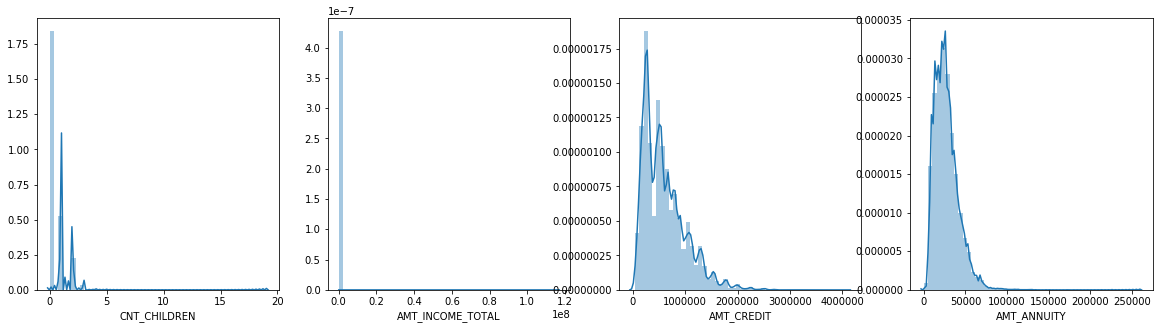

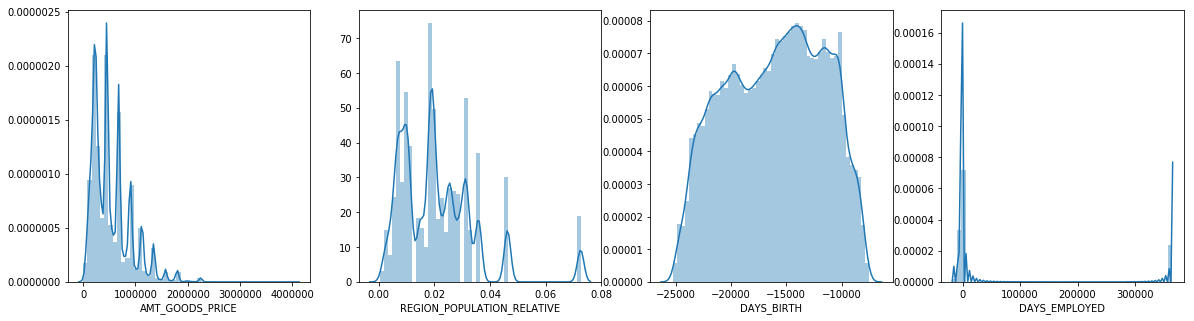

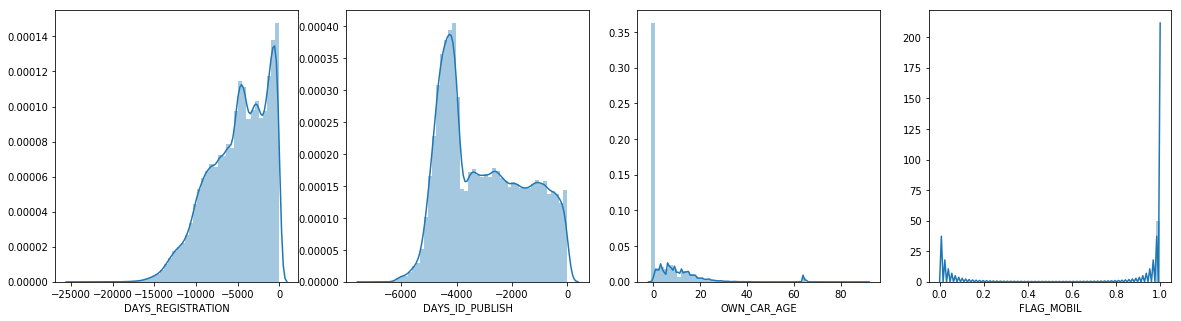

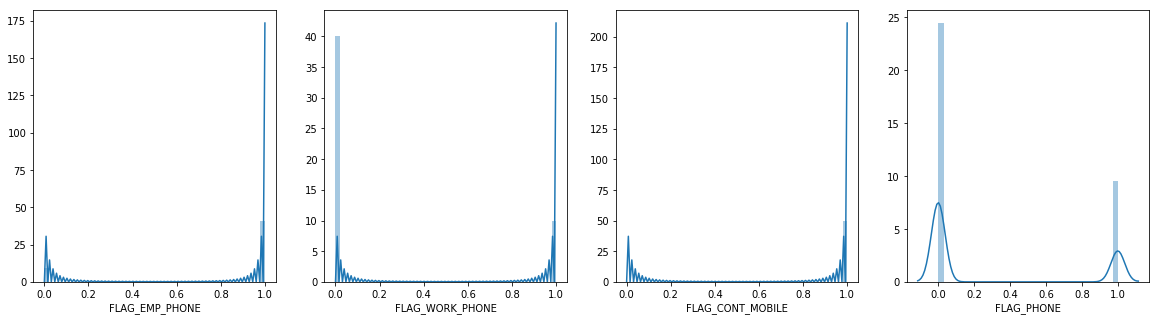

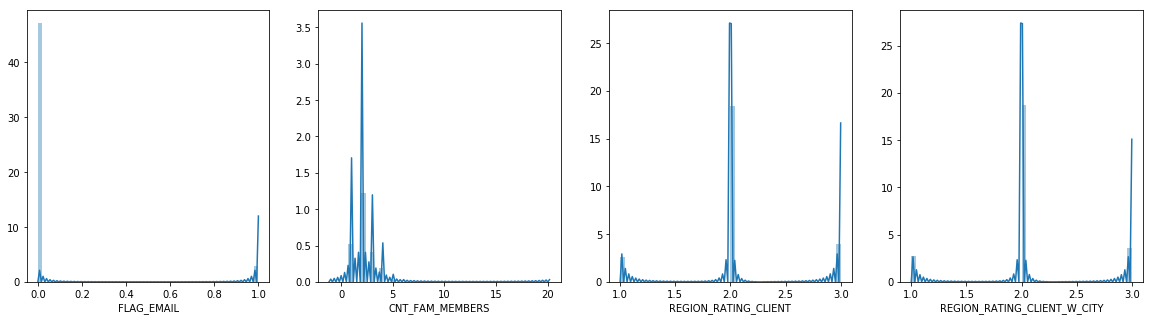

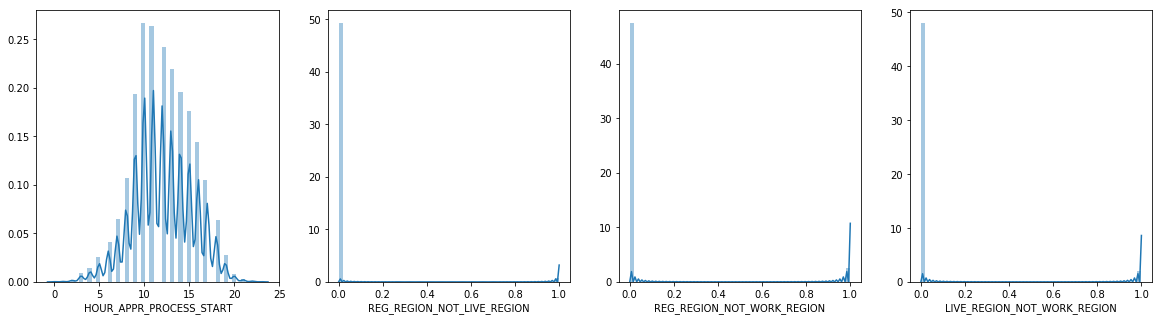

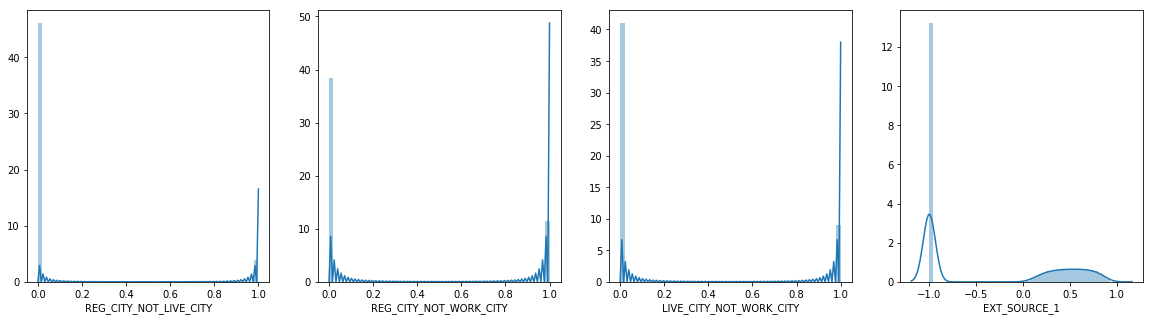

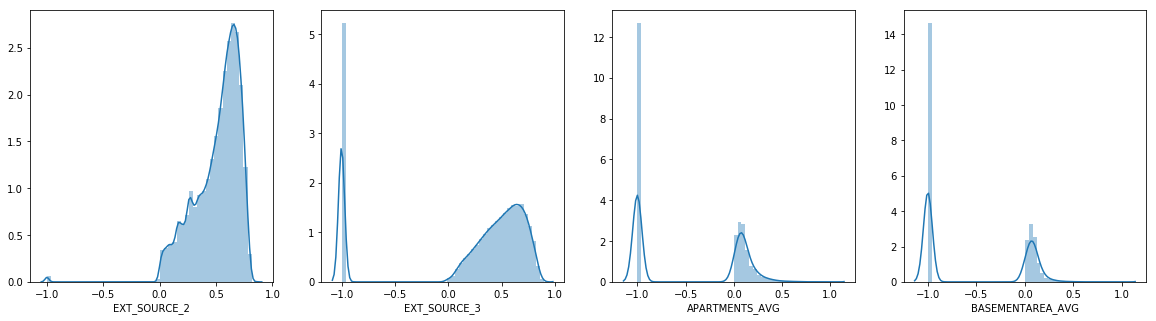

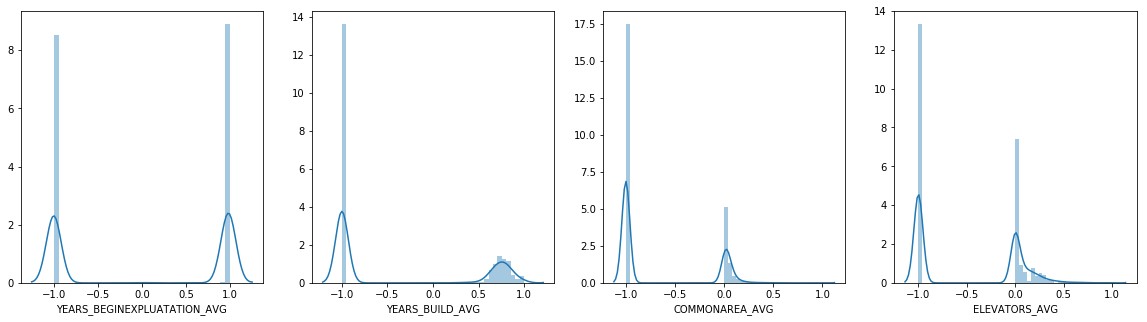

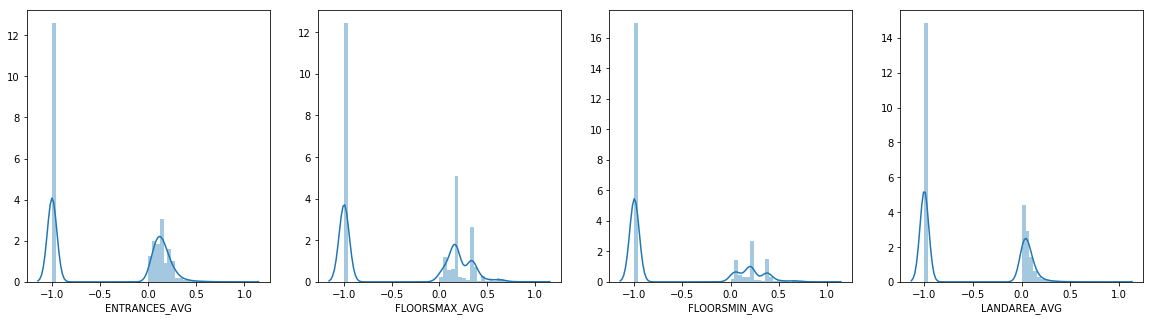

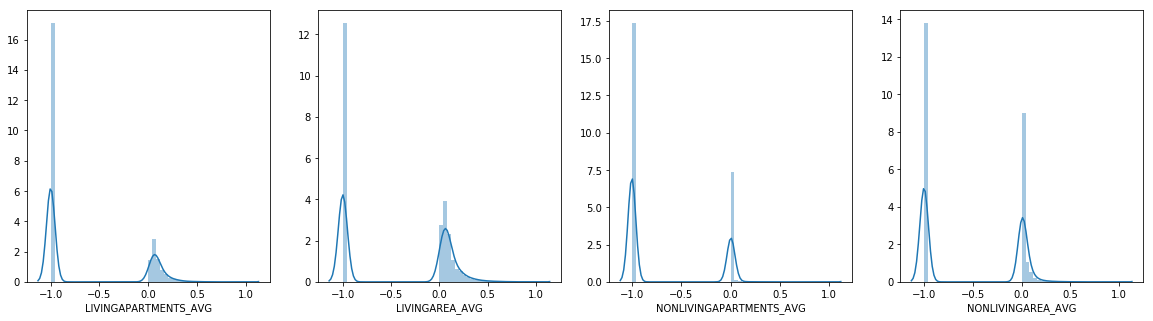

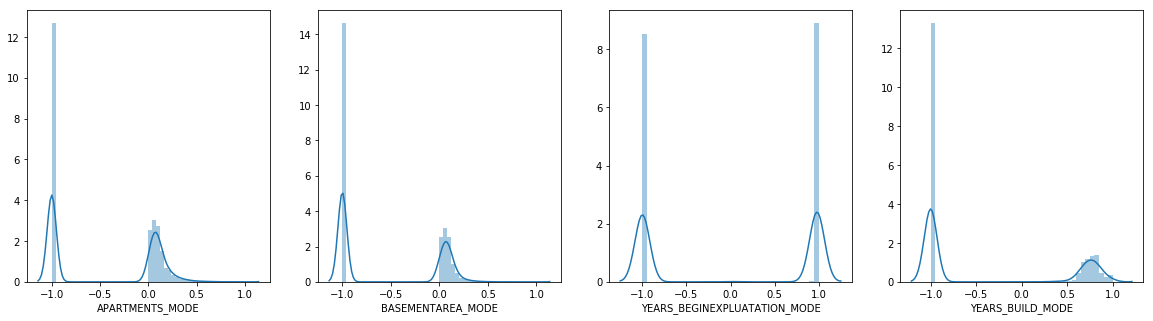

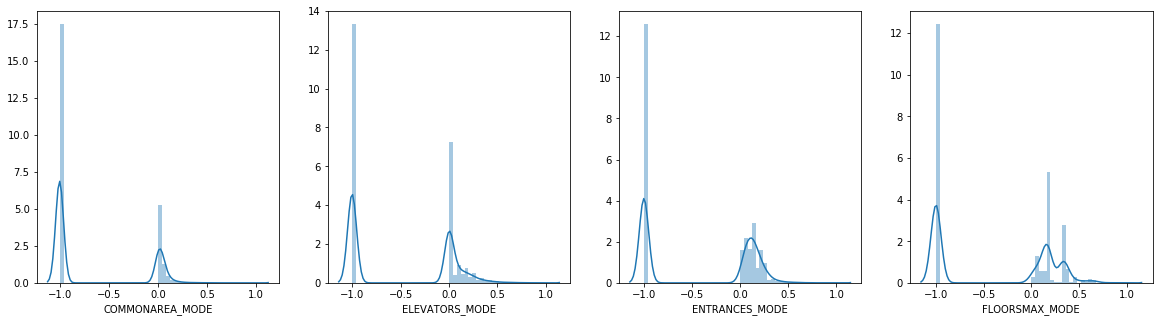

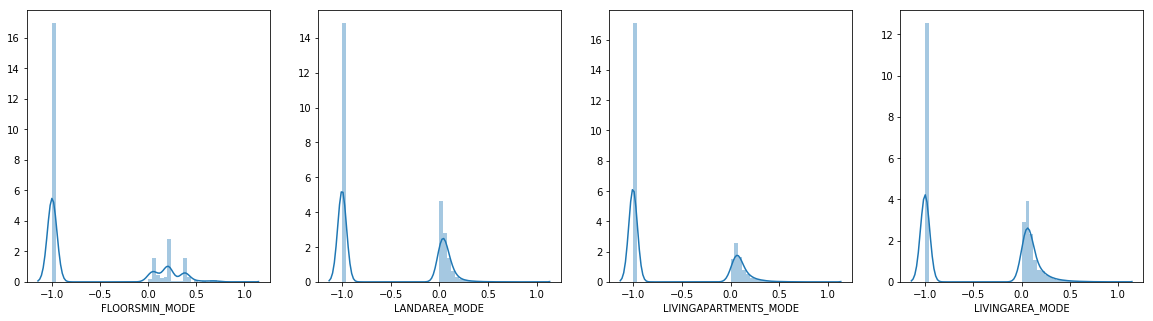

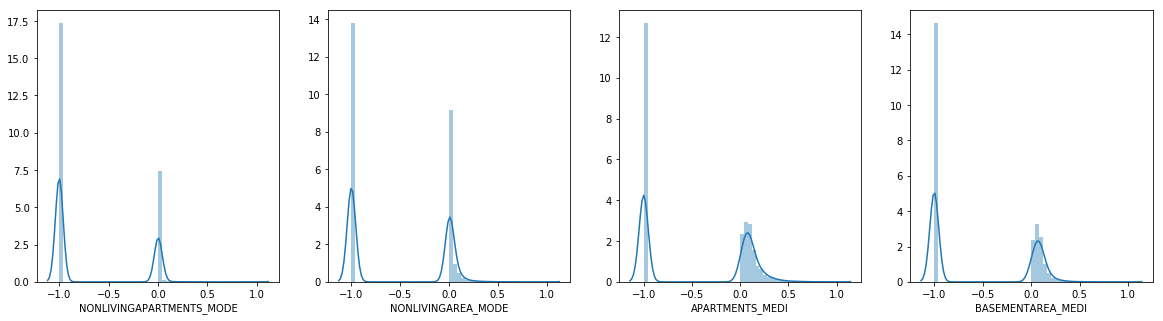

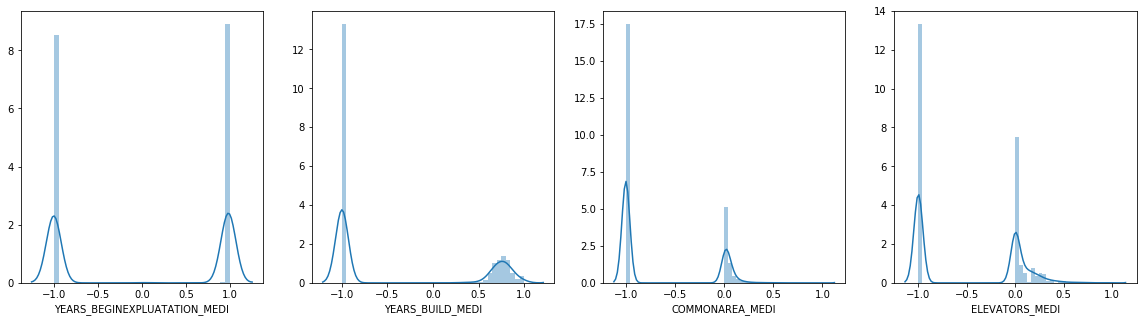

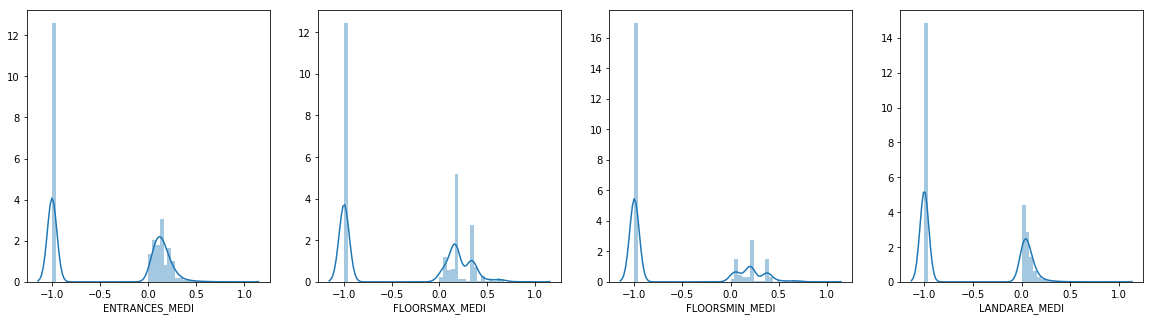

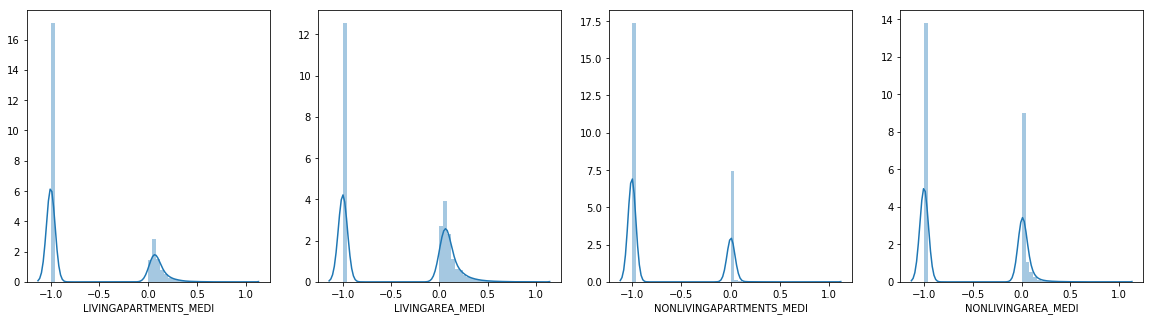

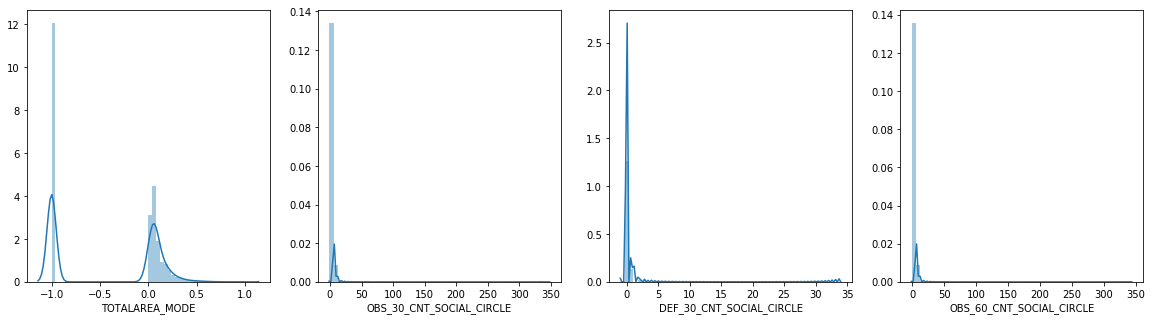

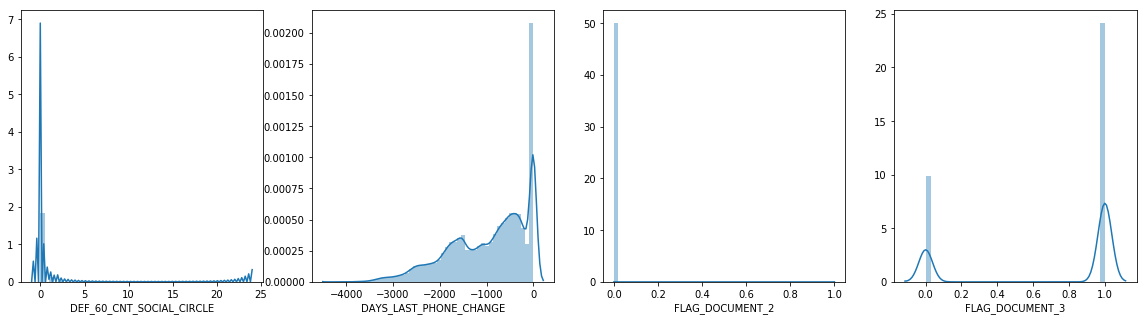

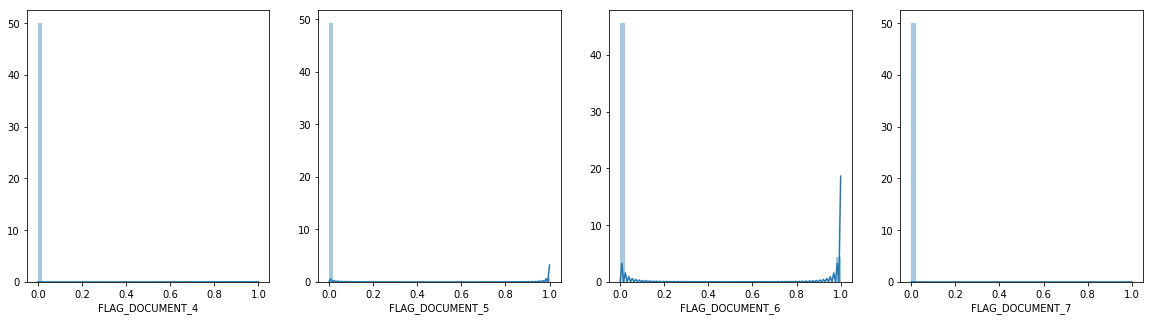

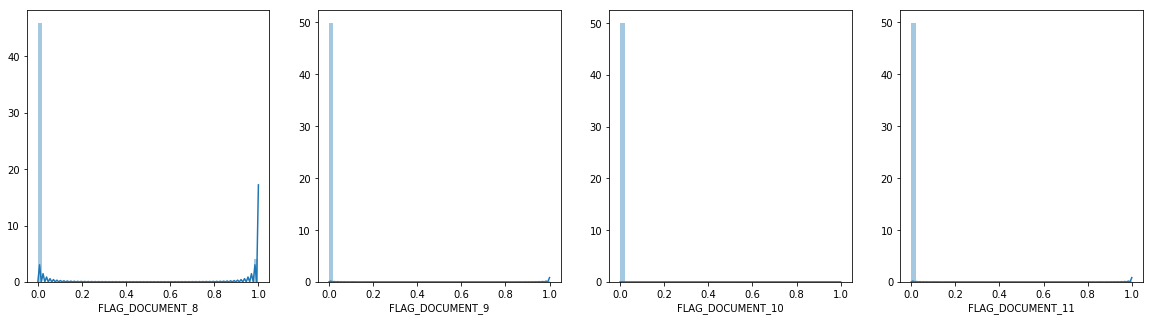

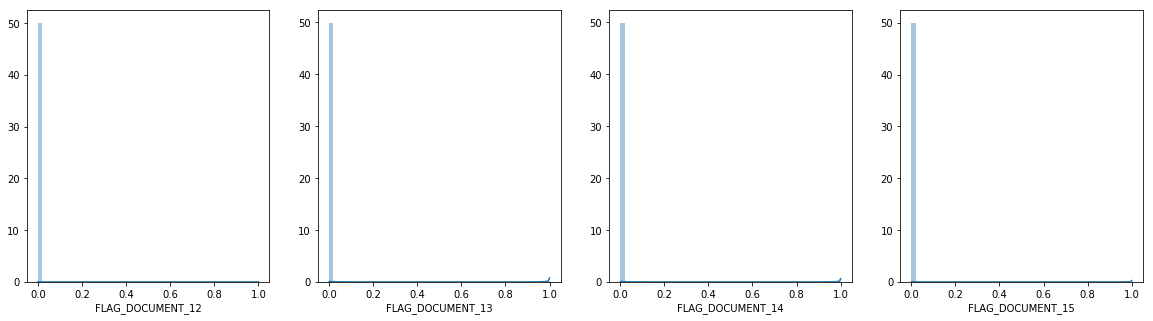

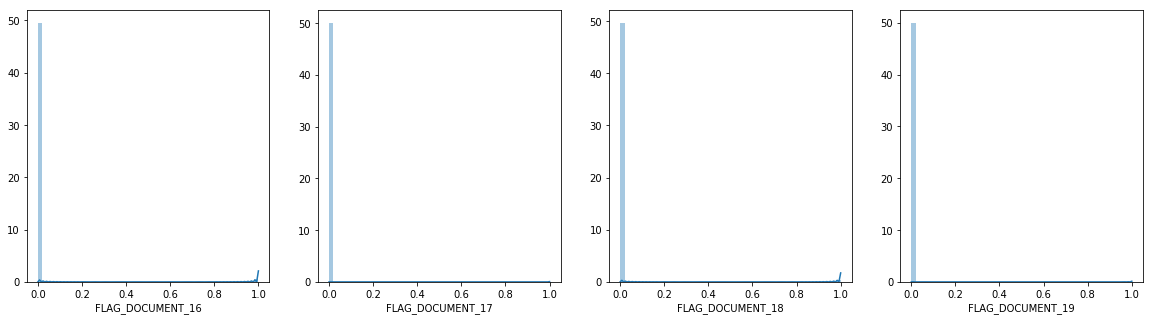

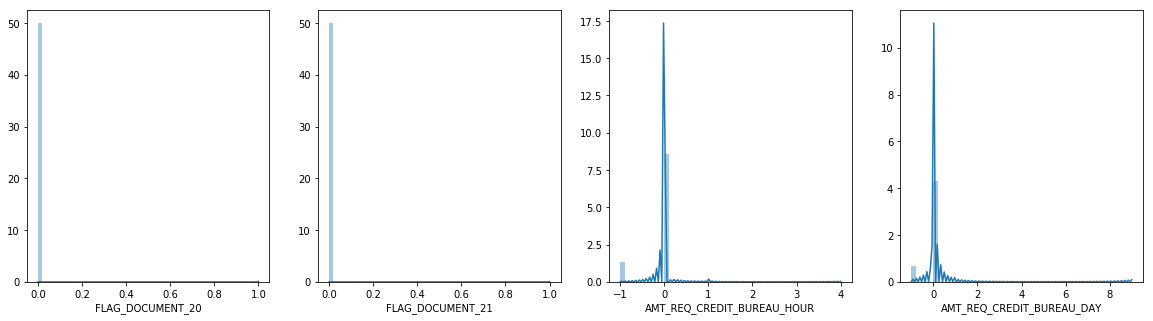

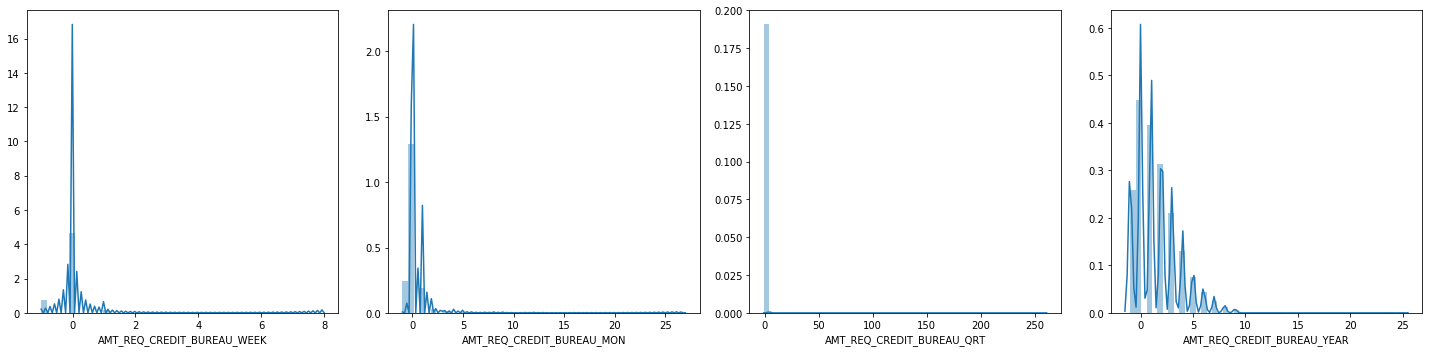

In [7]:
autoDistplot(data_columns, 4, 20, 5)

In [8]:
# 標準化
sc = StandardScaler()
names = data_columns.columns.values

i=0
dict = {}
for name in names:
    dict[i]=name
    i += 1
data_std = pd.DataFrame(sc.fit_transform(data_columns))
data_std = data_std.rename(columns=dict)

/home/hiro/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/hiro/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


/home/hiro/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/hiro/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:513: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


104


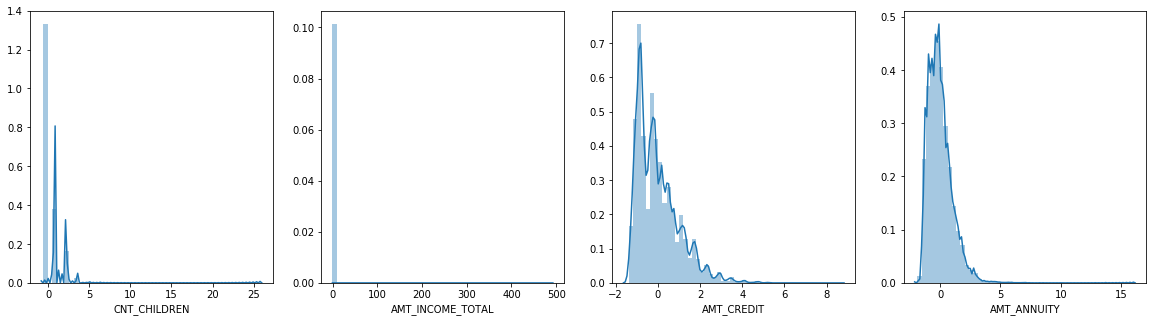

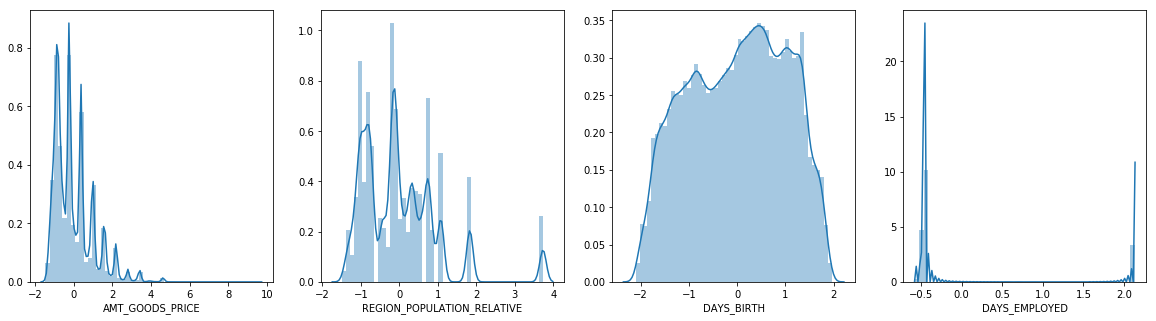

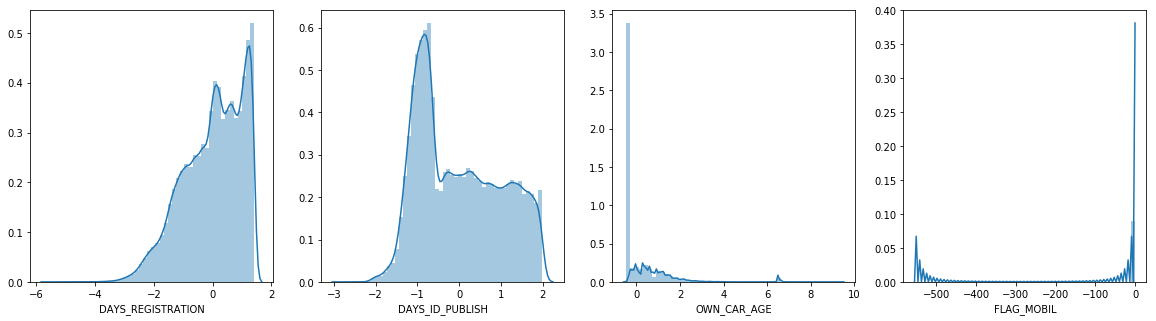

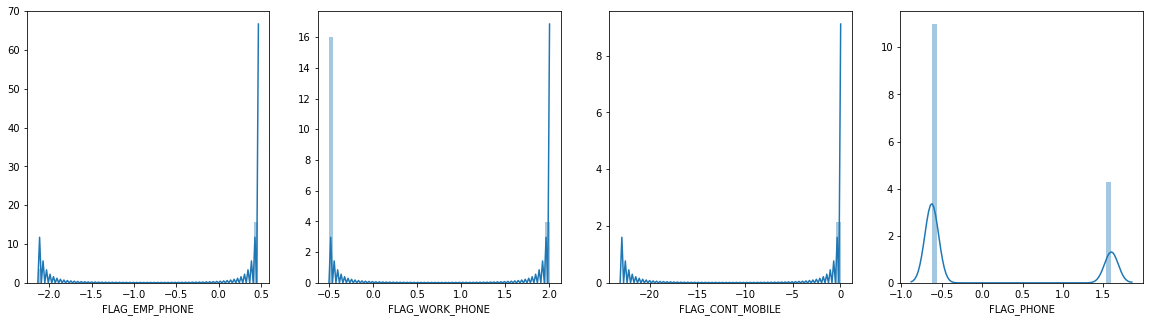

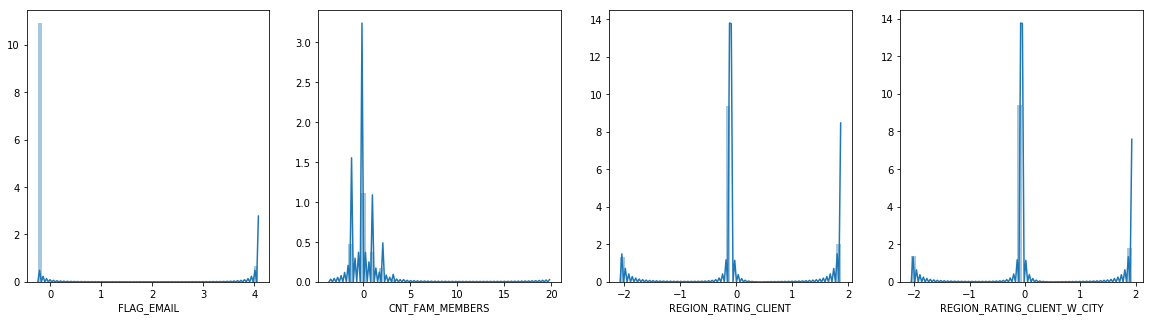

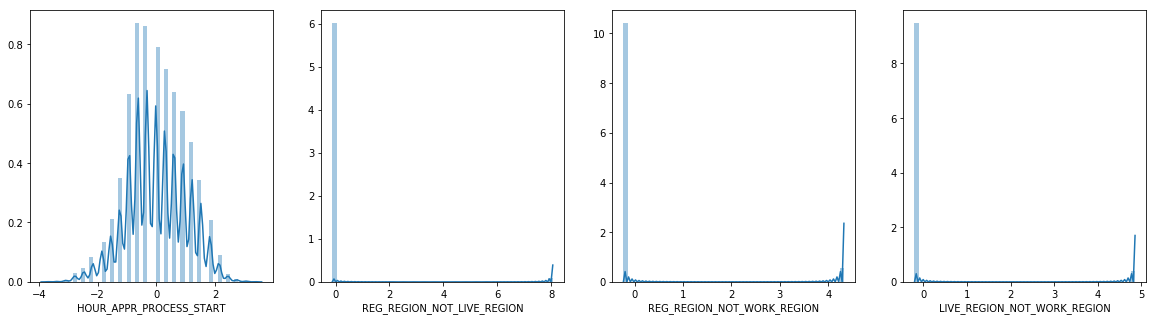

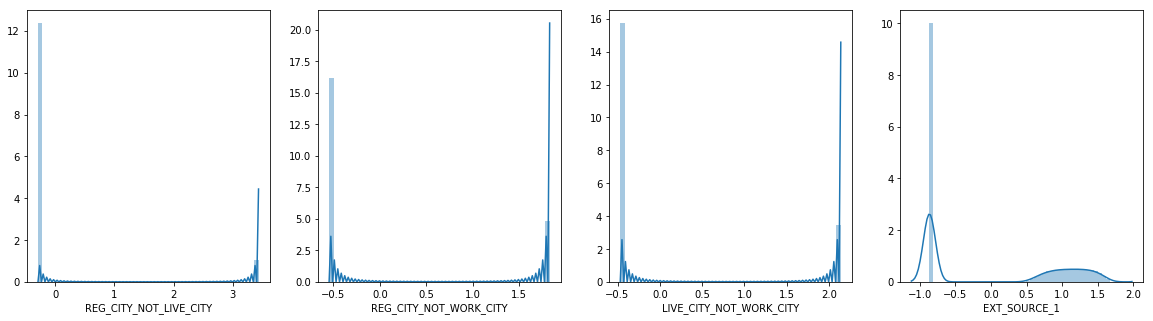

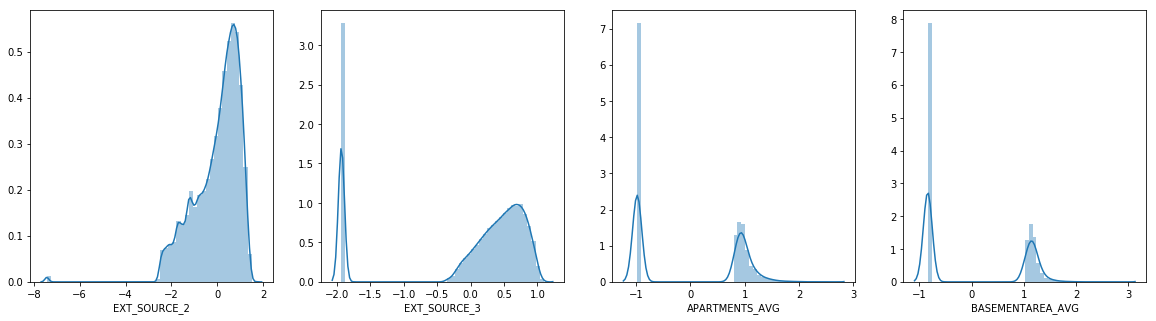

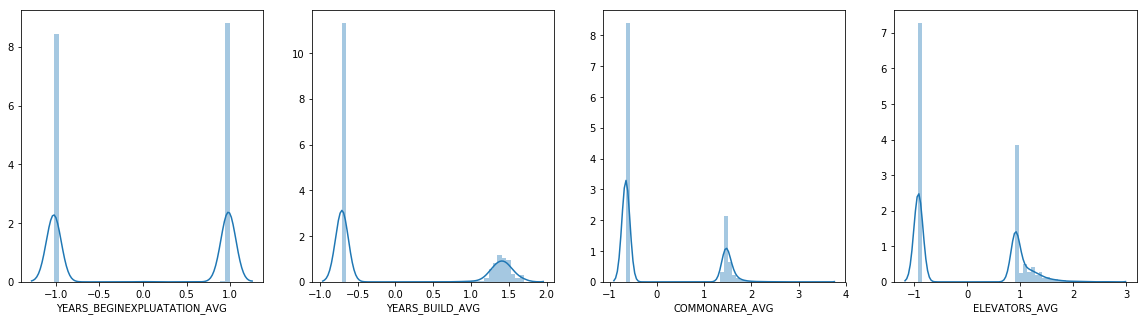

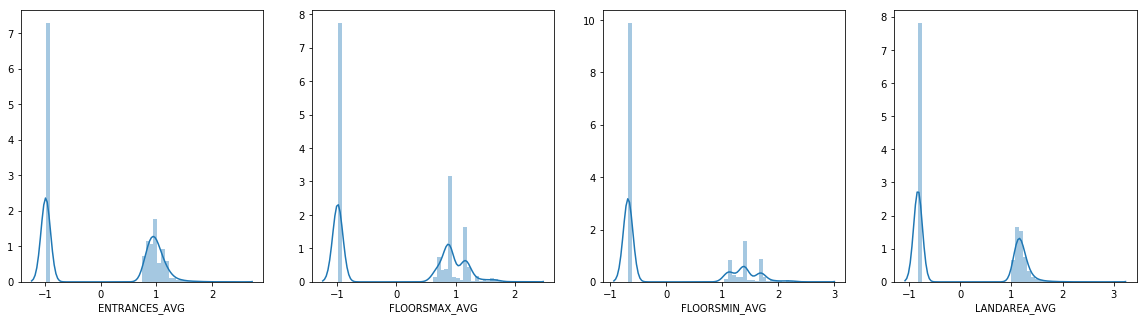

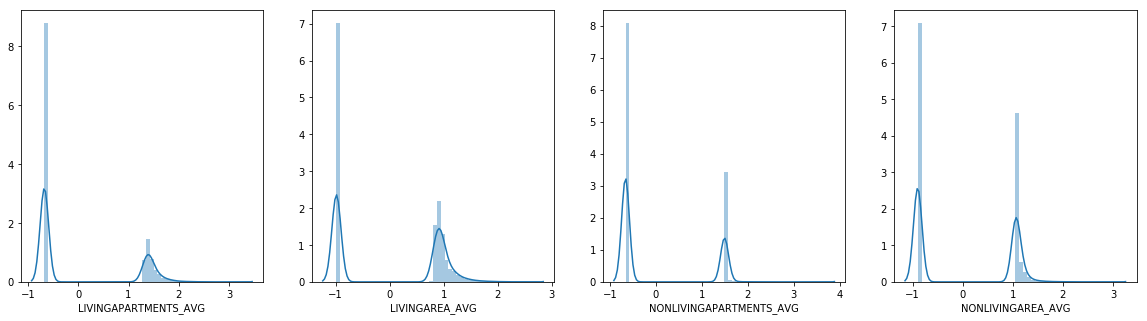

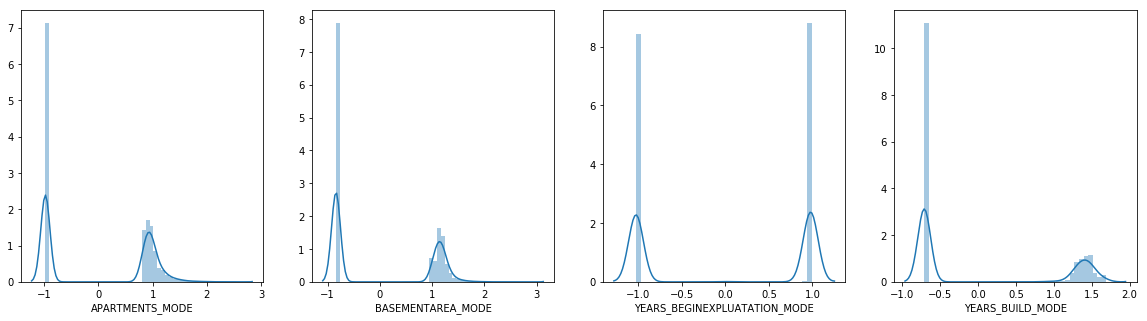

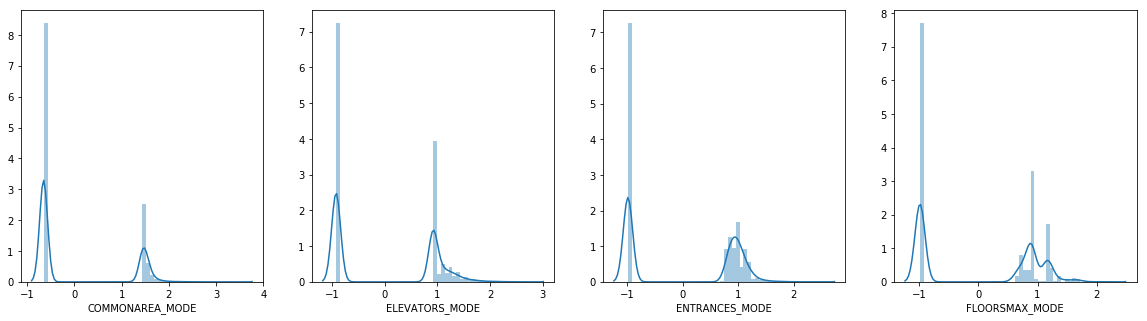

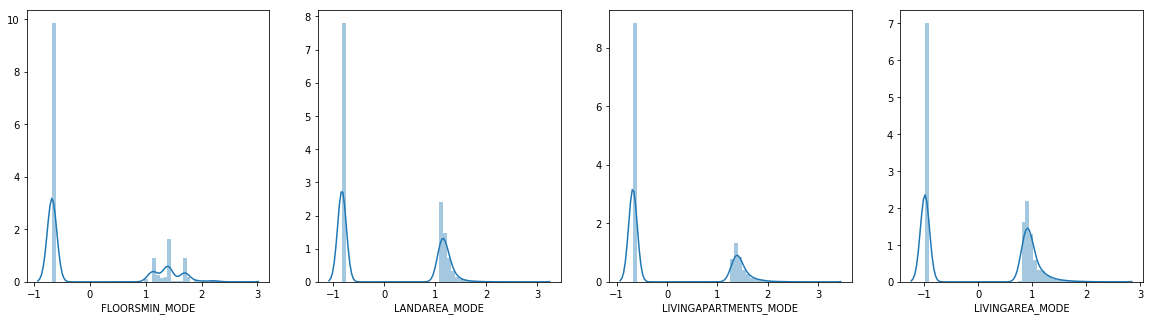

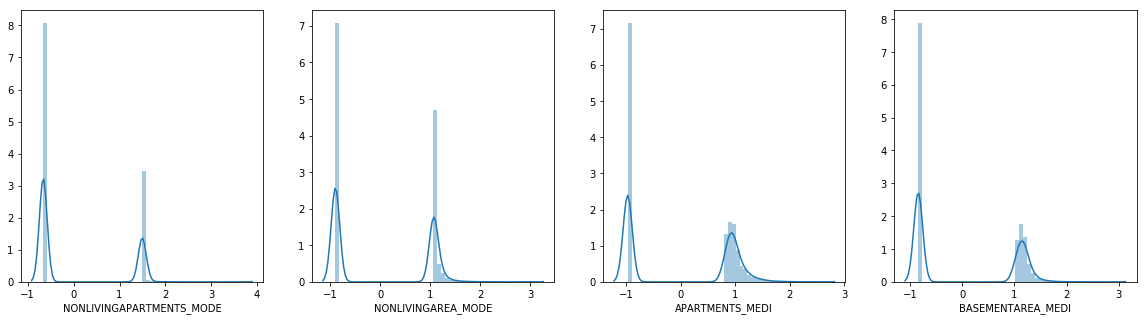

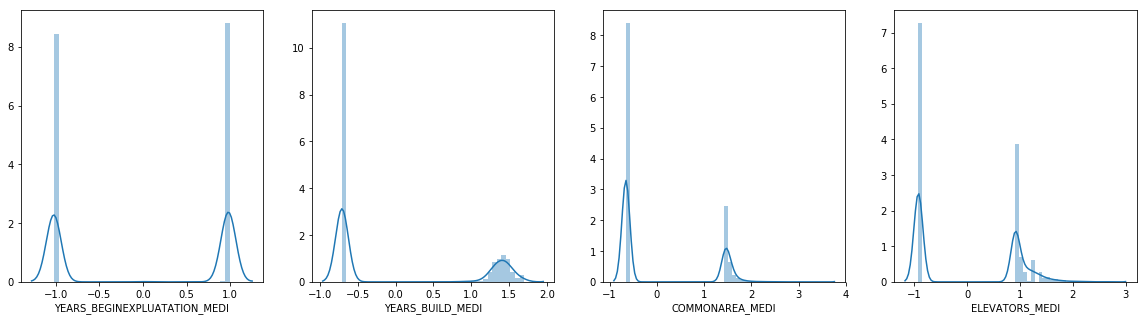

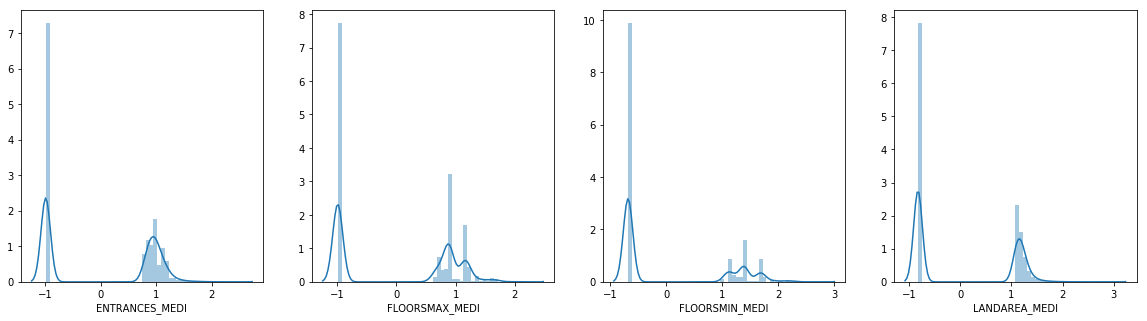

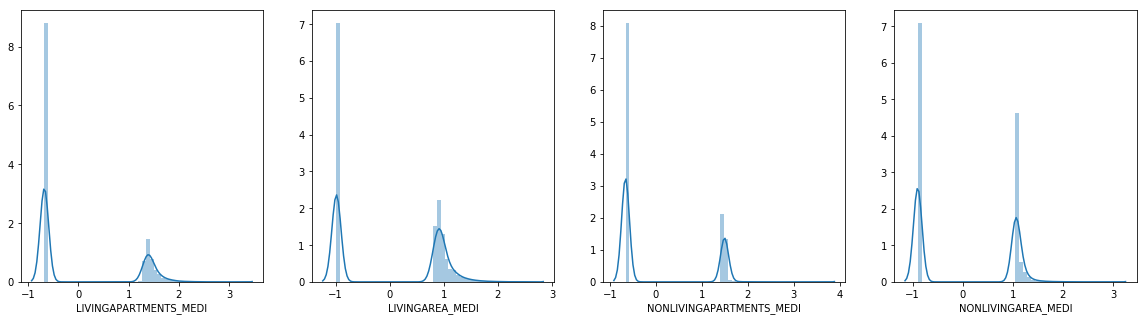

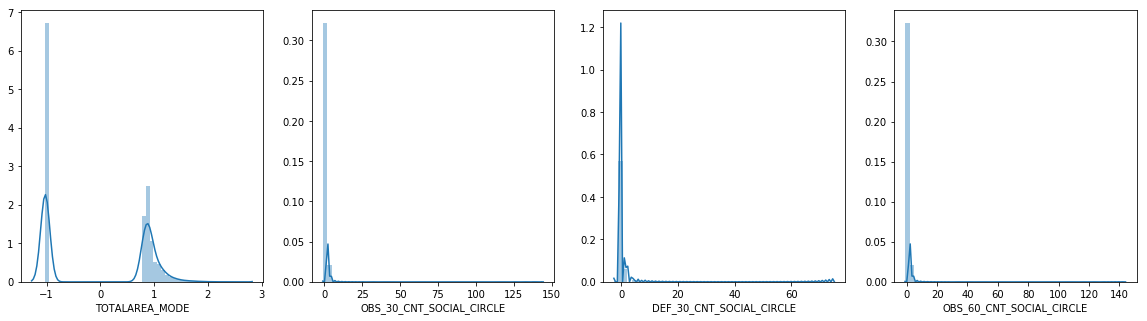

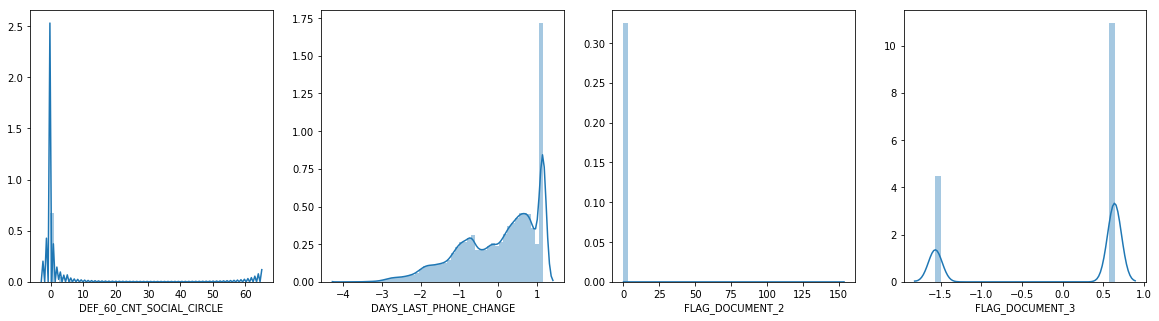

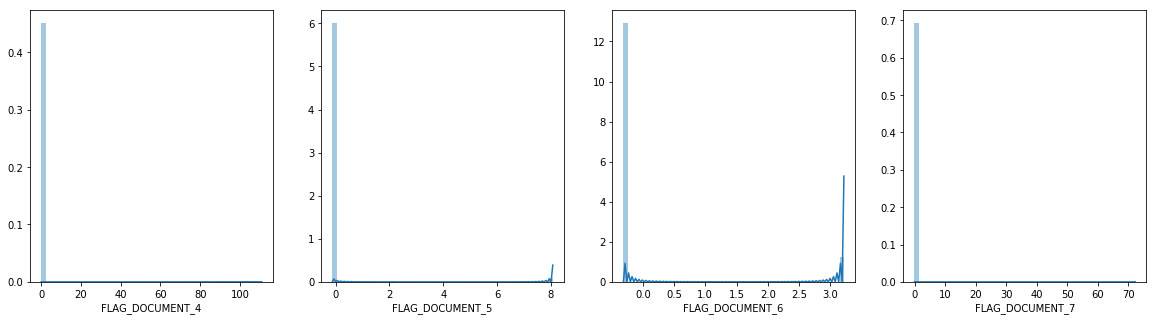

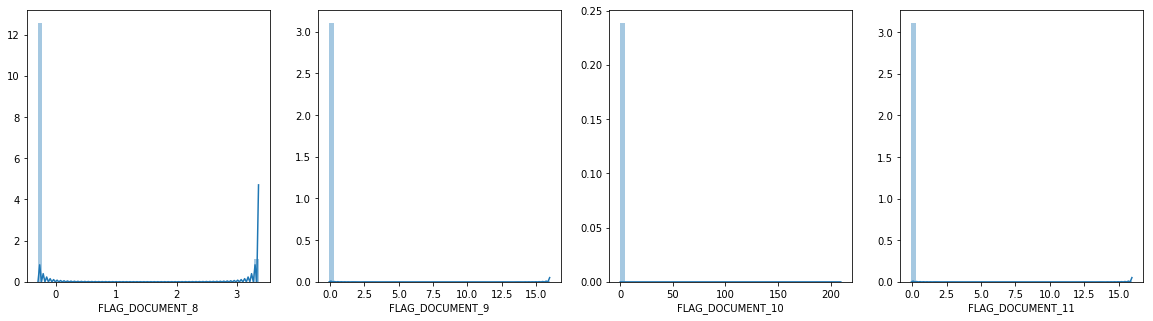

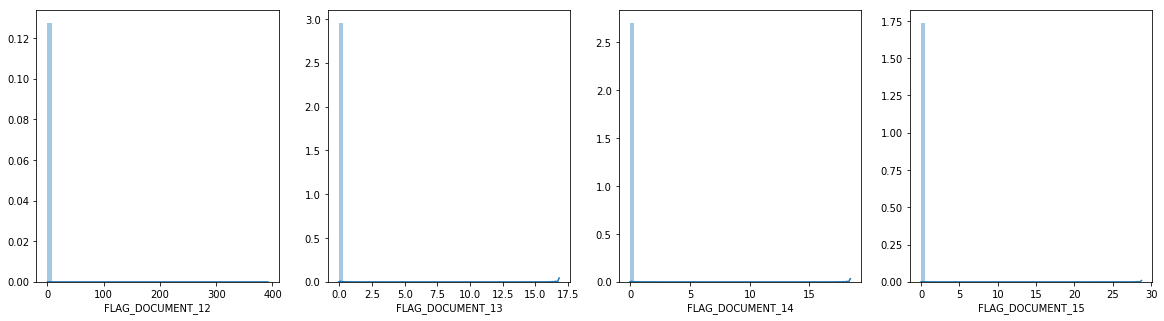

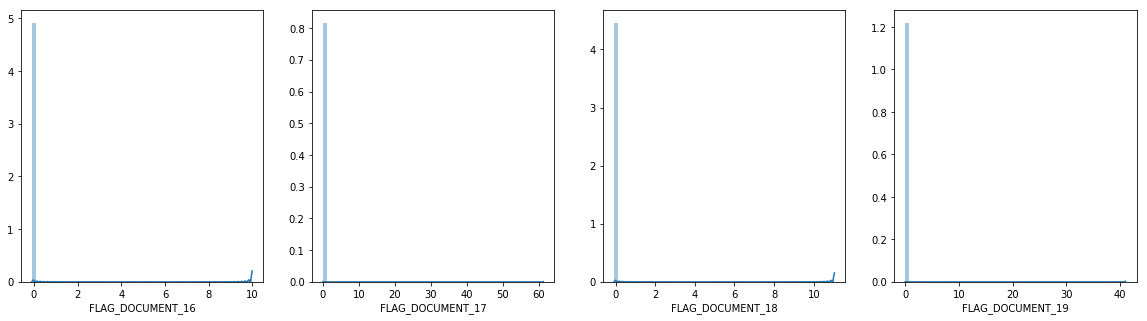

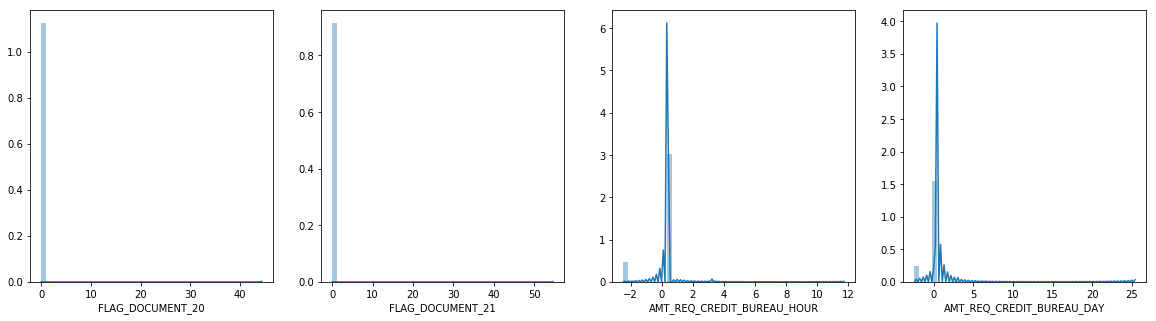

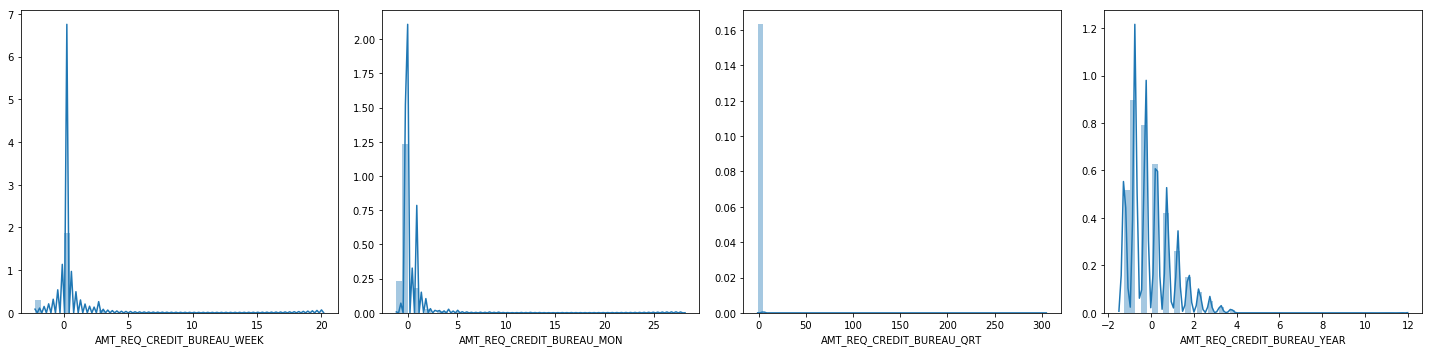

In [9]:
autoDistplot(data_std, 4, 20, 5)

In [10]:
from sklearn.preprocessing import MinMaxScaler
# 正規化
ms = MinMaxScaler()

data_norm = pd.DataFrame(ms.fit_transform(data_columns))
data_norm = data_std.rename(columns=dict)

/home/hiro/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


/home/hiro/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/hiro/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:513: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


104


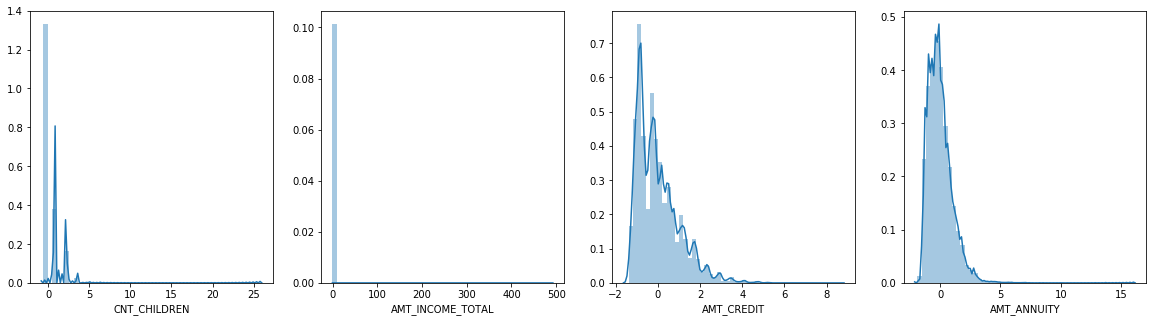

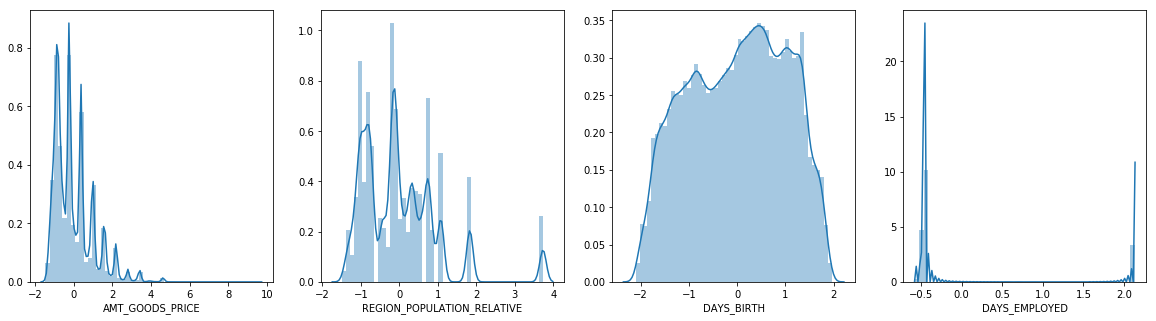

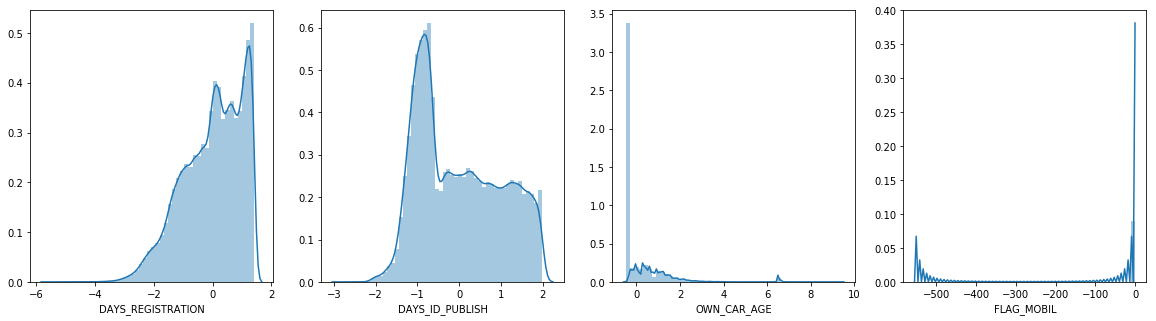

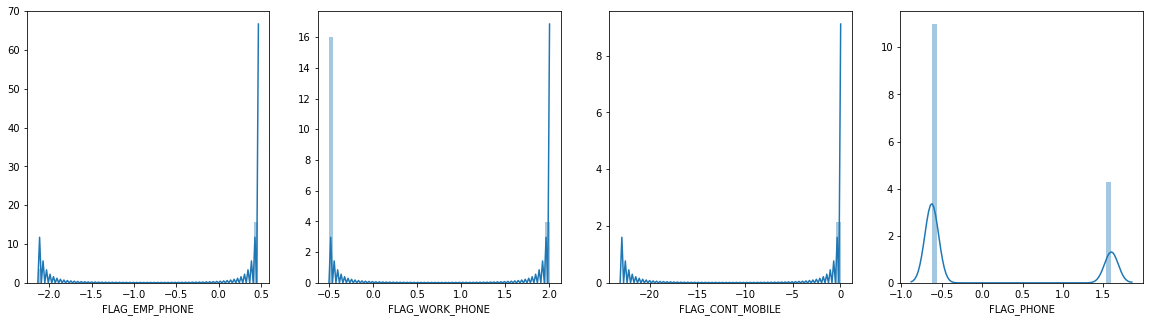

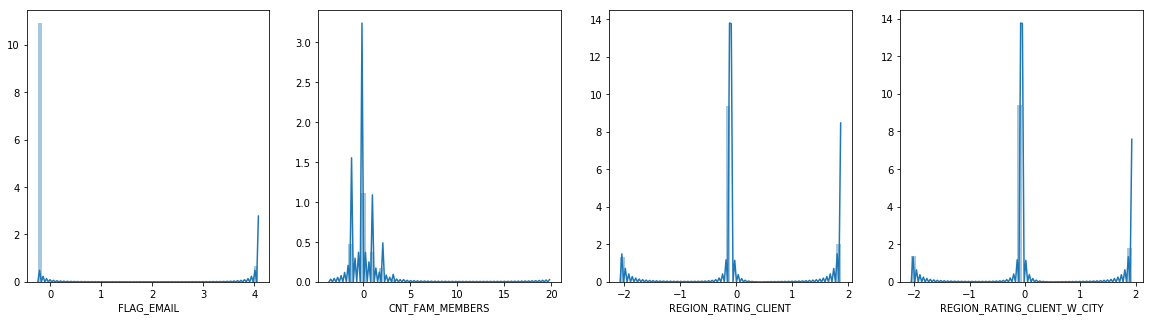

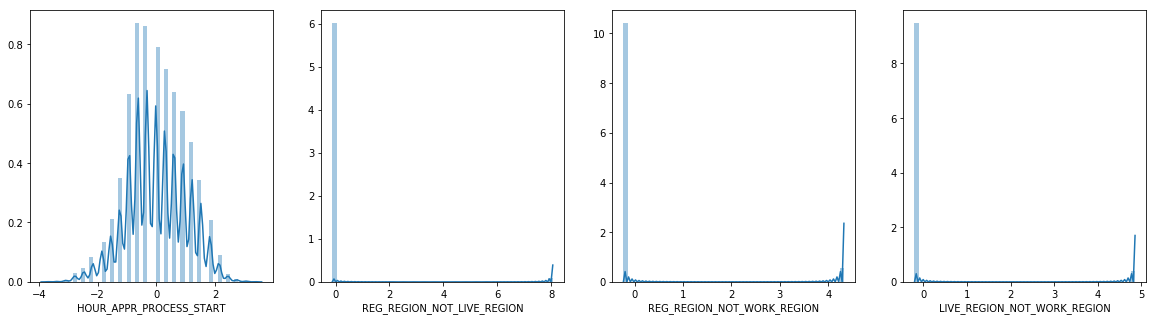

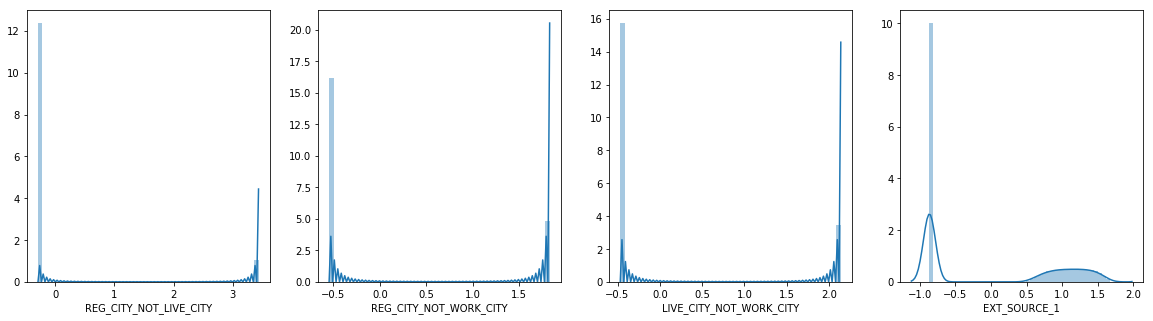

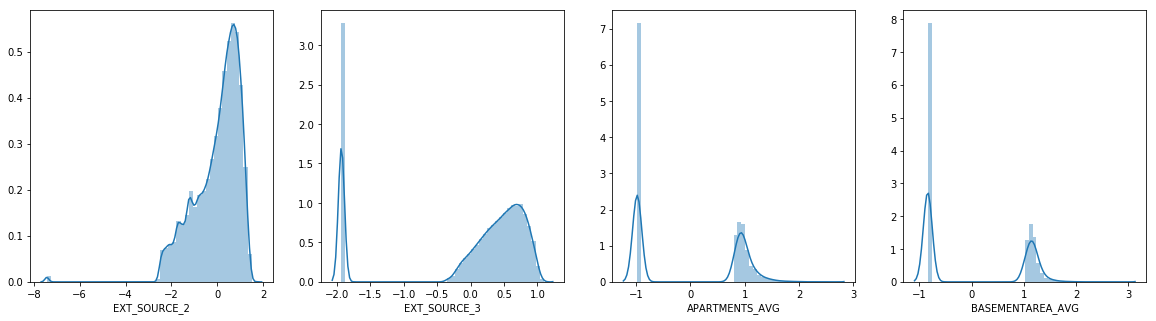

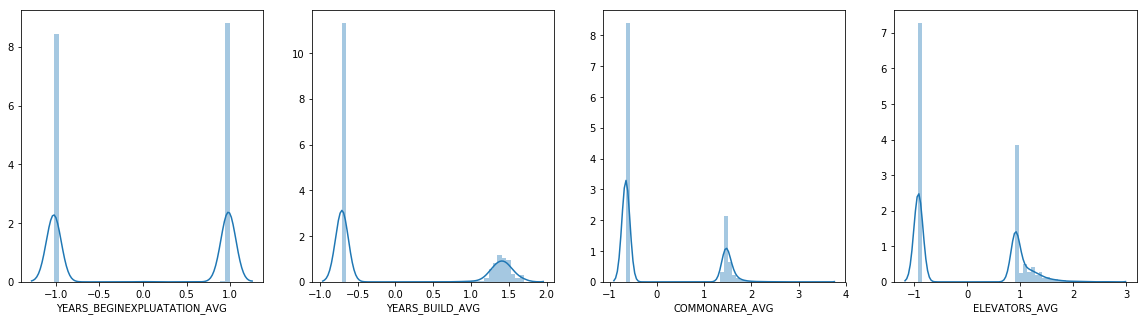

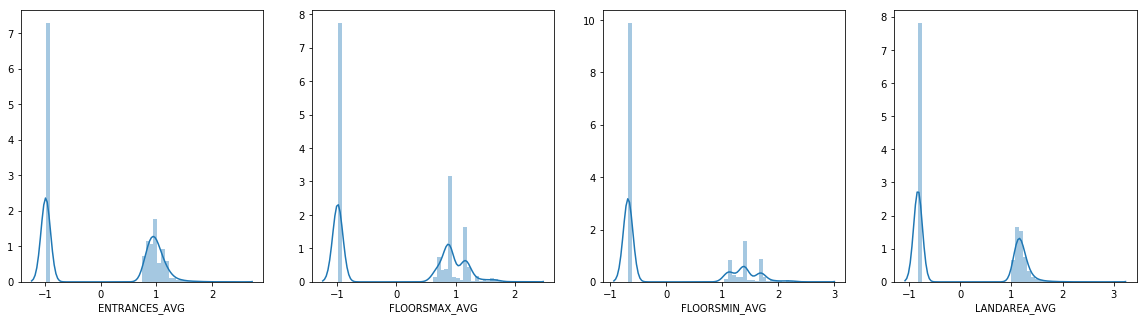

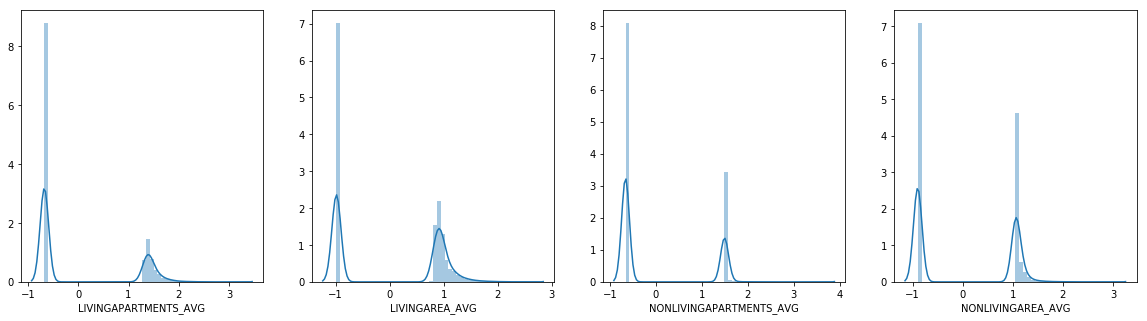

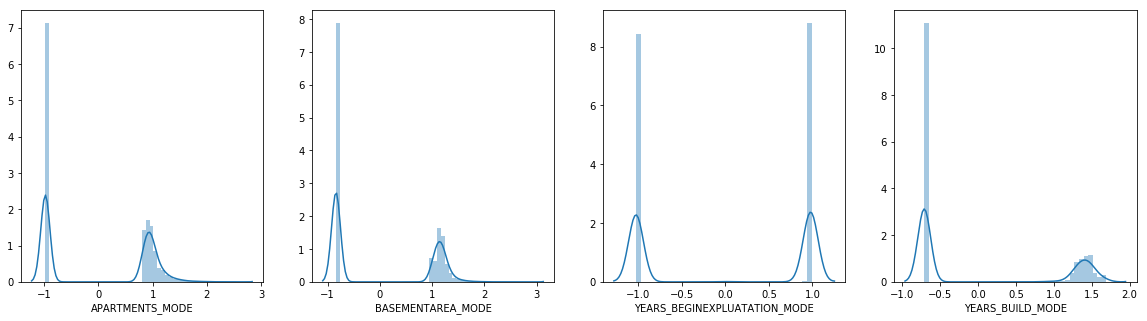

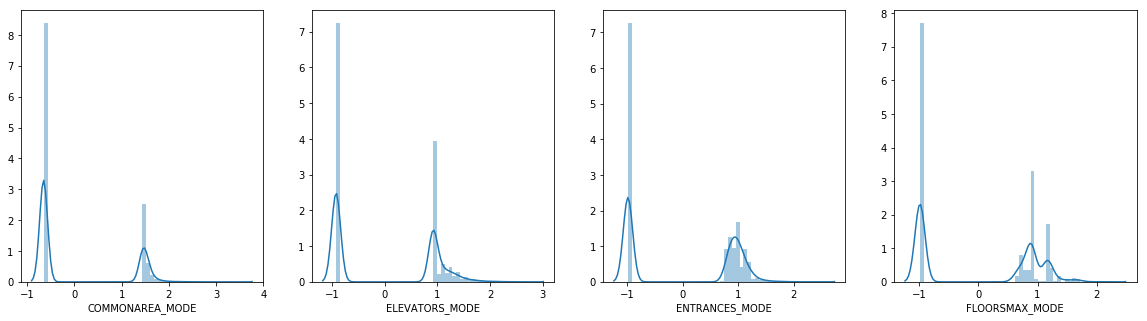

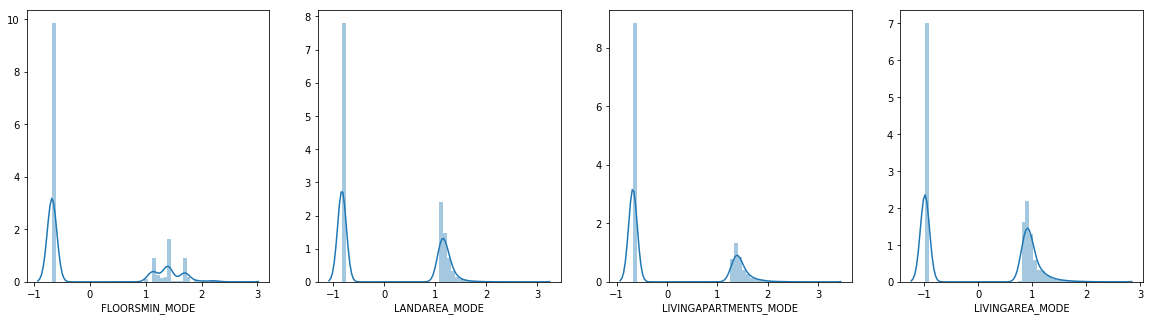

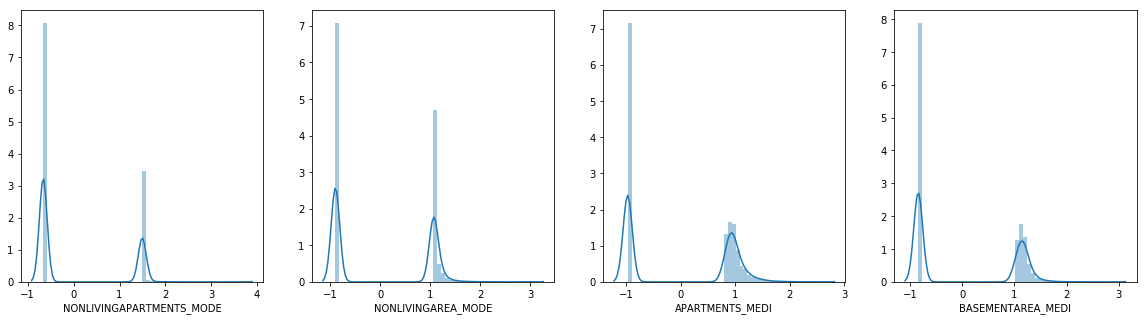

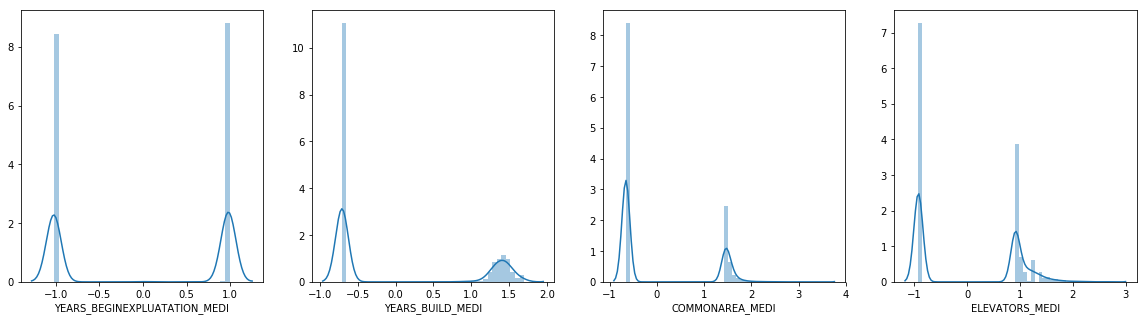

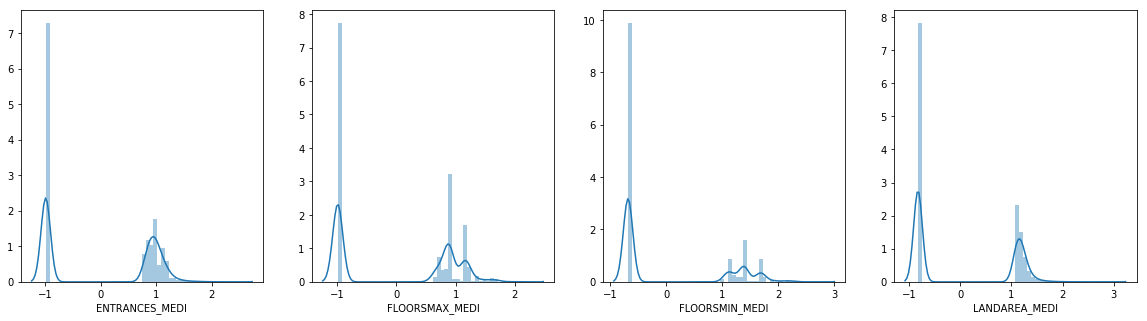

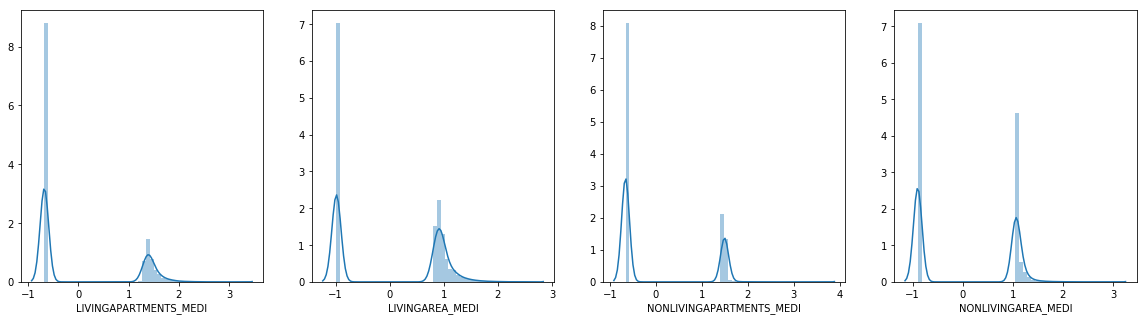

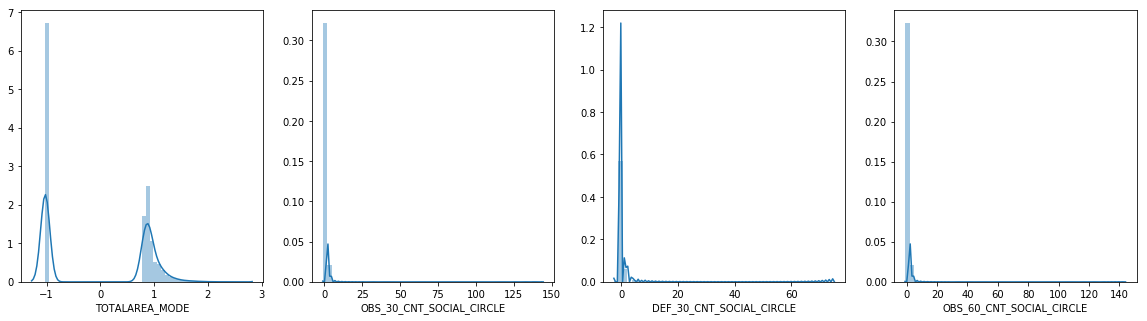

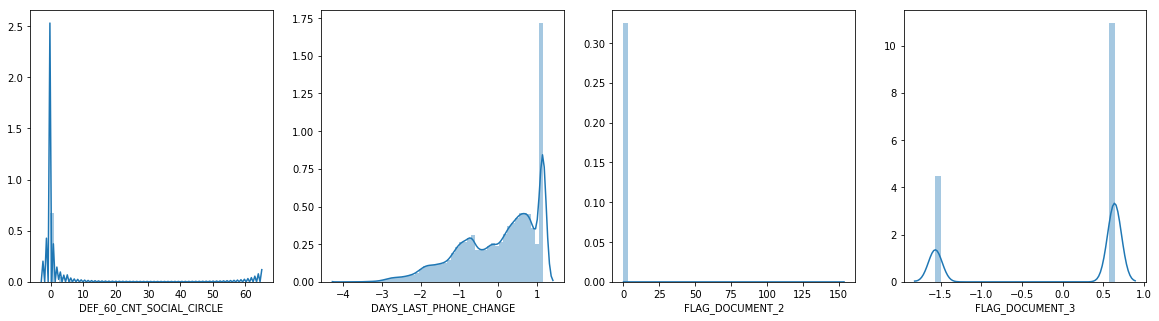

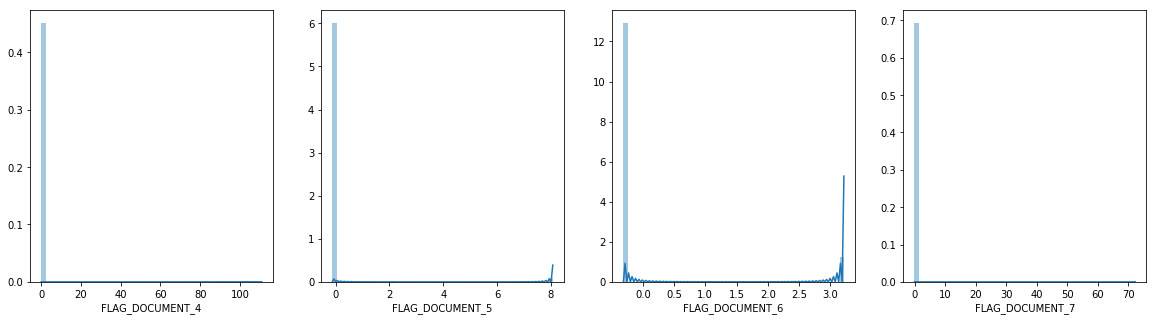

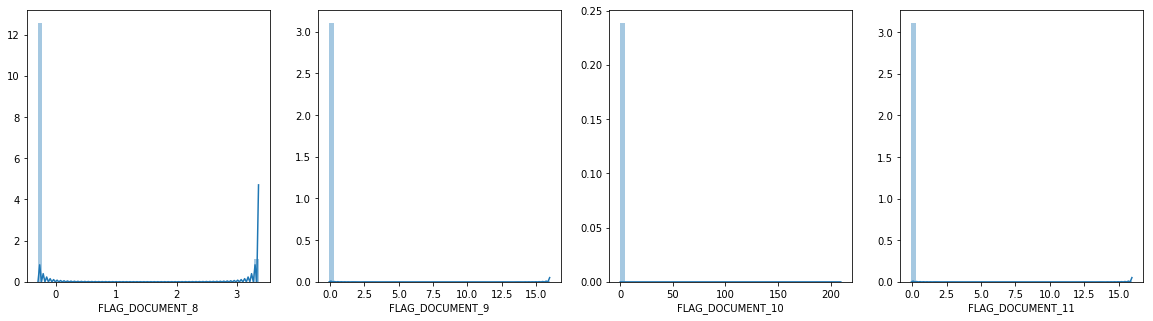

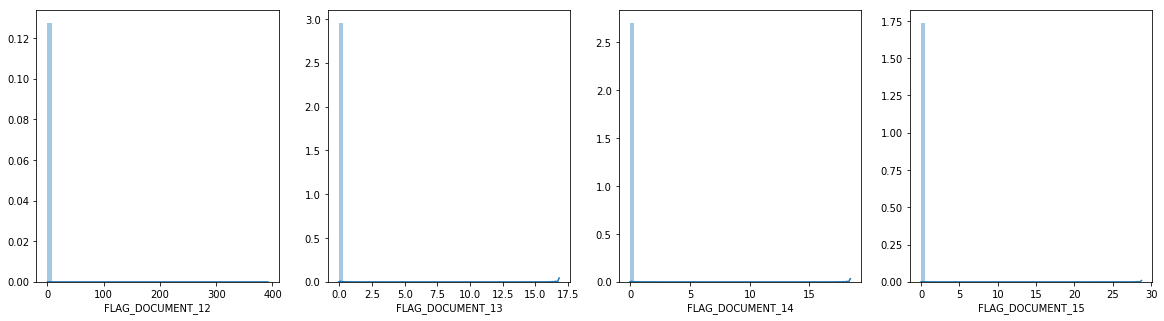

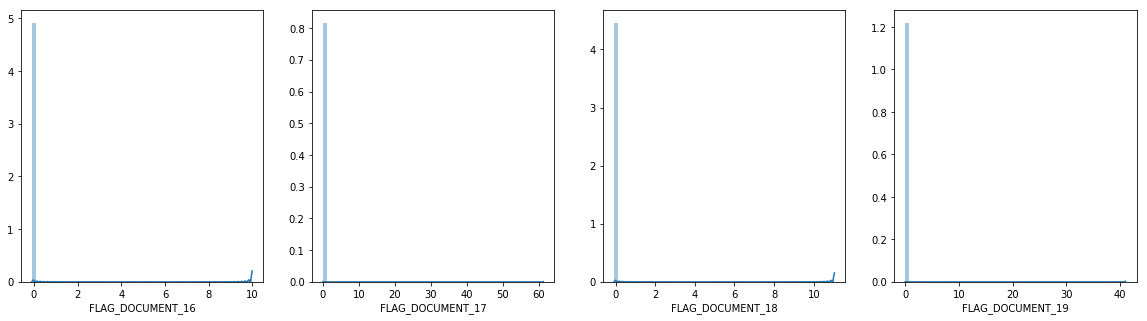

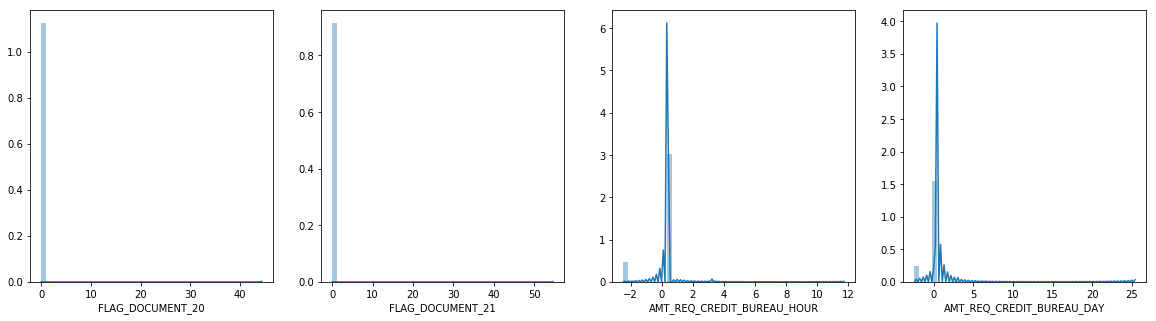

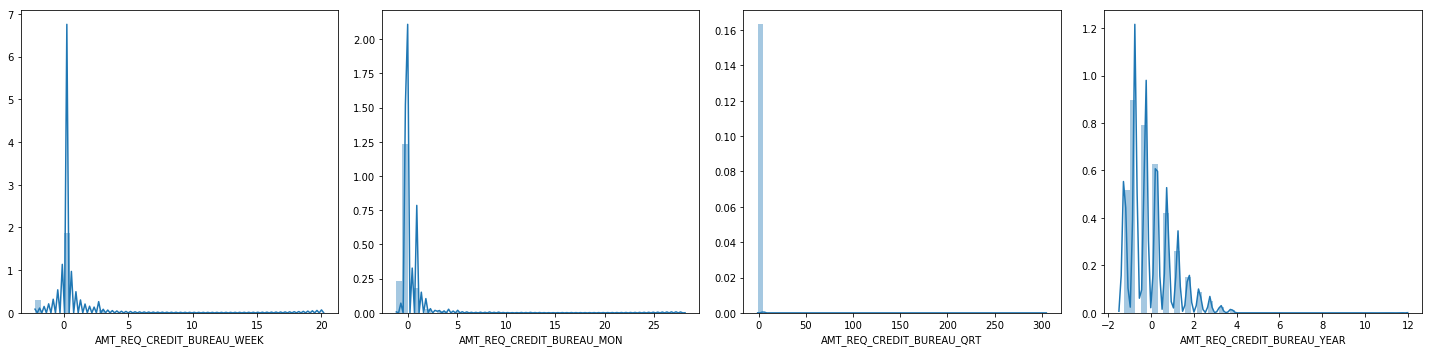

In [11]:
autoDistplot(data_norm, 4, 20, 5)

normal elapsed_time:12.271530389785767[sec]
std elapsed_time:14.040463924407959[sec]
norm elapsed_time:13.930382251739502[sec]


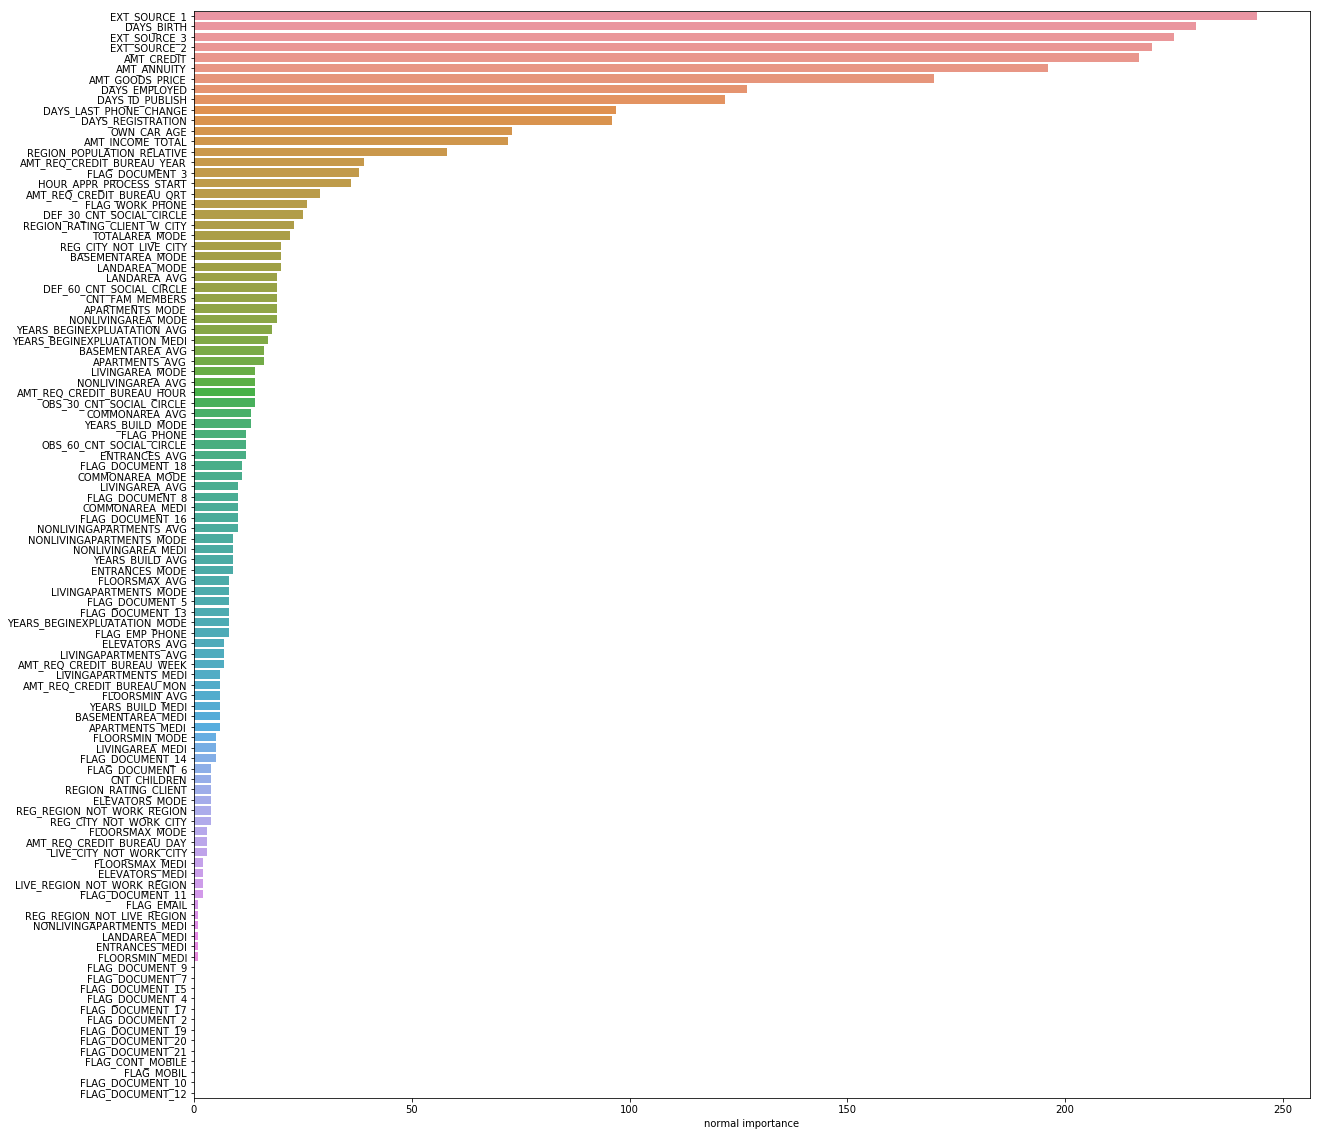

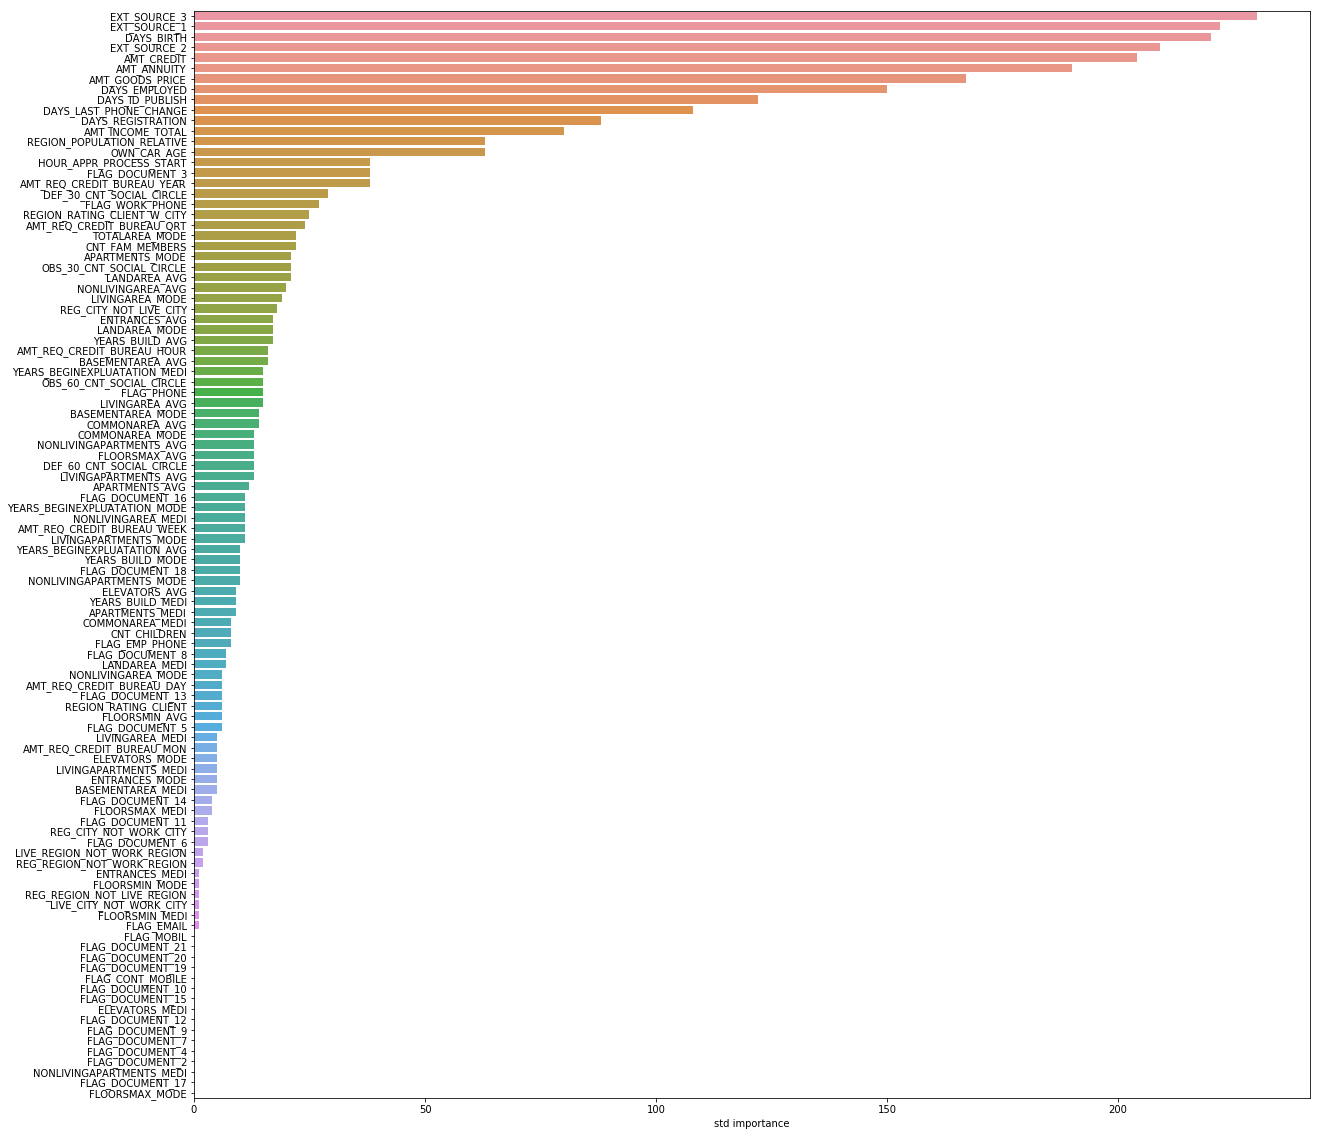

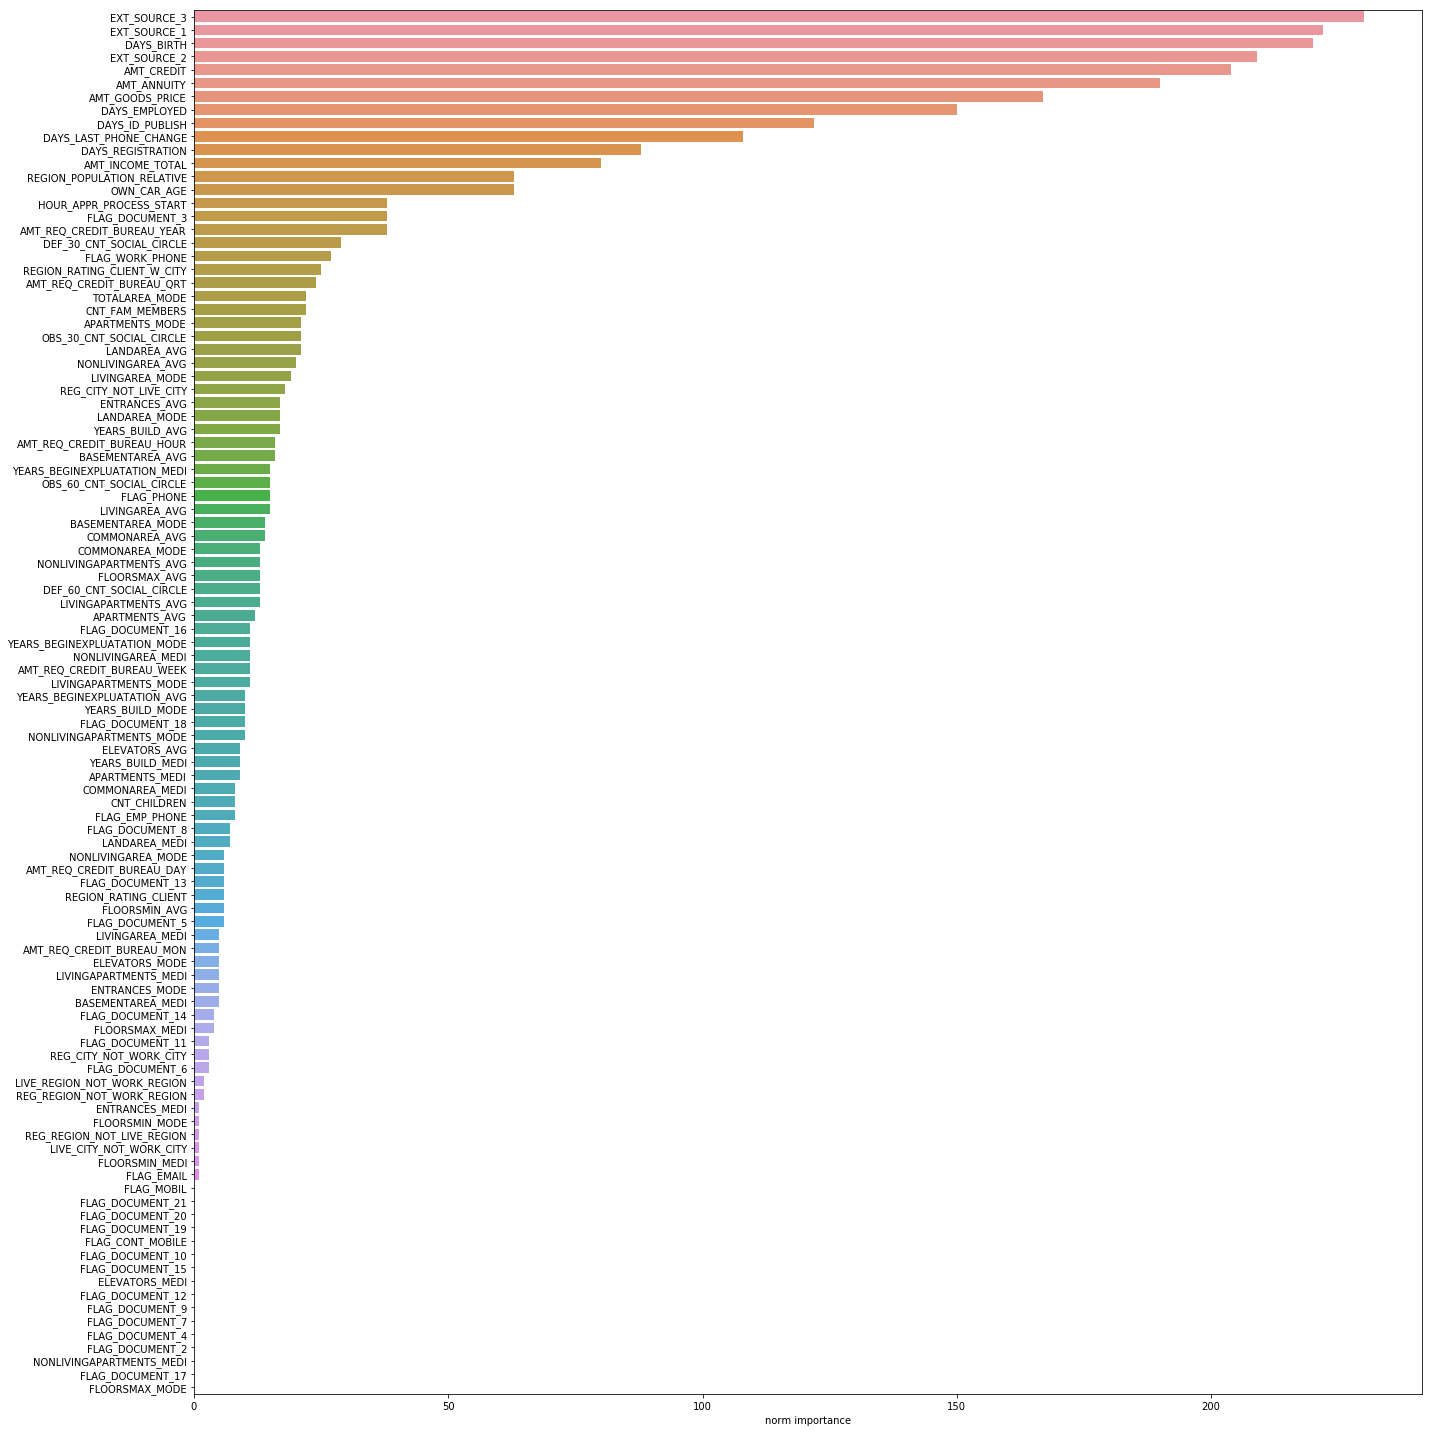

In [12]:
# LightGBM
import lightgbm as lgb

label = application_train_origin["TARGET"]

# LightGBM インスタンス生成
normal_lgb_instance = lgb.LGBMClassifier()
std_lgb_instance = lgb.LGBMClassifier()
norm_lgb_instance = lgb.LGBMClassifier()

# 生データ
start = time.time()
normal_lgb_instance.fit(data_columns, label)
elapsed_time = time.time() - start
print ("normal elapsed_time:{0}".format(elapsed_time) + "[sec]")

# 標準化
start = time.time()
std_lgb_instance.fit(data_std, label)
elapsed_time = time.time() - start
print ("std elapsed_time:{0}".format(elapsed_time) + "[sec]")

# 正規化
start = time.time()
norm_lgb_instance.fit(data_norm, label)
elapsed_time = time.time() - start
print ("norm elapsed_time:{0}".format(elapsed_time) + "[sec]")


# 変数重要度算出
normal_lgb_fi = normal_lgb_instance.feature_importances_
std_lgb_fi = std_lgb_instance.feature_importances_
norm_lgb_fi = std_lgb_instance.feature_importances_

normal_Ranking_indexs = np.argsort(- normal_lgb_fi) # 降順に並び替えたインデックスを返す
std_Ranking_indexs = np.argsort(- std_lgb_fi)
norm_Ranking_indexs = np.argsort(- norm_lgb_fi)

f, ax = plt.subplots(figsize=(20, 20))
sns.barplot(x=normal_lgb_fi[normal_Ranking_indexs], y=data_columns.columns.values[normal_Ranking_indexs], orient="h")
ax.set_xlabel("normal importance")

f, ax = plt.subplots(figsize=(20, 20))
sns.barplot(x=std_lgb_fi[std_Ranking_indexs], y=data_std.columns.values[std_Ranking_indexs], orient="h")
ax.set_xlabel("std importance")

f, ax = plt.subplots(figsize=(20, 20))
sns.barplot(x=norm_lgb_fi[norm_Ranking_indexs], y=data_norm.columns.values[norm_Ranking_indexs], orient="h")
ax.set_xlabel("norm importance")


plt.tight_layout()
plt.show()

In [13]:
normal_lgb_fi[normal_Ranking_indexs]

array([244, 230, 225, 220, 217, 196, 170, 127, 122,  97,  96,  73,  72,
        58,  39,  38,  36,  29,  26,  25,  23,  22,  20,  20,  20,  19,
        19,  19,  19,  19,  18,  17,  16,  16,  14,  14,  14,  14,  13,
        13,  12,  12,  12,  11,  11,  10,  10,  10,  10,  10,   9,   9,
         9,   9,   8,   8,   8,   8,   8,   8,   7,   7,   7,   6,   6,
         6,   6,   6,   6,   5,   5,   5,   4,   4,   4,   4,   4,   4,
         3,   3,   3,   2,   2,   2,   2,   1,   1,   1,   1,   1,   1,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0])

In [14]:
std_lgb_fi[std_Ranking_indexs]

array([230, 222, 220, 209, 204, 190, 167, 150, 122, 108,  88,  80,  63,
        63,  38,  38,  38,  29,  27,  25,  24,  22,  22,  21,  21,  21,
        20,  19,  18,  17,  17,  17,  16,  16,  15,  15,  15,  15,  14,
        14,  13,  13,  13,  13,  13,  12,  11,  11,  11,  11,  11,  10,
        10,  10,  10,   9,   9,   9,   8,   8,   8,   7,   7,   6,   6,
         6,   6,   6,   6,   5,   5,   5,   5,   5,   5,   4,   4,   3,
         3,   3,   2,   2,   1,   1,   1,   1,   1,   1,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0])

In [15]:
norm_lgb_fi[norm_Ranking_indexs]

array([230, 222, 220, 209, 204, 190, 167, 150, 122, 108,  88,  80,  63,
        63,  38,  38,  38,  29,  27,  25,  24,  22,  22,  21,  21,  21,
        20,  19,  18,  17,  17,  17,  16,  16,  15,  15,  15,  15,  14,
        14,  13,  13,  13,  13,  13,  12,  11,  11,  11,  11,  11,  10,
        10,  10,  10,   9,   9,   9,   8,   8,   8,   7,   7,   6,   6,
         6,   6,   6,   6,   5,   5,   5,   5,   5,   5,   4,   4,   3,
         3,   3,   2,   2,   1,   1,   1,   1,   1,   1,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0])

In [16]:
from sklearn.metrics import roc_auc_score
y_score = normal_lgb_instance.predict_proba(data_columns)
y_score[:,1]
roc_auc_score(label, y_score[:,1])

0.7878904193970829

In [17]:
from sklearn.metrics import roc_auc_score
y_score = std_lgb_instance.predict_proba(data_std)
y_score[:,0]
roc_auc_score(label, y_score[:,1])

0.7884620283944412

In [18]:
from sklearn.metrics import roc_auc_score
y_score = norm_lgb_instance.predict_proba(data_norm)
y_score[:,0]
roc_auc_score(label, y_score[:,1])

0.7884620283944412

標準化したデータとターゲットとの相関を調べる

In [19]:
Target = application_train_origin.loc[:,['TARGET']]
std_corr = pd.concat([Target, data_std], axis=1)
std_corr.corr()["TARGET"].abs().sort_values(ascending=False)

TARGET                         1.000000
EXT_SOURCE_2                   0.150365
DAYS_BIRTH                     0.078239
EXT_SOURCE_3                   0.065512
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
DAYS_LAST_PHONE_CHANGE         0.055217
DAYS_ID_PUBLISH                0.051457
REG_CITY_NOT_WORK_CITY         0.050994
FLAG_EMP_PHONE                 0.045982
FLOORSMAX_AVG                  0.045094
FLOORSMAX_MEDI                 0.045080
FLOORSMAX_MODE                 0.044998
DAYS_EMPLOYED                  0.044932
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_DOCUMENT_3                0.044346
TOTALAREA_MODE                 0.043818
ELEVATORS_AVG                  0.043385
ELEVATORS_MEDI                 0.043349
ELEVATORS_MODE                 0.043135
APARTMENTS_AVG                 0.042504
APARTMENTS_MEDI                0.042490
APARTMENTS_MODE                0.042309
ENTRANCES_AVG                  0.042103
ENTRANCES_MEDI                 0.042095


/home/hiro/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/hiro/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:513: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<Figure size 1440x360 with 0 Axes>

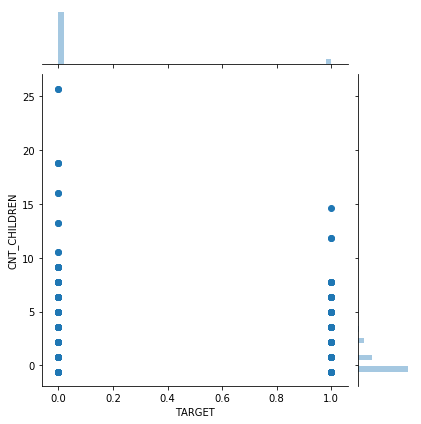

<Figure size 1440x360 with 0 Axes>

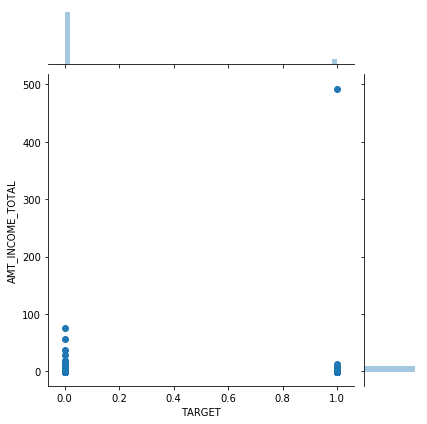

<Figure size 1440x360 with 0 Axes>

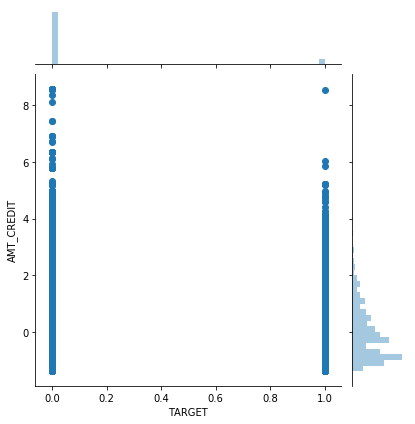

<Figure size 1440x360 with 0 Axes>

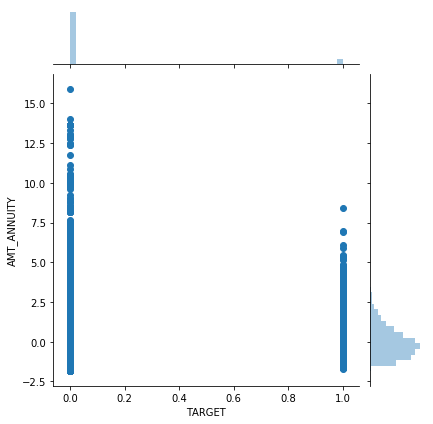

<Figure size 1440x360 with 0 Axes>

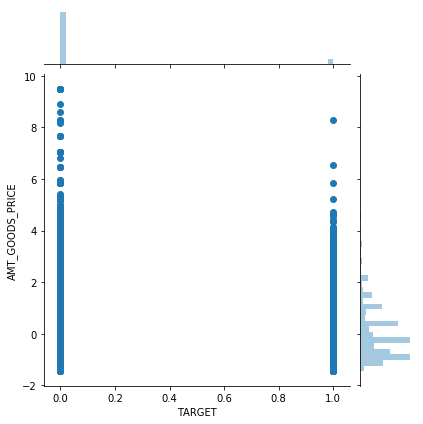

<Figure size 1440x360 with 0 Axes>

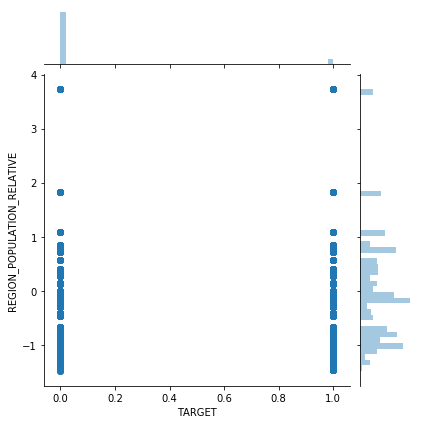

<Figure size 1440x360 with 0 Axes>

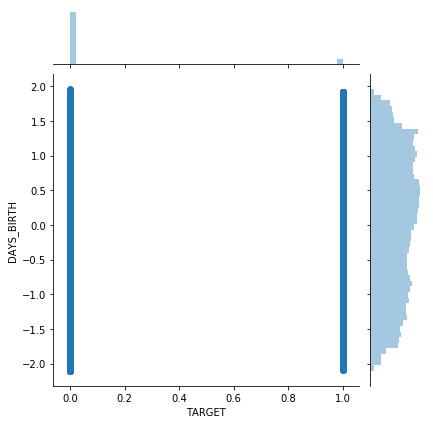

<Figure size 1440x360 with 0 Axes>

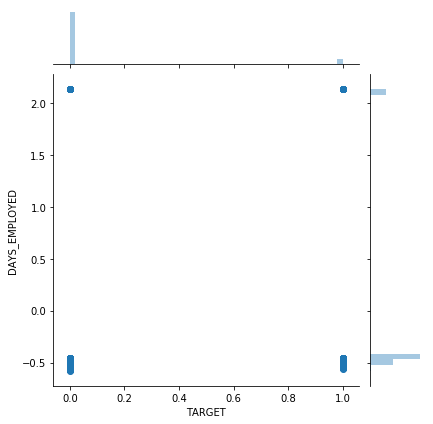

<Figure size 1440x360 with 0 Axes>

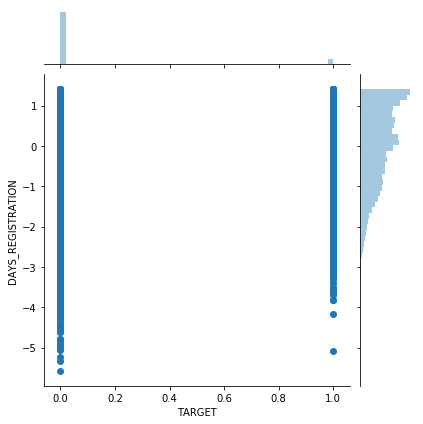

<Figure size 1440x360 with 0 Axes>

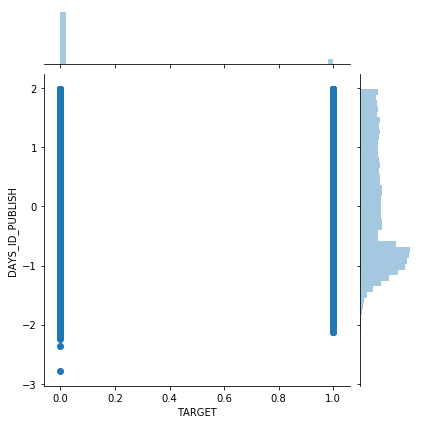

<Figure size 1440x360 with 0 Axes>

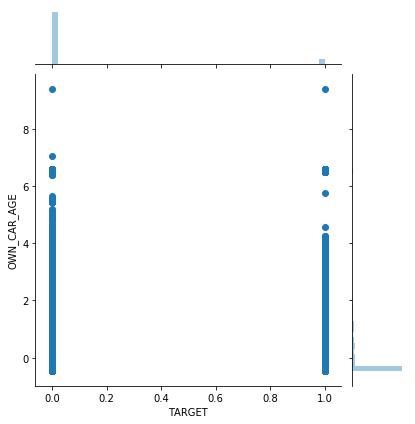

<Figure size 1440x360 with 0 Axes>

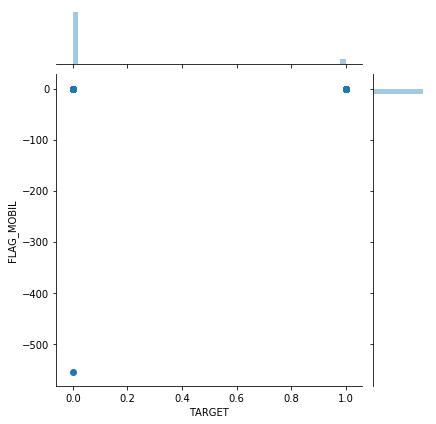

<Figure size 1440x360 with 0 Axes>

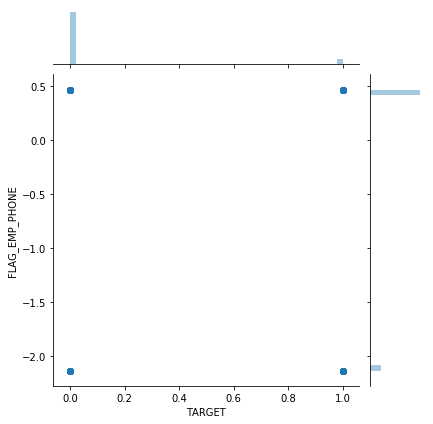

<Figure size 1440x360 with 0 Axes>

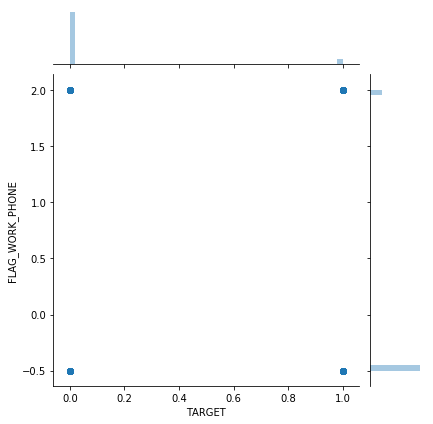

<Figure size 1440x360 with 0 Axes>

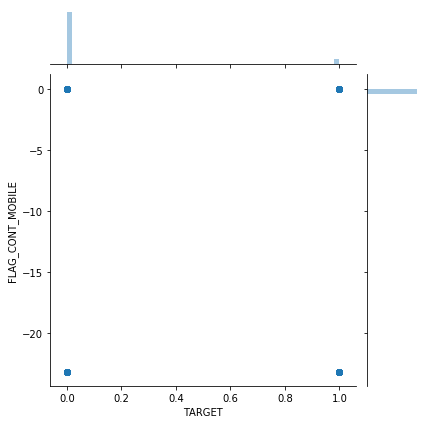

<Figure size 1440x360 with 0 Axes>

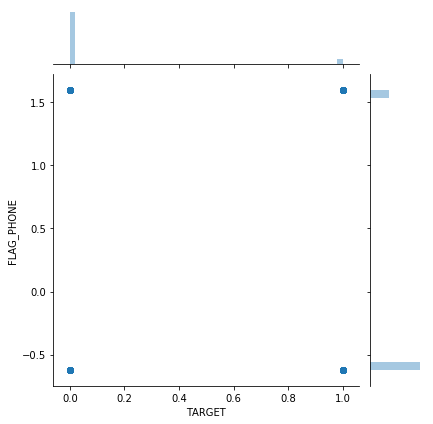

<Figure size 1440x360 with 0 Axes>

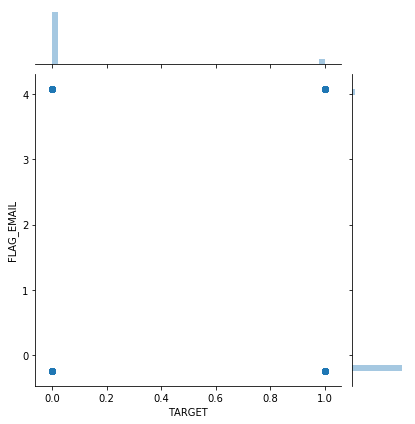

<Figure size 1440x360 with 0 Axes>

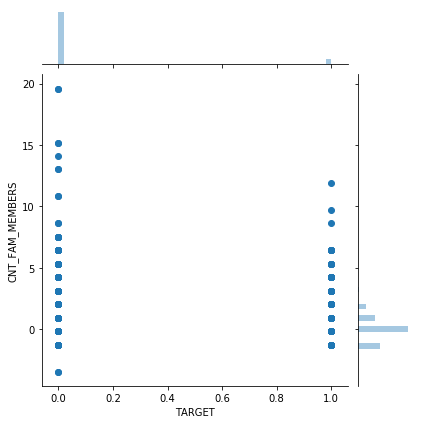

<Figure size 1440x360 with 0 Axes>

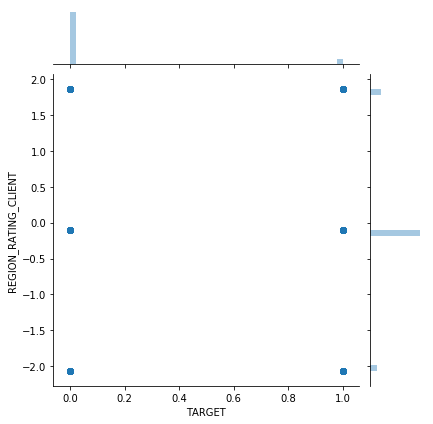

<Figure size 1440x360 with 0 Axes>

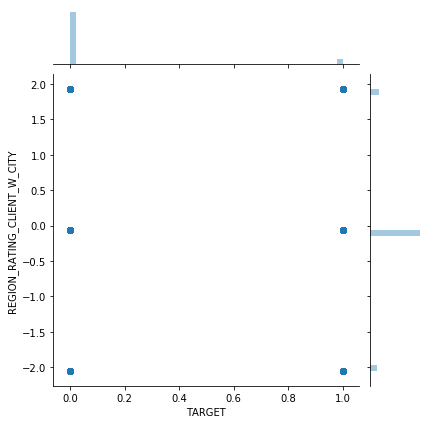

<Figure size 1440x360 with 0 Axes>

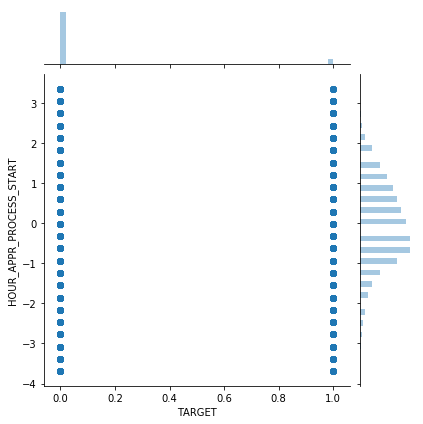

<Figure size 1440x360 with 0 Axes>

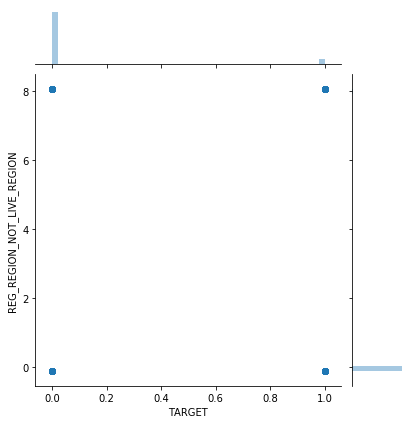

<Figure size 1440x360 with 0 Axes>

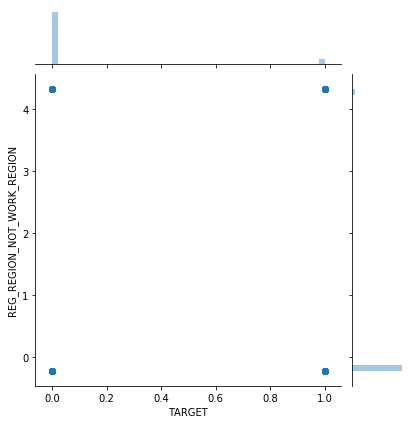

<Figure size 1440x360 with 0 Axes>

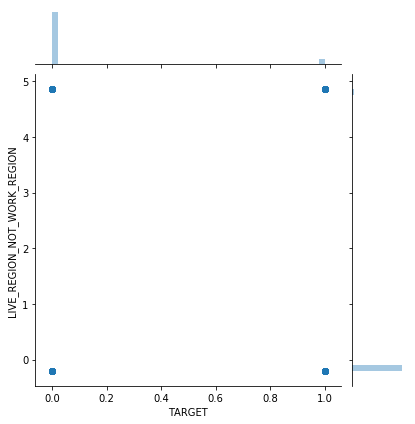

<Figure size 1440x360 with 0 Axes>

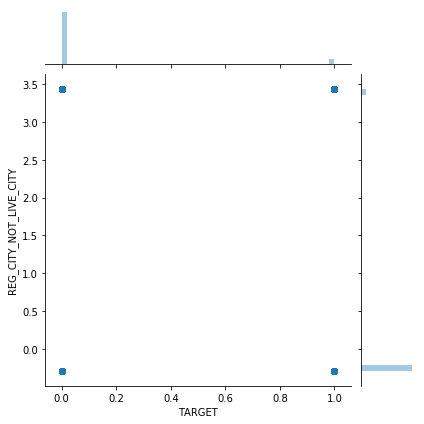

<Figure size 1440x360 with 0 Axes>

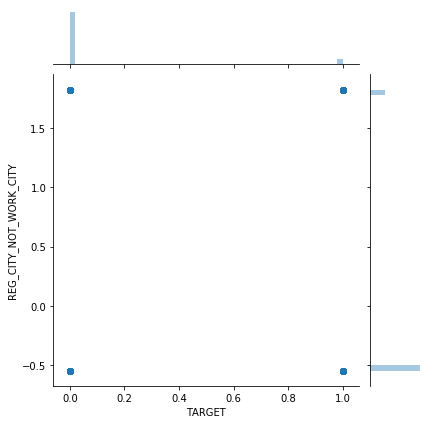

<Figure size 1440x360 with 0 Axes>

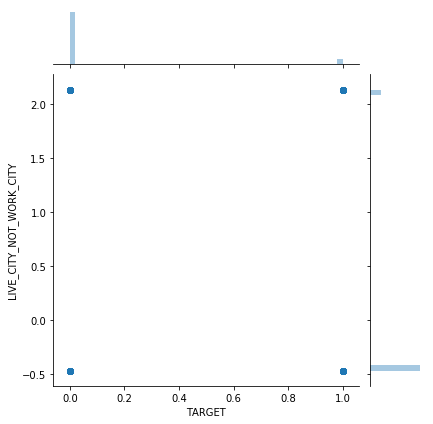

<Figure size 1440x360 with 0 Axes>

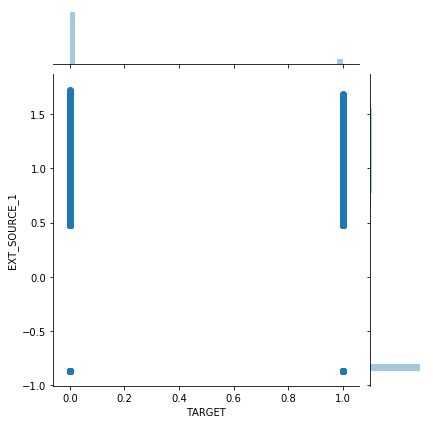

<Figure size 1440x360 with 0 Axes>

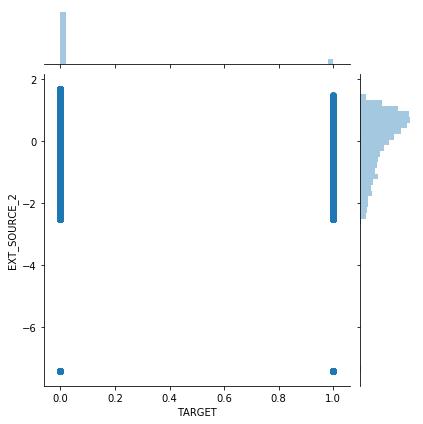

<Figure size 1440x360 with 0 Axes>

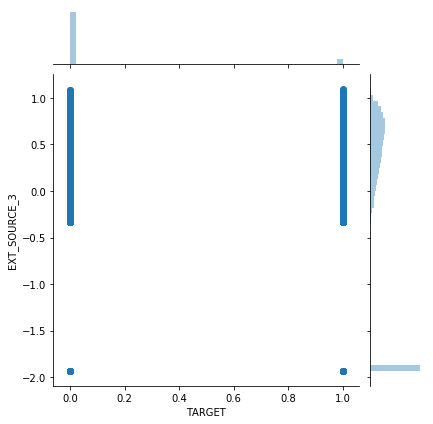

<Figure size 1440x360 with 0 Axes>

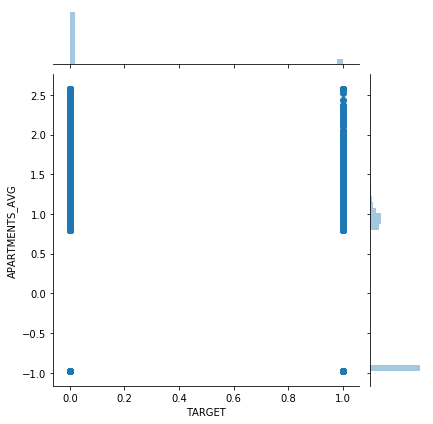

<Figure size 1440x360 with 0 Axes>

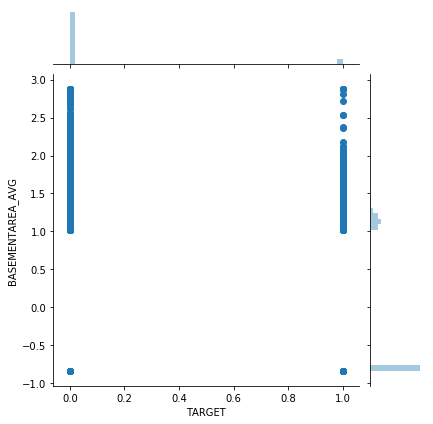

<Figure size 1440x360 with 0 Axes>

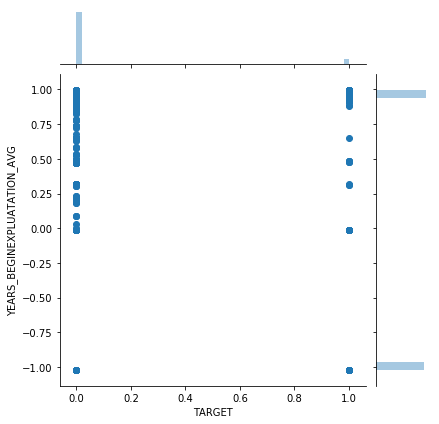

<Figure size 1440x360 with 0 Axes>

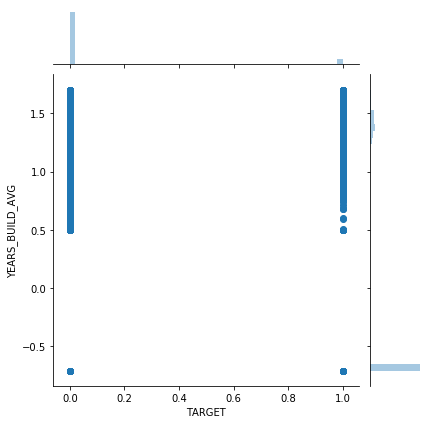

<Figure size 1440x360 with 0 Axes>

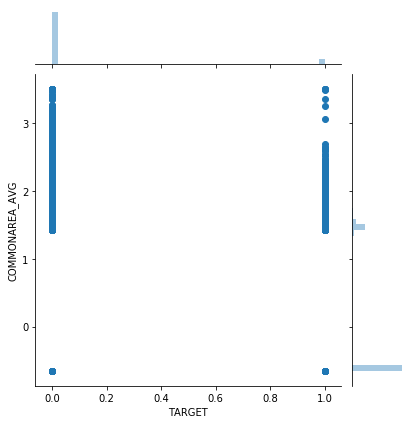

<Figure size 1440x360 with 0 Axes>

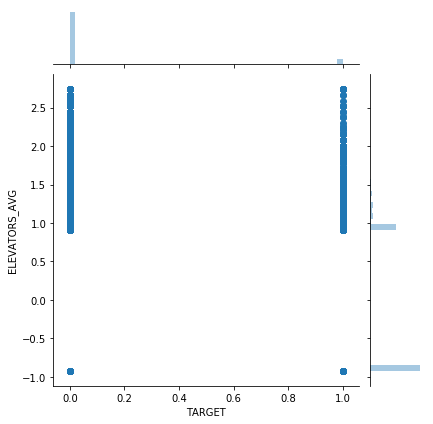

<Figure size 1440x360 with 0 Axes>

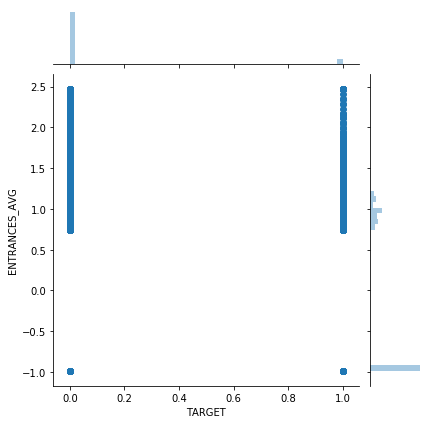

<Figure size 1440x360 with 0 Axes>

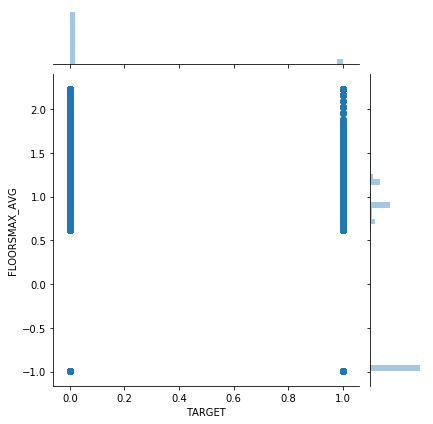

<Figure size 1440x360 with 0 Axes>

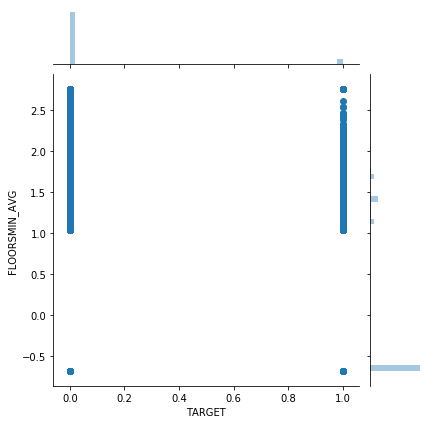

<Figure size 1440x360 with 0 Axes>

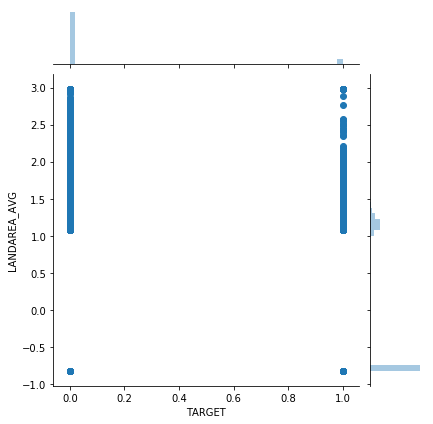

<Figure size 1440x360 with 0 Axes>

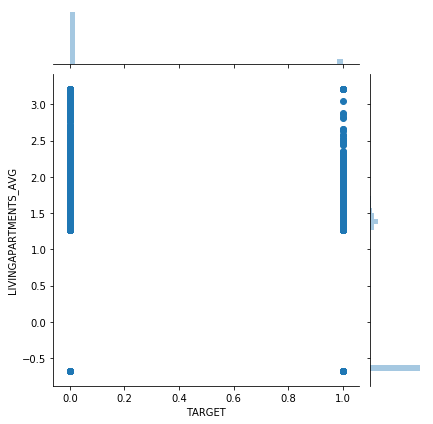

<Figure size 1440x360 with 0 Axes>

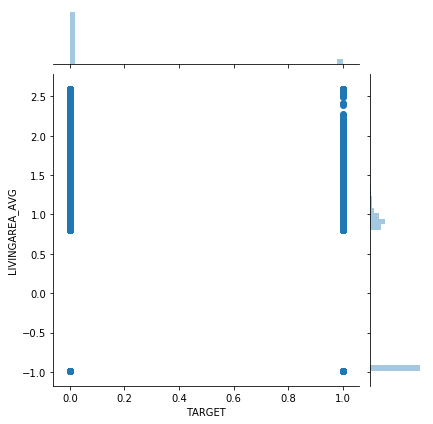

<Figure size 1440x360 with 0 Axes>

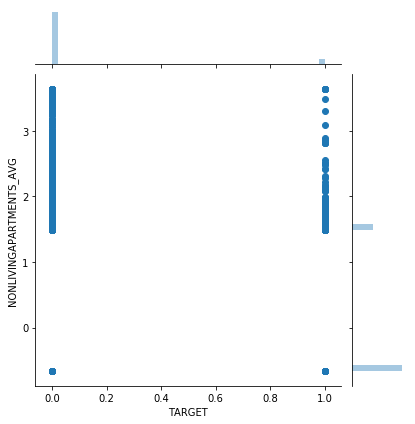

<Figure size 1440x360 with 0 Axes>

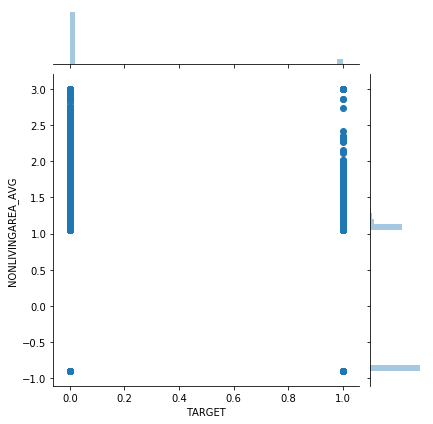

<Figure size 1440x360 with 0 Axes>

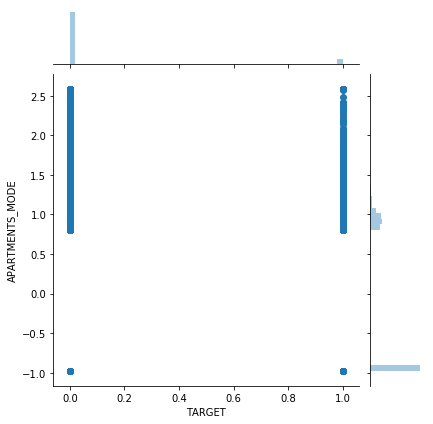

<Figure size 1440x360 with 0 Axes>

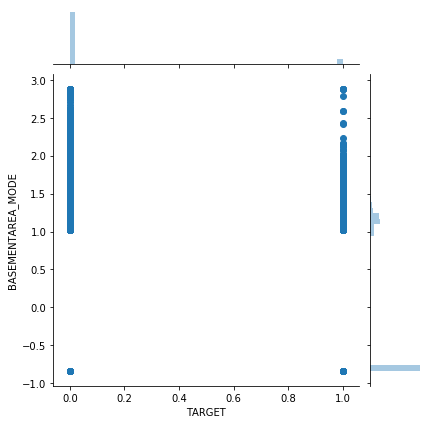

<Figure size 1440x360 with 0 Axes>

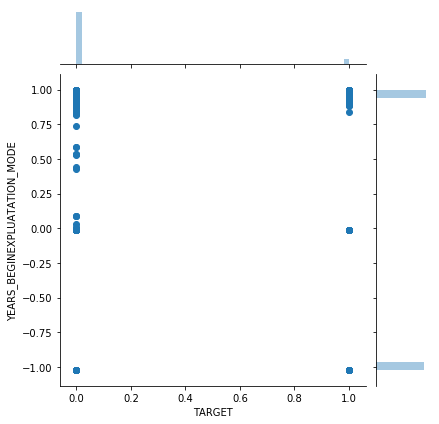

<Figure size 1440x360 with 0 Axes>

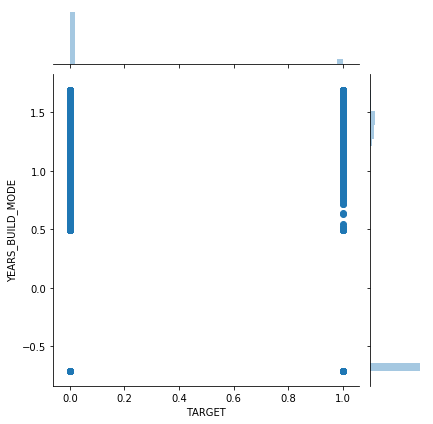

<Figure size 1440x360 with 0 Axes>

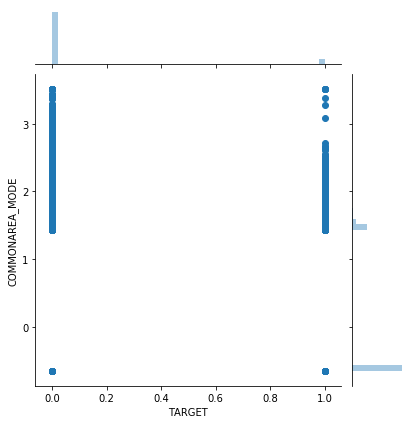

<Figure size 1440x360 with 0 Axes>

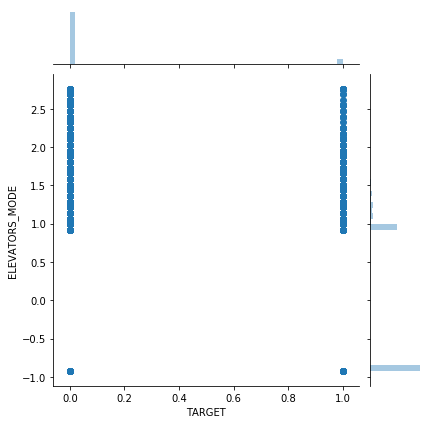

<Figure size 1440x360 with 0 Axes>

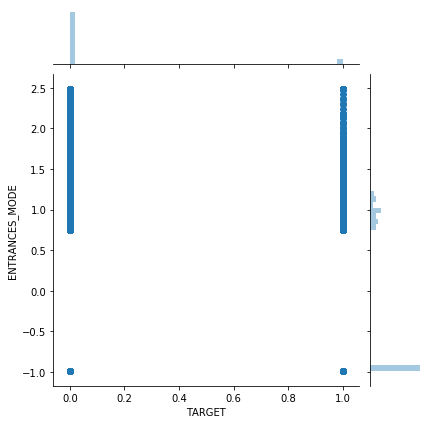

<Figure size 1440x360 with 0 Axes>

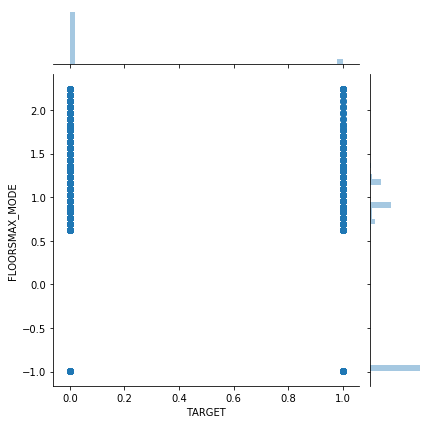

<Figure size 1440x360 with 0 Axes>

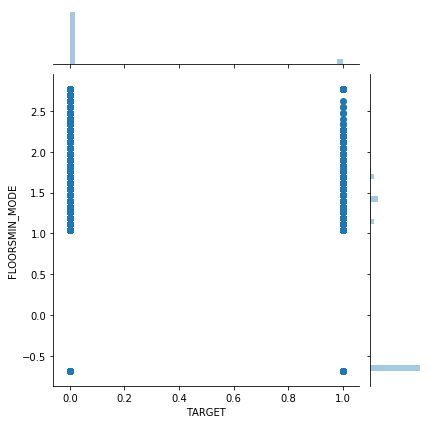

<Figure size 1440x360 with 0 Axes>

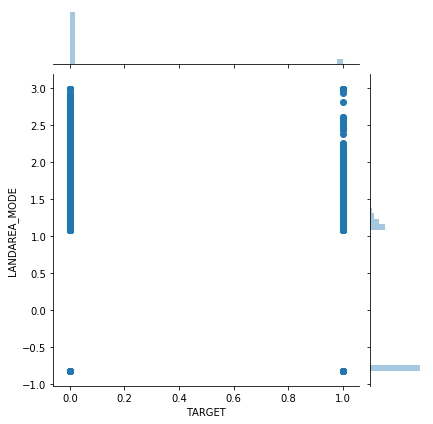

<Figure size 1440x360 with 0 Axes>

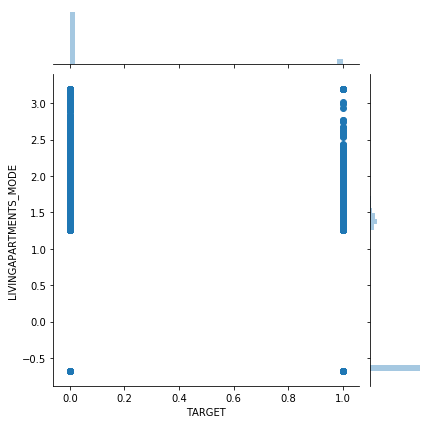

<Figure size 1440x360 with 0 Axes>

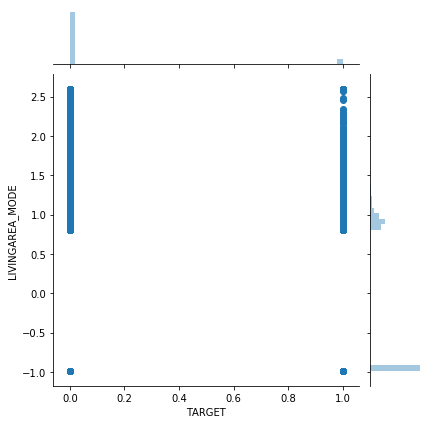

<Figure size 1440x360 with 0 Axes>

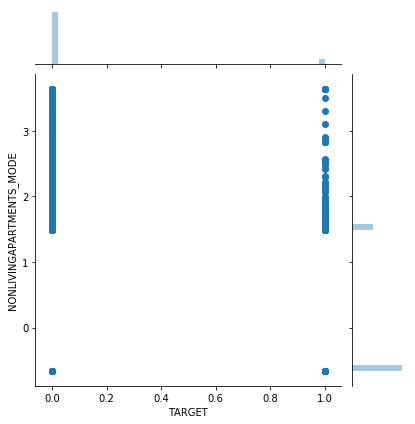

<Figure size 1440x360 with 0 Axes>

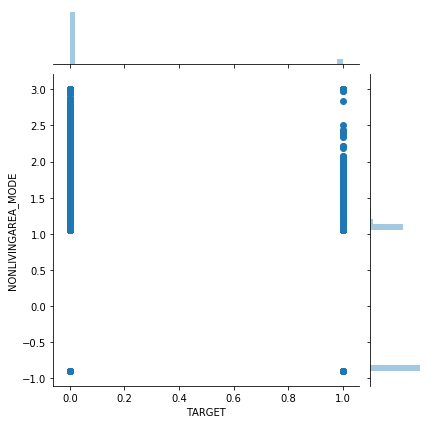

<Figure size 1440x360 with 0 Axes>

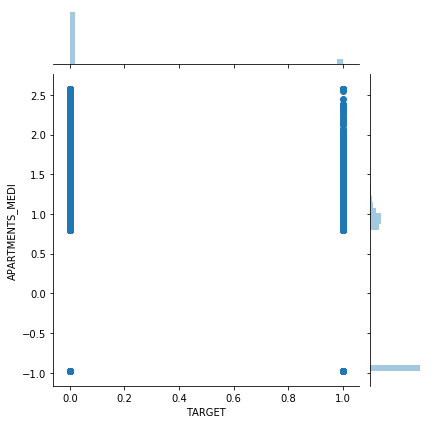

<Figure size 1440x360 with 0 Axes>

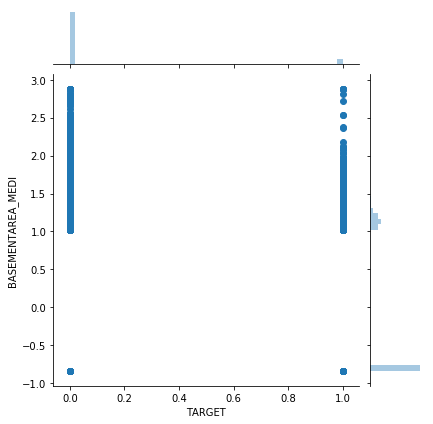

<Figure size 1440x360 with 0 Axes>

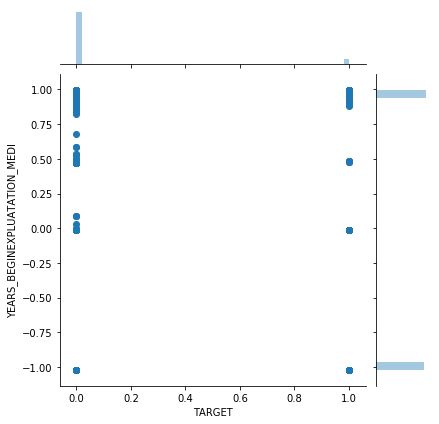

<Figure size 1440x360 with 0 Axes>

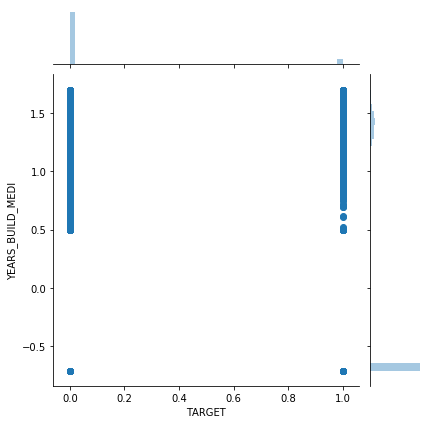

<Figure size 1440x360 with 0 Axes>

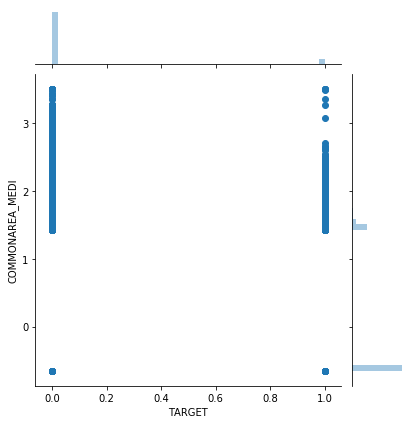

<Figure size 1440x360 with 0 Axes>

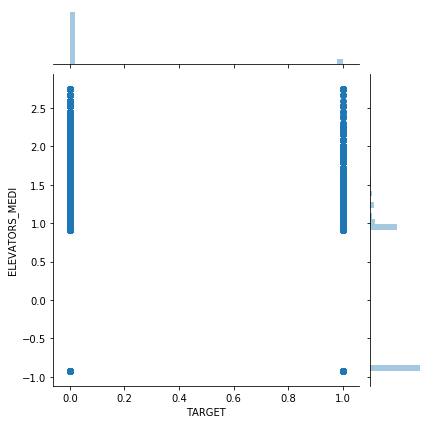

<Figure size 1440x360 with 0 Axes>

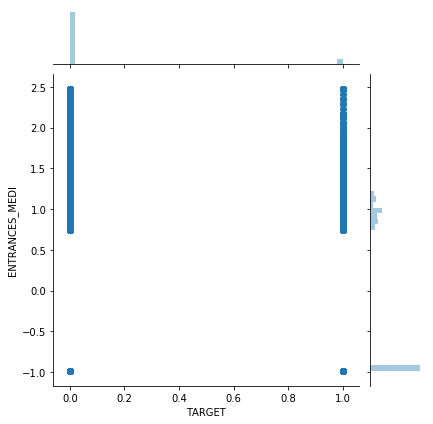

<Figure size 1440x360 with 0 Axes>

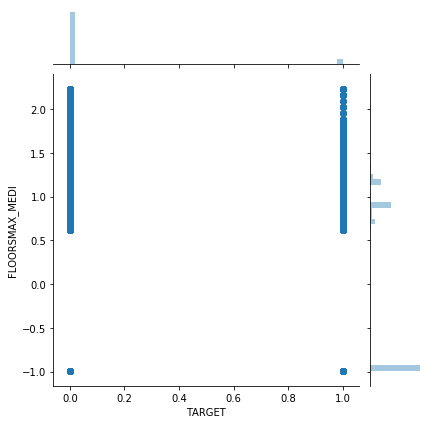

<Figure size 1440x360 with 0 Axes>

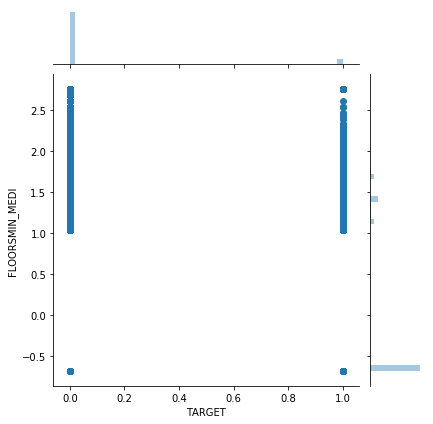

<Figure size 1440x360 with 0 Axes>

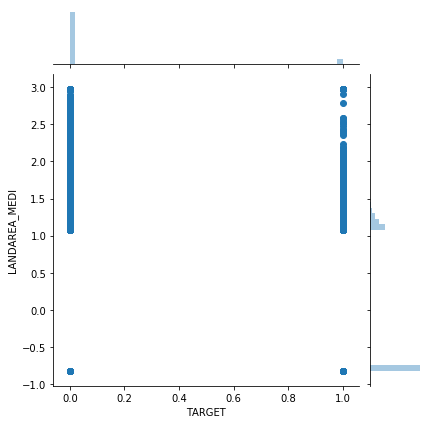

<Figure size 1440x360 with 0 Axes>

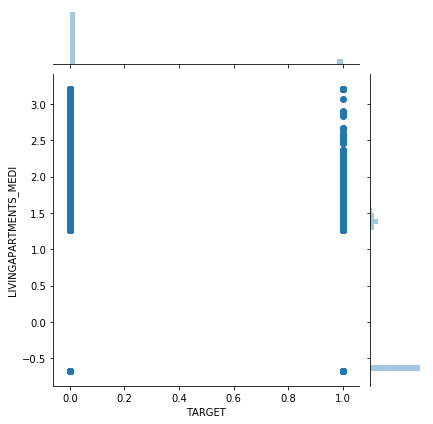

<Figure size 1440x360 with 0 Axes>

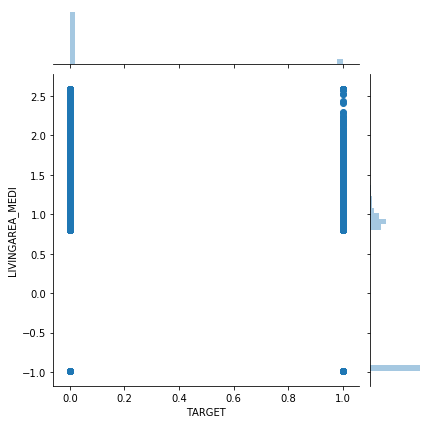

<Figure size 1440x360 with 0 Axes>

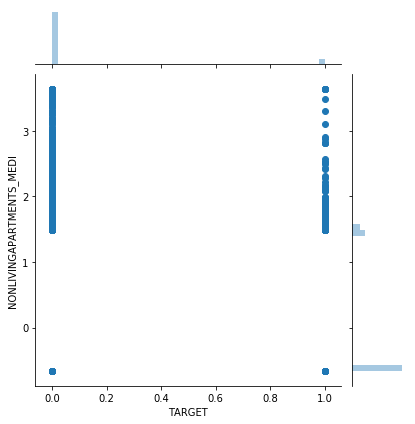

<Figure size 1440x360 with 0 Axes>

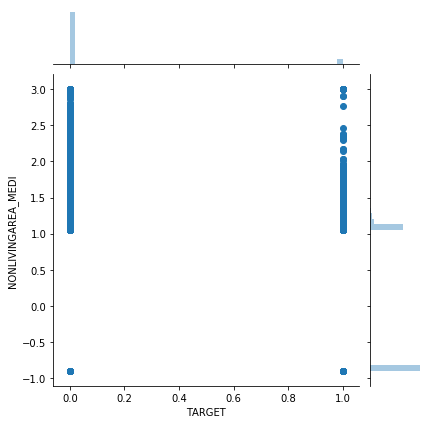

<Figure size 1440x360 with 0 Axes>

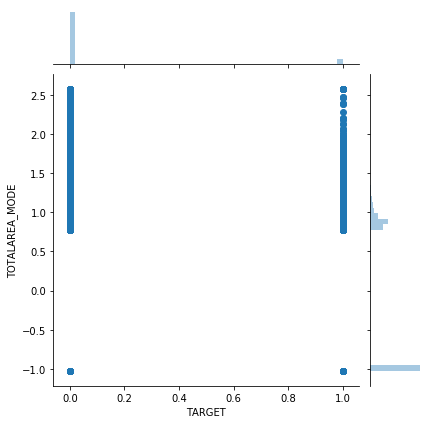

<Figure size 1440x360 with 0 Axes>

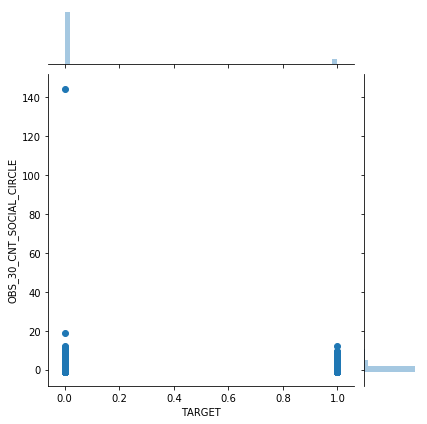

<Figure size 1440x360 with 0 Axes>

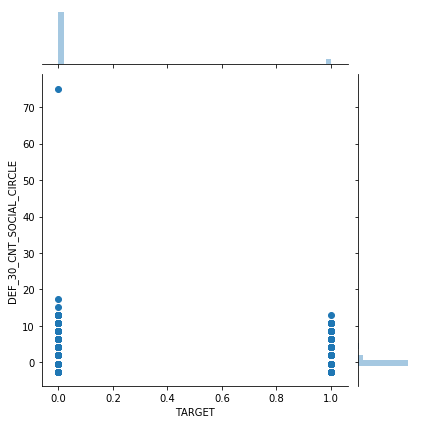

<Figure size 1440x360 with 0 Axes>

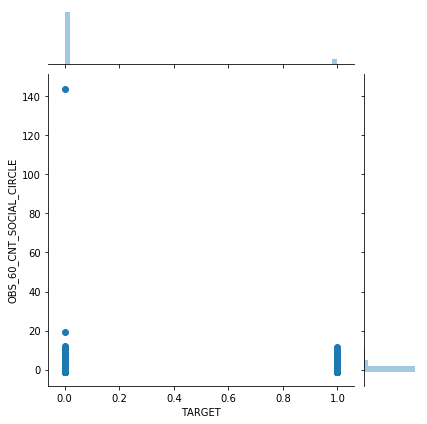

<Figure size 1440x360 with 0 Axes>

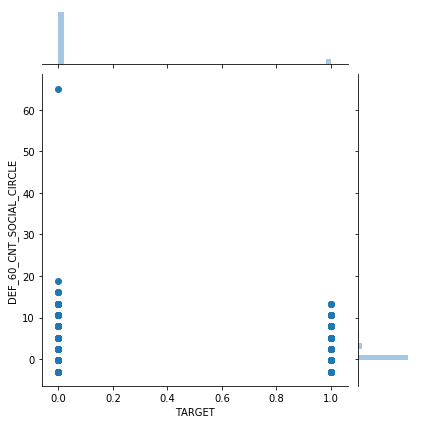

<Figure size 1440x360 with 0 Axes>

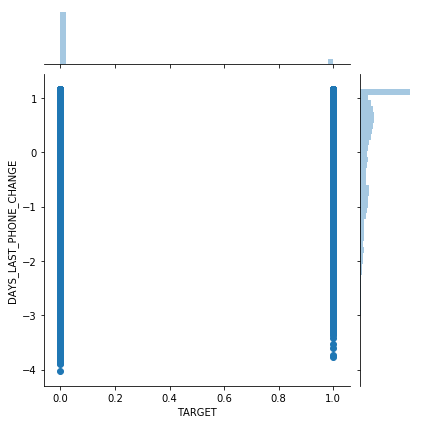

<Figure size 1440x360 with 0 Axes>

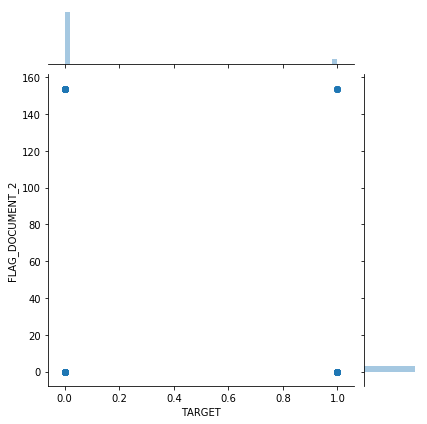

<Figure size 1440x360 with 0 Axes>

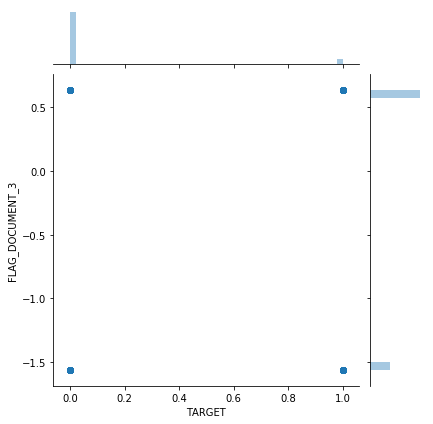

<Figure size 1440x360 with 0 Axes>

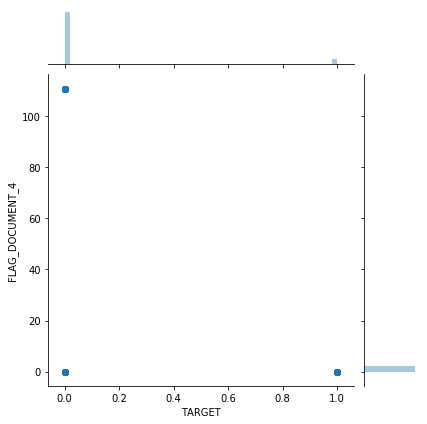

<Figure size 1440x360 with 0 Axes>

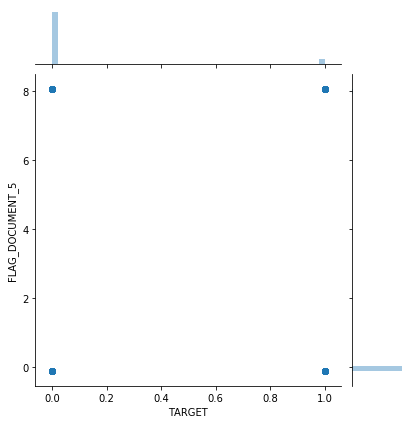

<Figure size 1440x360 with 0 Axes>

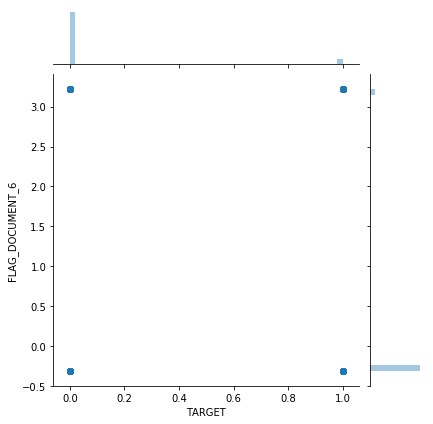

<Figure size 1440x360 with 0 Axes>

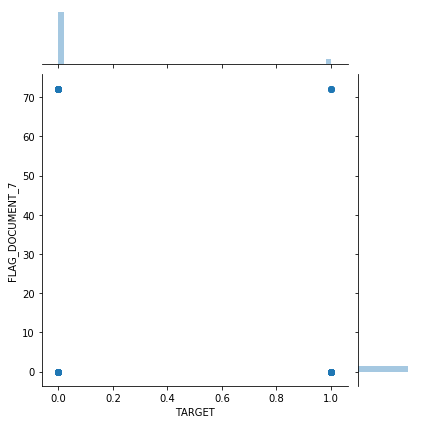

<Figure size 1440x360 with 0 Axes>

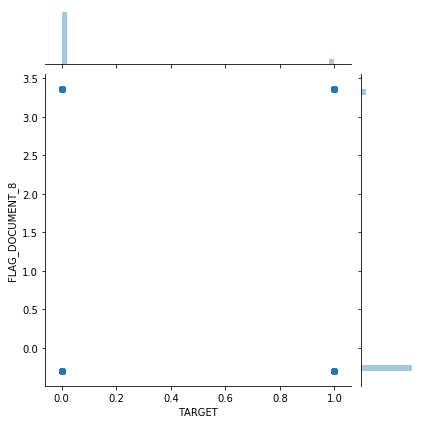

<Figure size 1440x360 with 0 Axes>

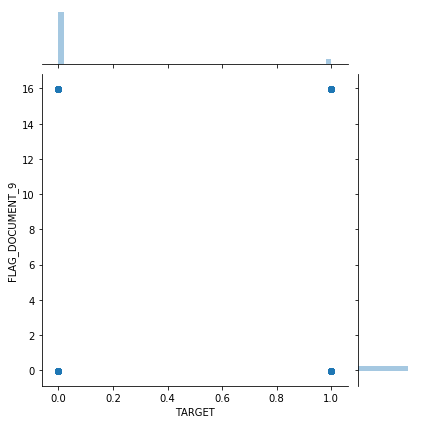

<Figure size 1440x360 with 0 Axes>

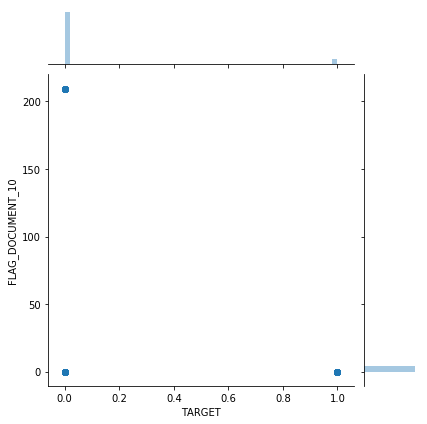

<Figure size 1440x360 with 0 Axes>

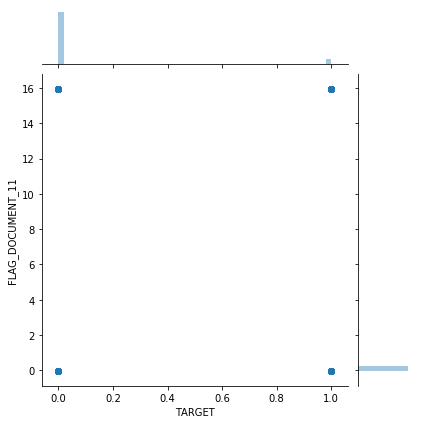

<Figure size 1440x360 with 0 Axes>

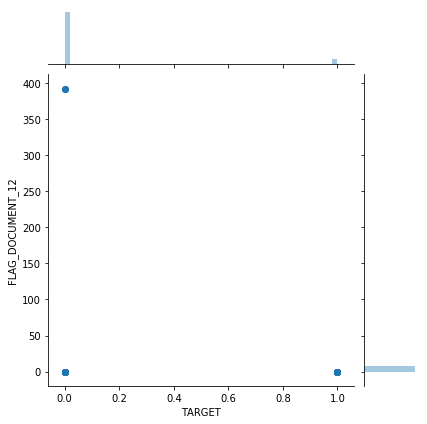

<Figure size 1440x360 with 0 Axes>

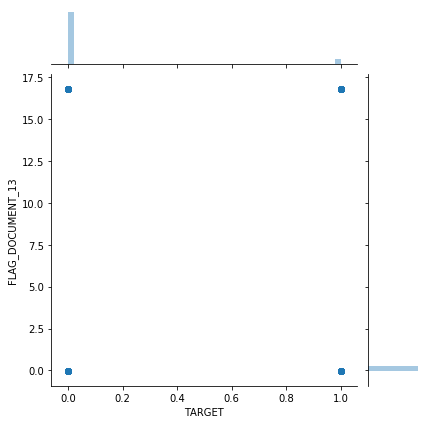

<Figure size 1440x360 with 0 Axes>

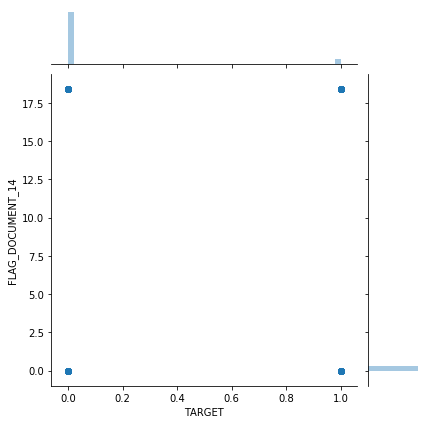

<Figure size 1440x360 with 0 Axes>

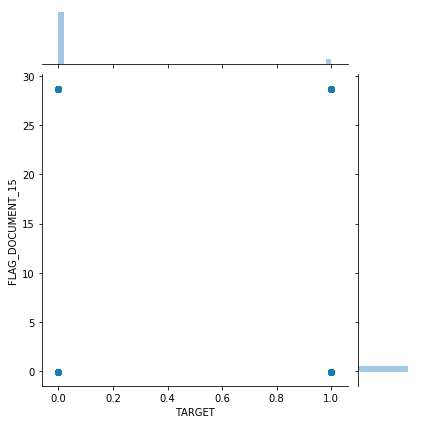

<Figure size 1440x360 with 0 Axes>

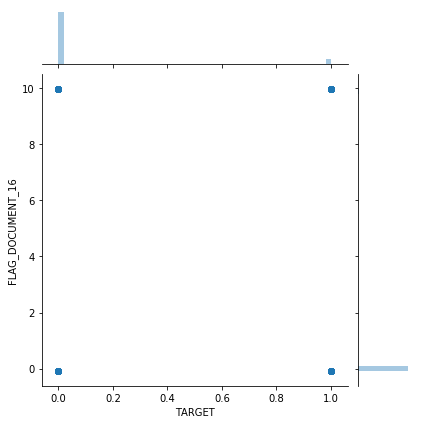

<Figure size 1440x360 with 0 Axes>

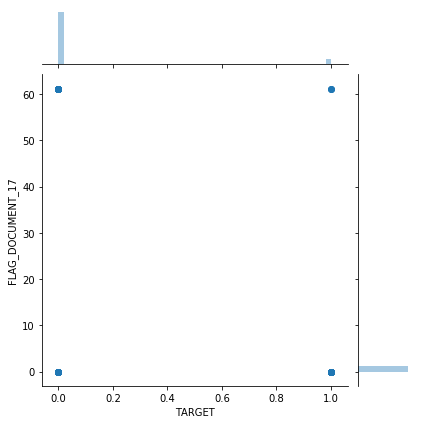

<Figure size 1440x360 with 0 Axes>

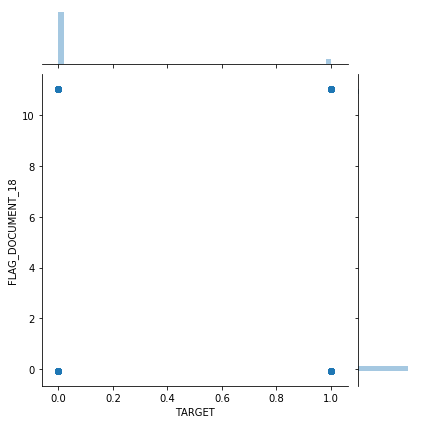

<Figure size 1440x360 with 0 Axes>

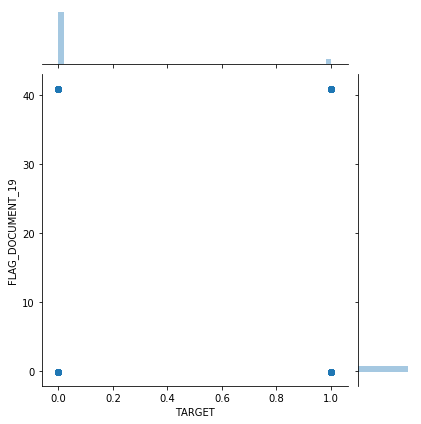

<Figure size 1440x360 with 0 Axes>

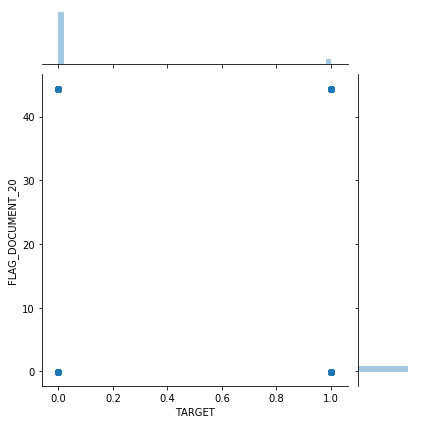

<Figure size 1440x360 with 0 Axes>

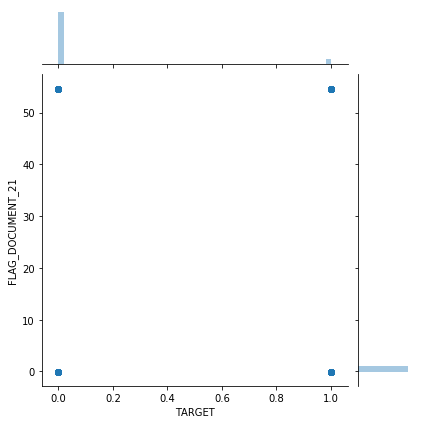

<Figure size 1440x360 with 0 Axes>

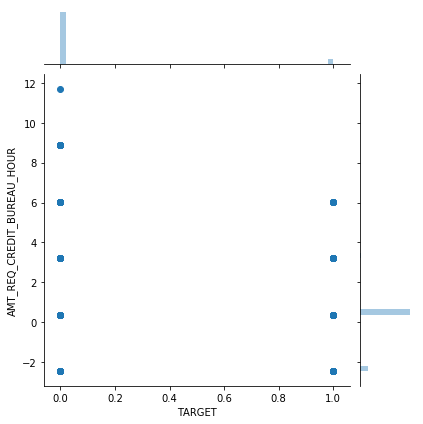

<Figure size 1440x360 with 0 Axes>

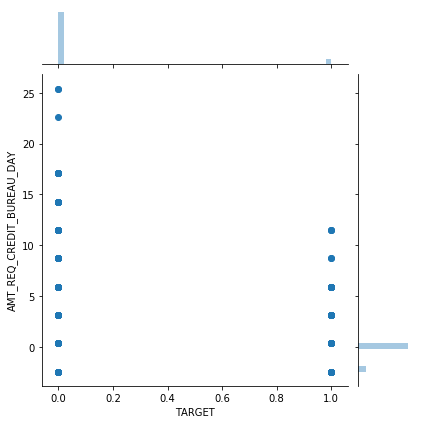

<Figure size 1440x360 with 0 Axes>

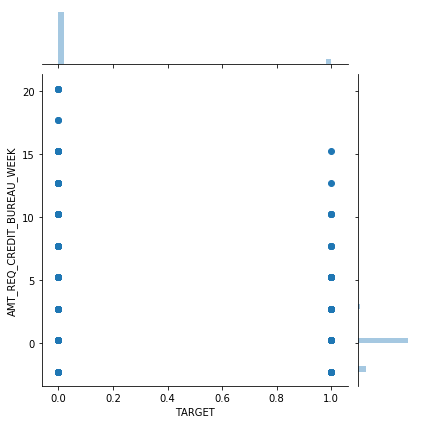

<Figure size 1440x360 with 0 Axes>

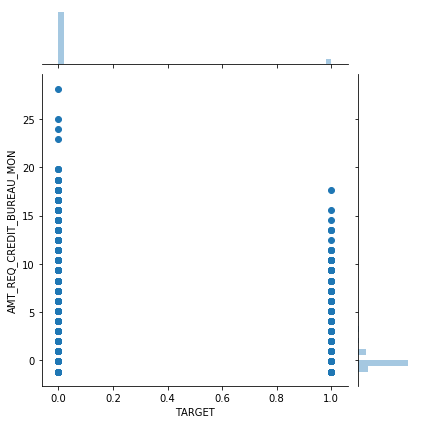

<Figure size 1440x360 with 0 Axes>

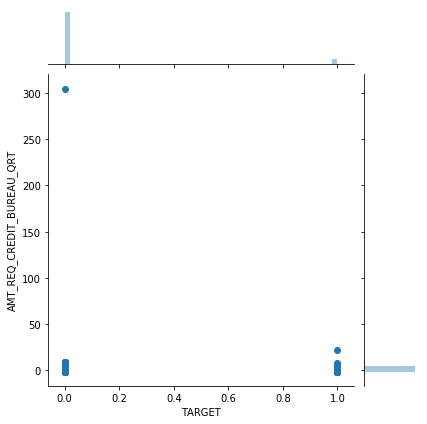

<Figure size 1440x360 with 0 Axes>

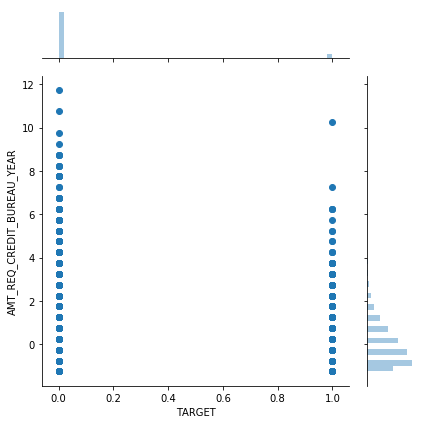

In [20]:
autojointplot(std_corr, "TARGET", 20, 5)

In [33]:
categoli = application_train_origin.loc[:,["FLAG_MOBIL", "FLAG_EMP_PHONE", "FLAG_WORK_PHONE", "FLAG_CONT_MOBILE", 
       "FLAG_PHONE", "FLAG_EMAIL", "REGION_RATING_CLIENT", "REGION_RATING_CLIENT_W_CITY",
       "REG_REGION_NOT_LIVE_REGION", "REG_REGION_NOT_WORK_REGION", "LIVE_REGION_NOT_WORK_REGION",
      "REG_CITY_NOT_LIVE_CITY", "REG_CITY_NOT_WORK_CITY", "LIVE_CITY_NOT_WORK_CITY", "FLAG_DOCUMENT_2", "FLAG_DOCUMENT_3",
        "FLAG_DOCUMENT_4", "FLAG_DOCUMENT_5", "FLAG_DOCUMENT_6", "FLAG_DOCUMENT_7", "FLAG_DOCUMENT_8", "FLAG_DOCUMENT_9",
        "FLAG_DOCUMENT_10", "FLAG_DOCUMENT_11", "FLAG_DOCUMENT_12", "FLAG_DOCUMENT_13", "FLAG_DOCUMENT_14", "FLAG_DOCUMENT_15",
        "FLAG_DOCUMENT_16", "FLAG_DOCUMENT_17", "FLAG_DOCUMENT_18", "FLAG_DOCUMENT_19", "FLAG_DOCUMENT_20", "FLAG_DOCUMENT_21"]]
no_categoli = data_columns.drop(["FLAG_MOBIL", "FLAG_EMP_PHONE", "FLAG_WORK_PHONE", "FLAG_CONT_MOBILE", 
       "FLAG_PHONE", "FLAG_EMAIL", "REGION_RATING_CLIENT", "REGION_RATING_CLIENT_W_CITY",
       "REG_REGION_NOT_LIVE_REGION", "REG_REGION_NOT_WORK_REGION", "LIVE_REGION_NOT_WORK_REGION",
      "REG_CITY_NOT_LIVE_CITY", "REG_CITY_NOT_WORK_CITY", "LIVE_CITY_NOT_WORK_CITY", "FLAG_DOCUMENT_2", "FLAG_DOCUMENT_3",
        "FLAG_DOCUMENT_4", "FLAG_DOCUMENT_5", "FLAG_DOCUMENT_6", "FLAG_DOCUMENT_7", "FLAG_DOCUMENT_8", "FLAG_DOCUMENT_9",
        "FLAG_DOCUMENT_10", "FLAG_DOCUMENT_11", "FLAG_DOCUMENT_12", "FLAG_DOCUMENT_13", "FLAG_DOCUMENT_14", "FLAG_DOCUMENT_15",
        "FLAG_DOCUMENT_16", "FLAG_DOCUMENT_17", "FLAG_DOCUMENT_18", "FLAG_DOCUMENT_19", "FLAG_DOCUMENT_20", "FLAG_DOCUMENT_21"], axis=1)

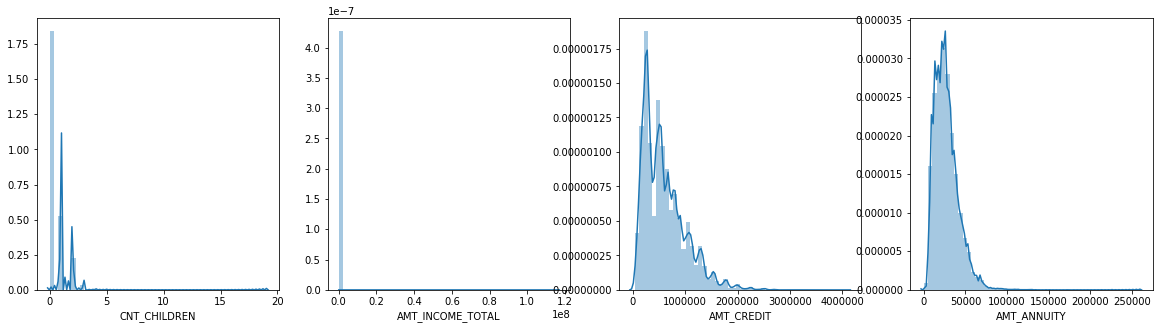

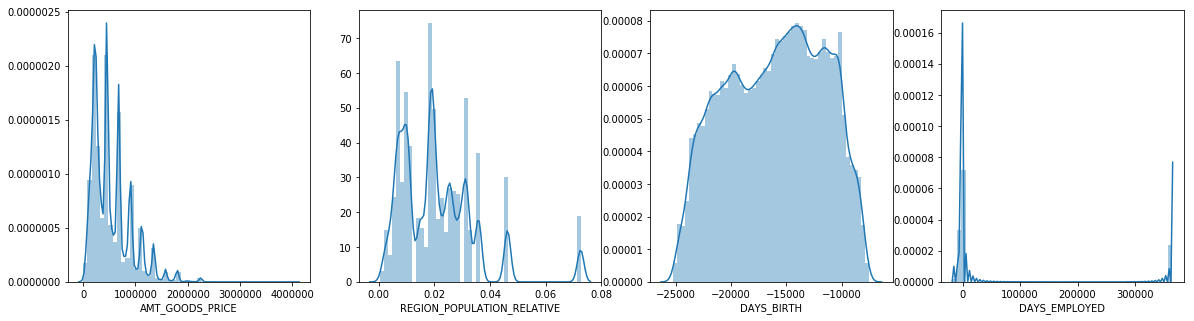

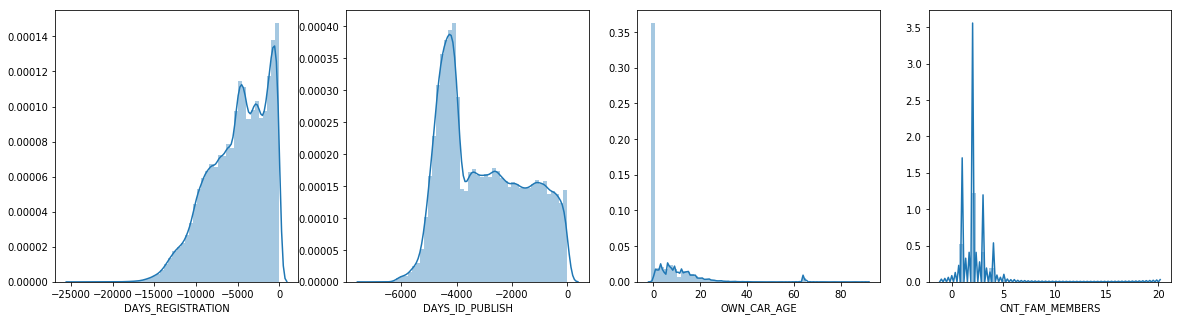

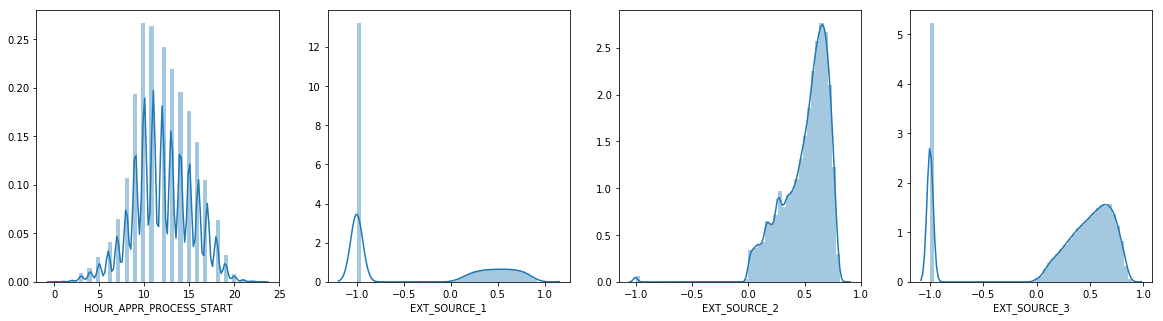

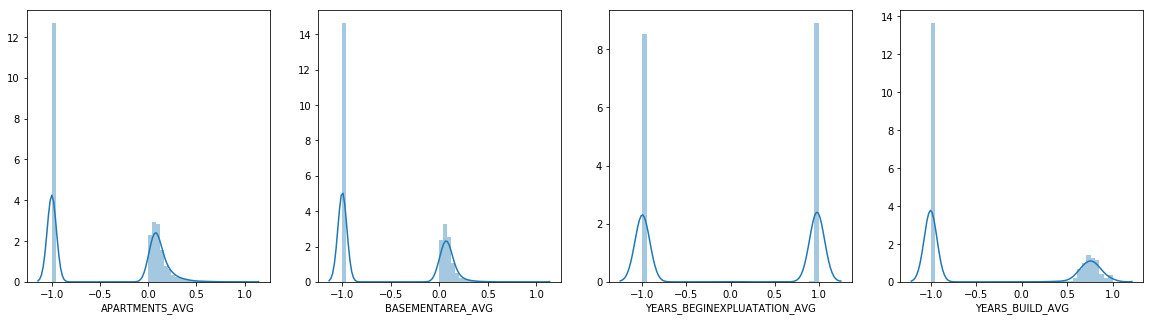

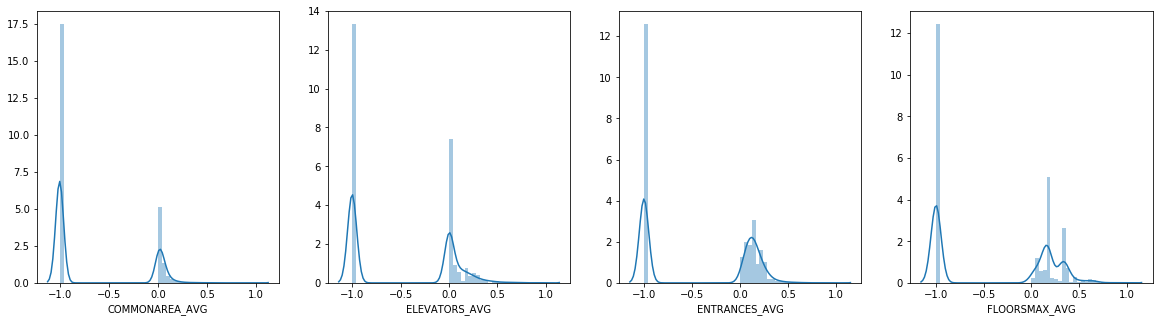

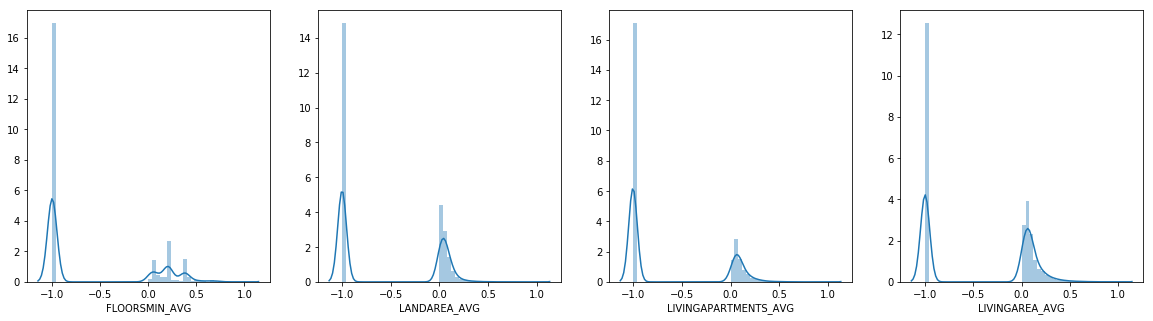

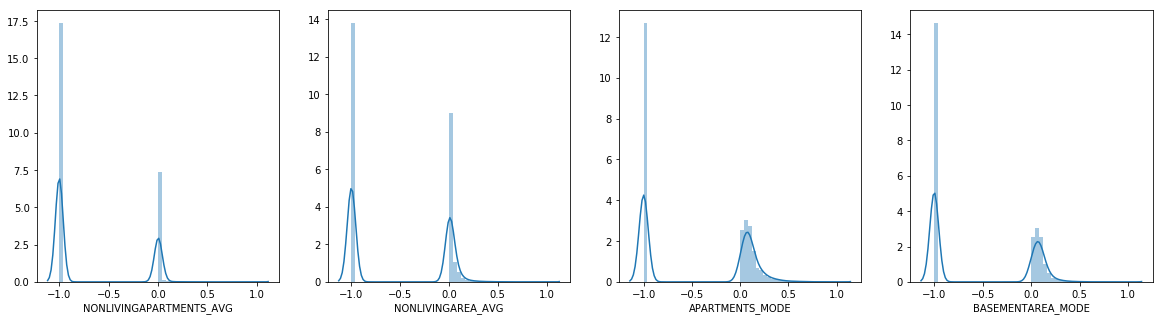

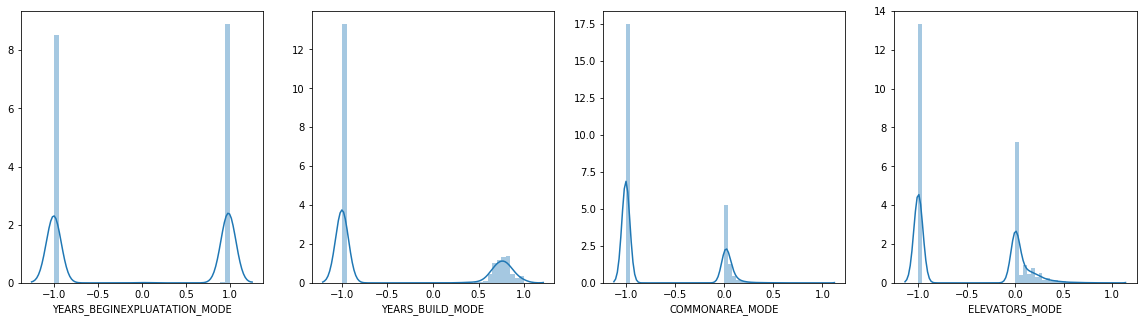

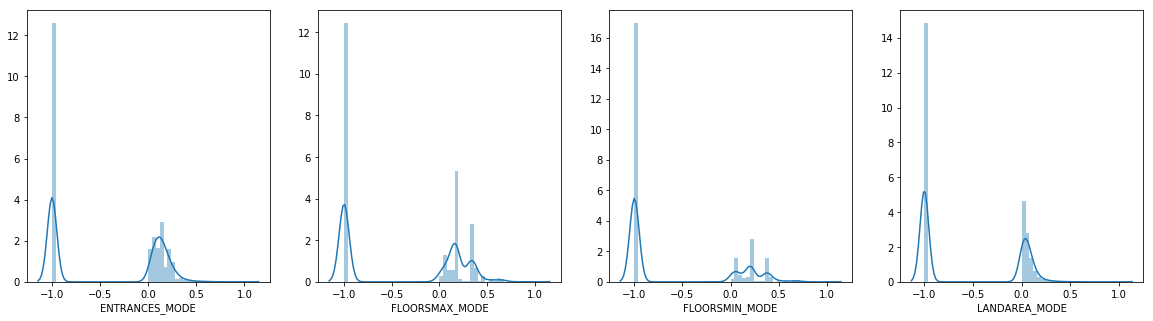

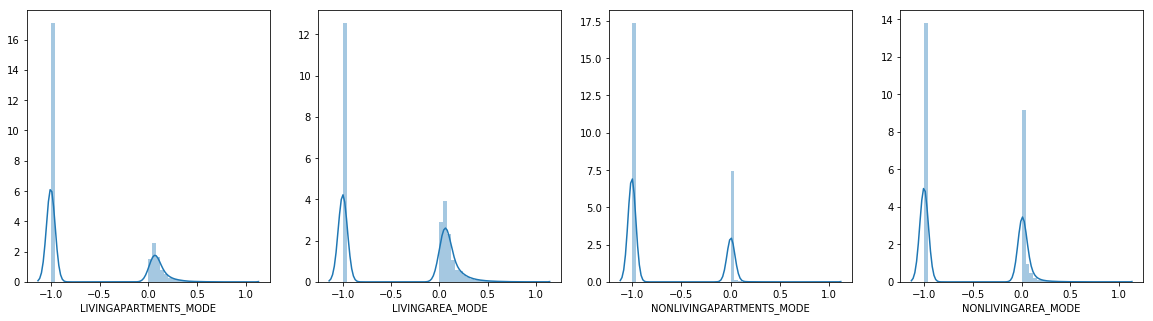

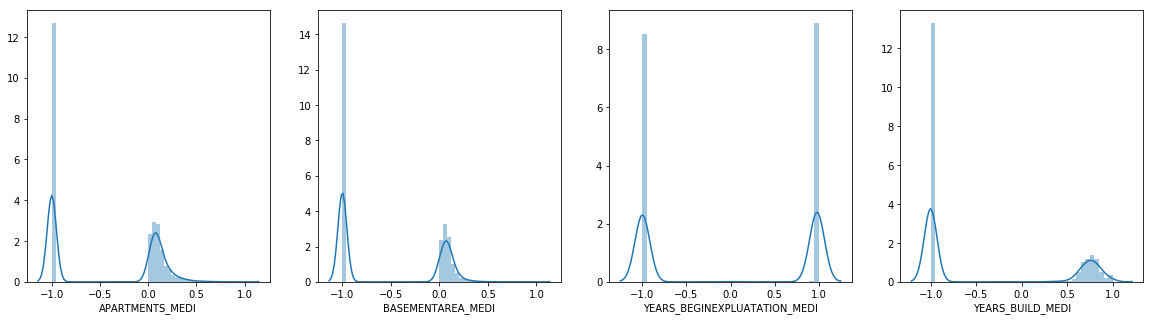

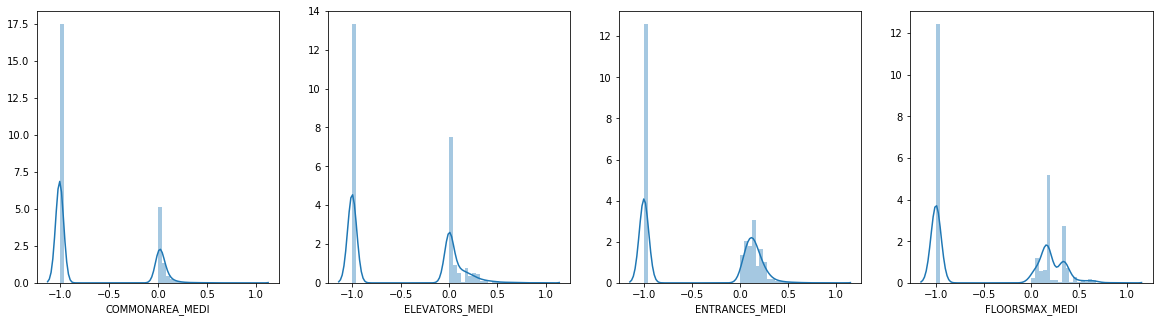

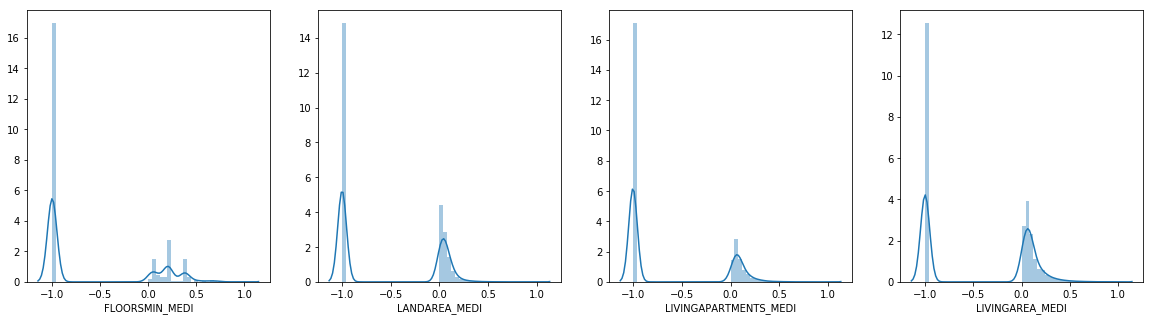

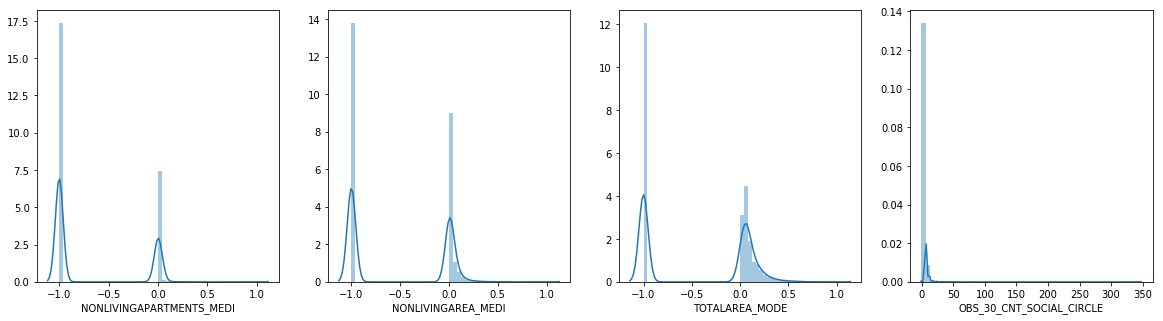

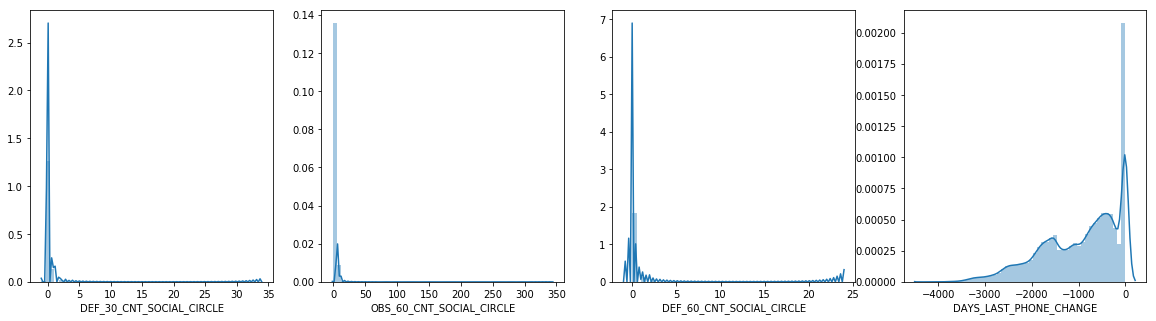

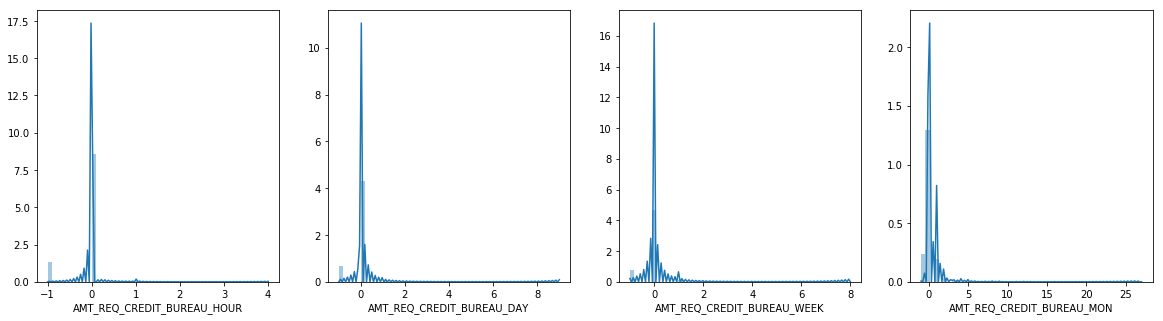

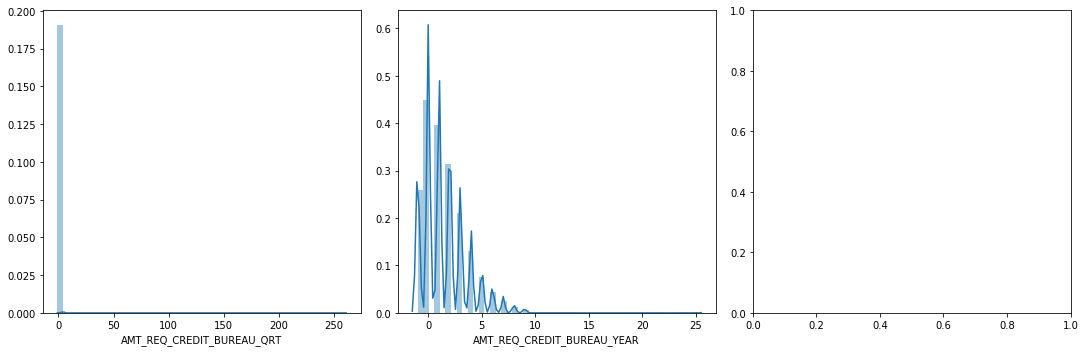

In [34]:
autoDistplot(no_categoli, 4, 20, 5)

In [36]:
# 標準化
sc = StandardScaler()
names = no_categoli.columns.values

i=0
dict = {}
for name in names:
    dict[i]=name
    i += 1
no_categoli_std = pd.DataFrame(sc.fit_transform(no_categoli))
no_categoli_std = no_categoli.rename(columns=dict)

/home/hiro/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/hiro/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


/home/hiro/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


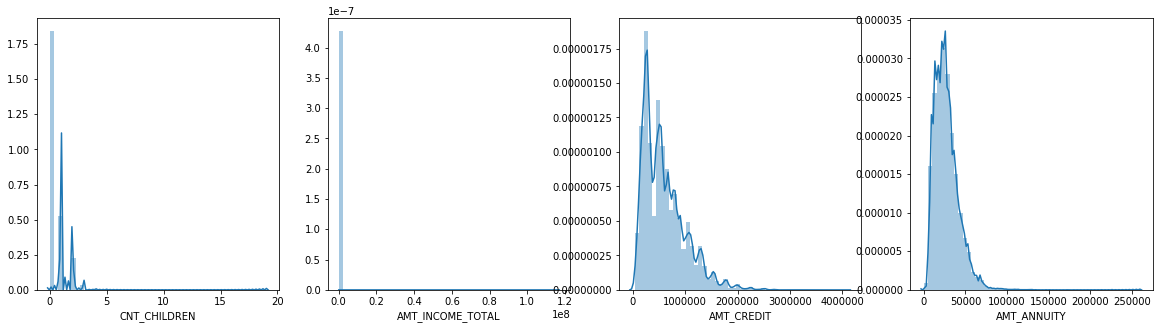

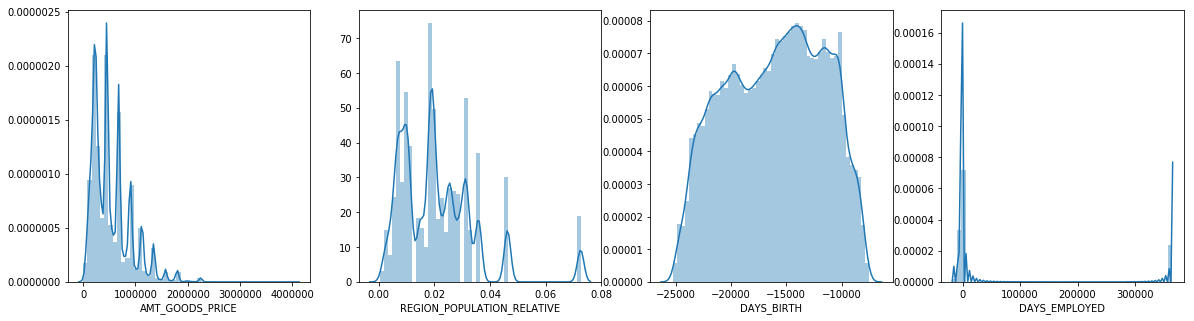

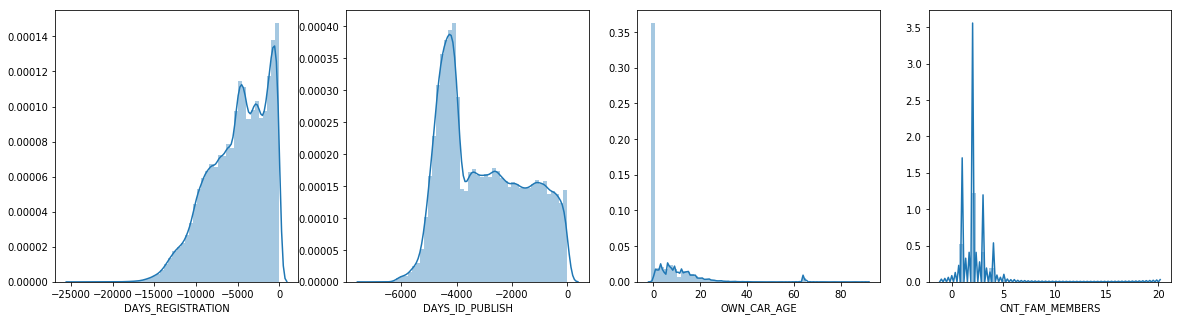

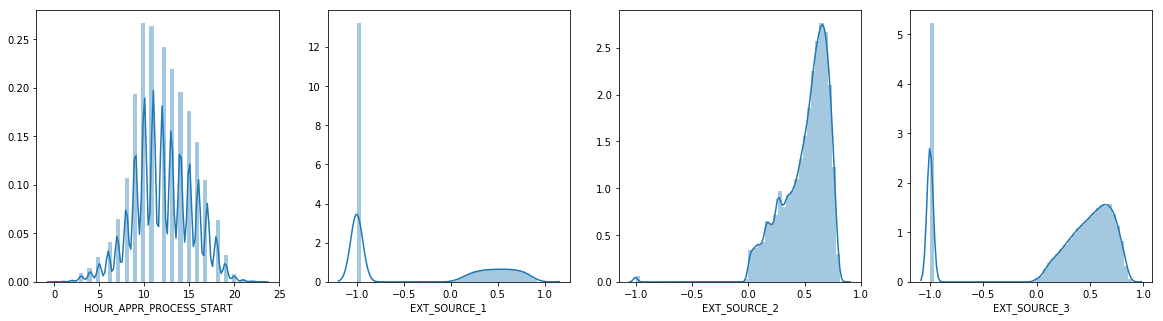

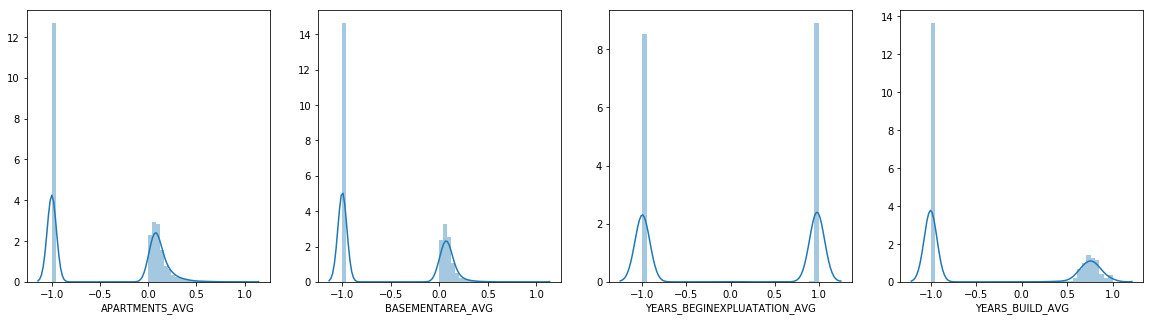

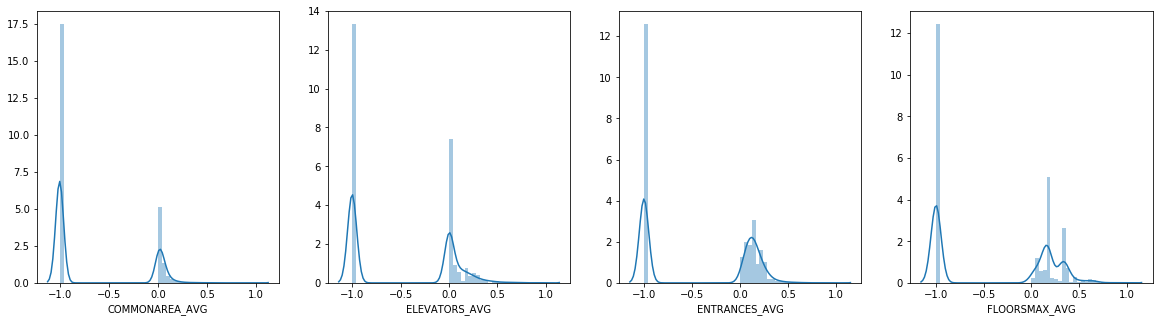

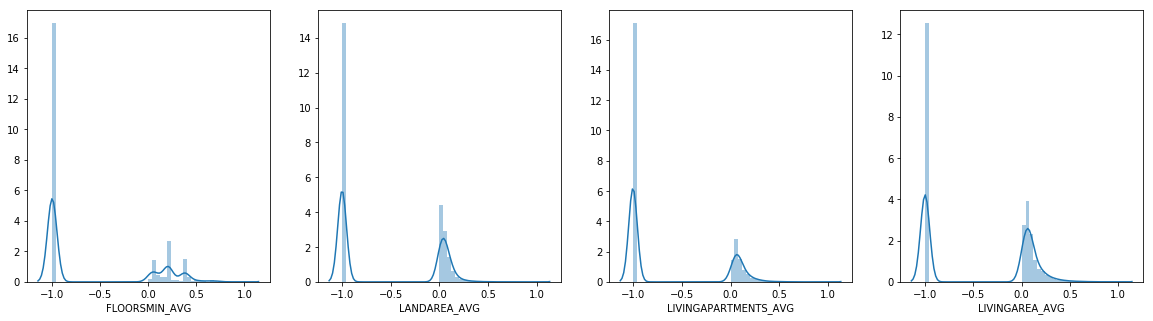

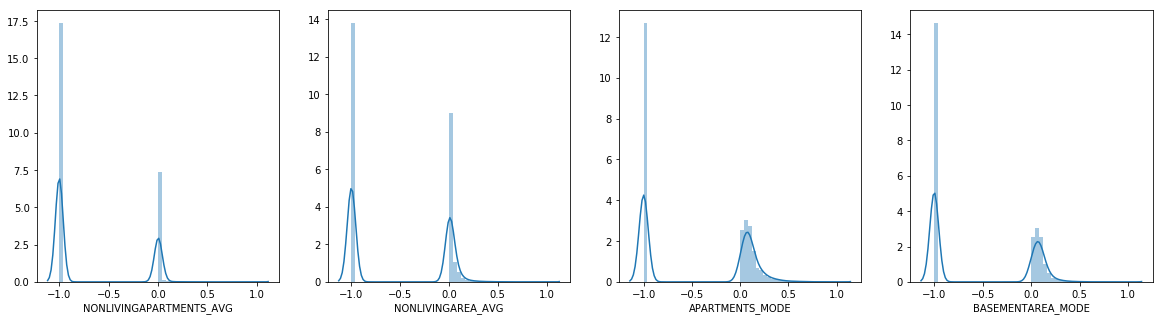

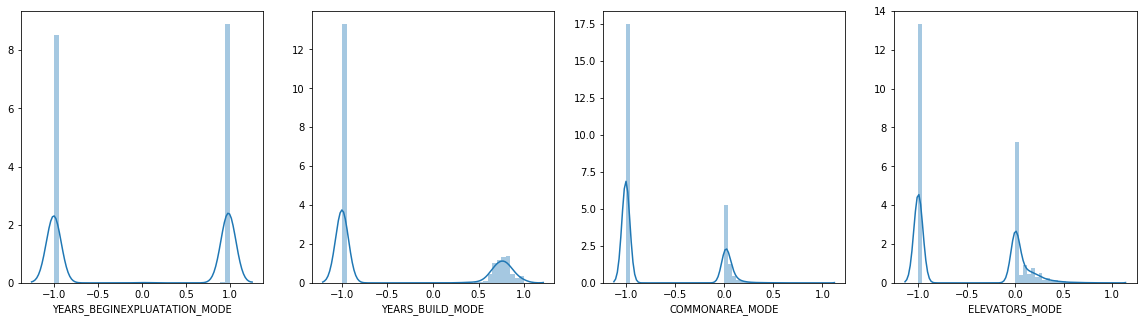

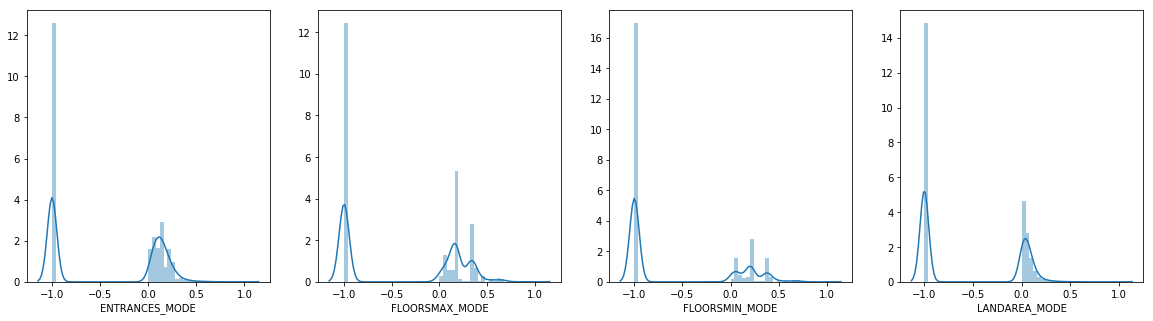

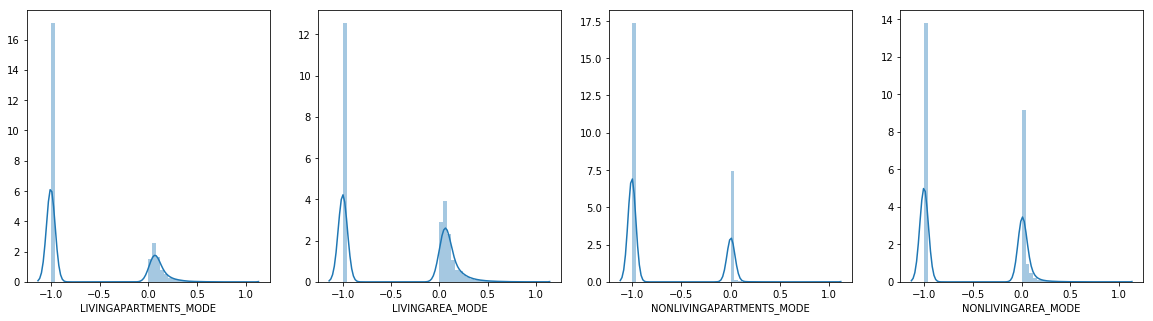

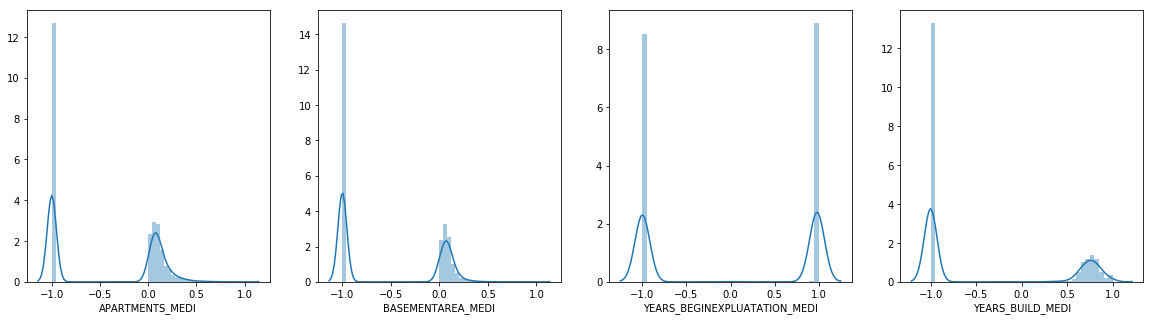

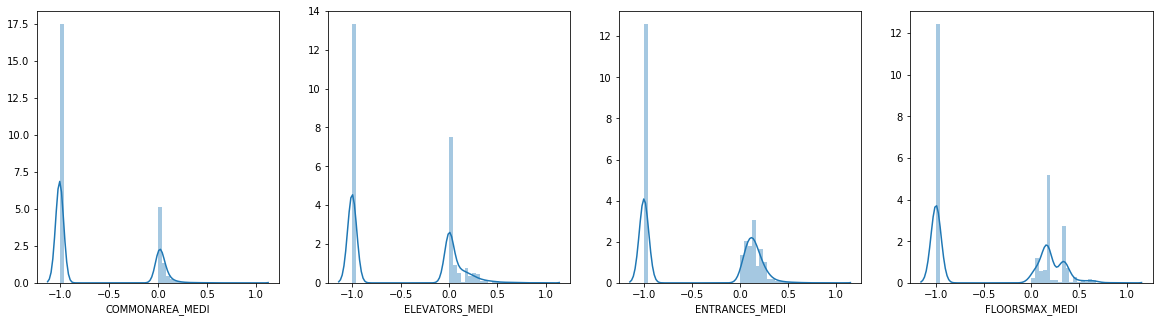

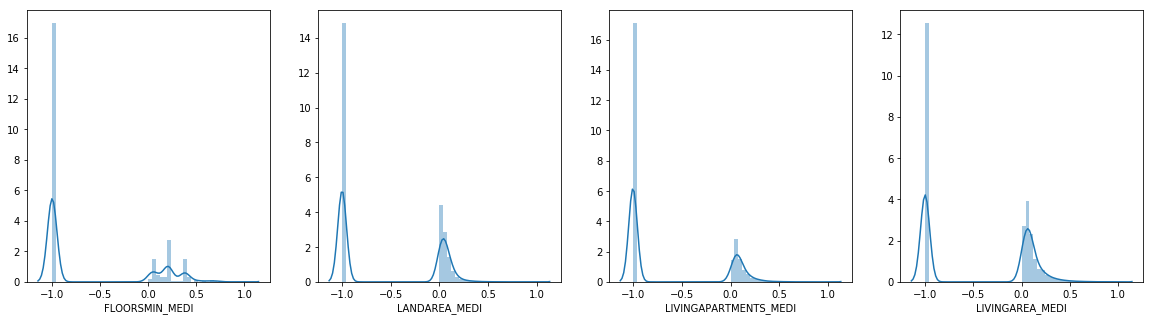

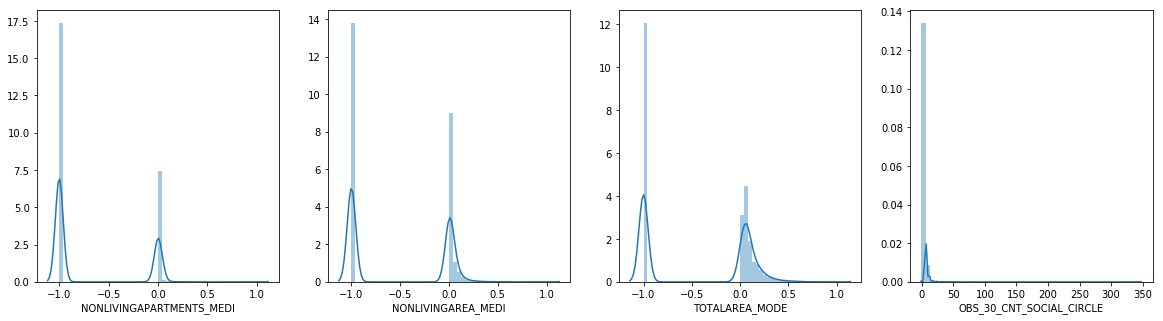

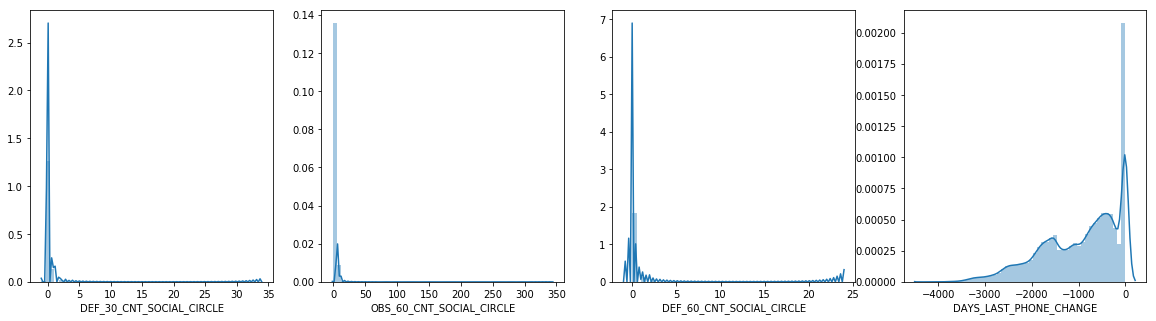

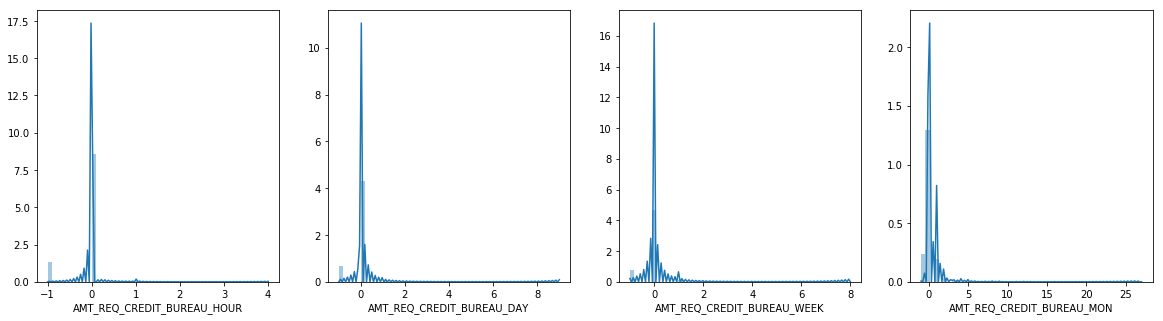

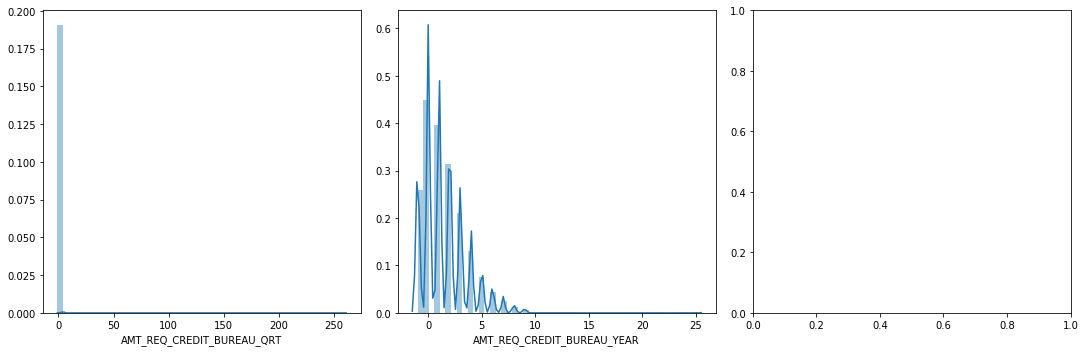

In [37]:
autoDistplot(no_categoli_std, 4, 20, 5)